---

## ОПИСАНИЕ

Это набор данных о потреблении алкоголя в России (1998-2016 гг.). Он содержит значения потребления вина, пива, водки, бренди и шампанского.

### Содержание

Набор данных имеет 1615 строк и 7 столбцов. Ключи для столбцов:

* **'year'** - Год (с 1998 по 2016)

* **'region'** - Название субъекта РФ. Может быть разным: область, республика, край, автономный округ, город федерального значения или отдельная автономная область.

* **'wine'** - Продажа вина в литрах по годам на душу населения.

* **'beer'** - Продажа пива в литрах по годам на душу населения.

* **'vodka'** — Продажа водки в литрах по годам на душу населения.

* **'champagne'** — Продажа шампанского в литрах по годам на душу населения.

* **'brandy'** - Продажа бренди в литрах по годам на душу населения.

#### Благодарности

  (УИИС) - Единая межведомственная информационно-статистическая система
  
#### Вдохновение

Вы можете проанализировать взаимосвязь между разными годами, найти лучшие регионы по каждому признаку и сравнить их.

###### Скачано с openml.org.

---

---

## В этой работе мы рассмотрим следующие вопросы:

* Загрузим и проанализируем данные о потреблении алкоголя в России в период с 1998 по 2016 год.
* Найдем пропуски в данных и избавимся от них.
* Рассмотрим, сколько в среднем литров разных алкогольных напитков приходится на каждого человека в год.
* Проанализируем, как менялось потребление алкоголя с течением времени. Для наглядности мы также выделим данные по трём регионам.
* Выясним, какой вид алкоголя наиболее популярен среди россиян, и посмотрим, как менялись предпочтения людей с течением времени.
* Рассмотрим три различных способа определения регионов с самым высоким и самым низким уровнем потребления алкоголя.

---

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme (style = 'darkgrid')

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

In [2]:
alco = fetch_openml('Alcohol-Consumption-in-Russia-(1998-2016)')

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
for a in alco:
    print('---------------------------------------------------------------')
    display(a)
    display(alco[a])

---------------------------------------------------------------


'data'

year                          region  wine  beer  vodka  champagne  \
0     1998              Republic of Adygea   1.9   8.8    3.4        0.3   
1     1998                      Altai Krai   3.3  19.2   11.3        1.1   
2     1998                     Amur Oblast   2.1  21.2   17.3        0.7   
3     1998              Arkhangelsk Oblast   4.3  10.6   11.7        0.4   
4     1998                Astrakhan Oblast   2.9  18.0    9.5        0.8   
...    ...                             ...   ...   ...    ...        ...   
1610  2016                Chuvash Republic   5.0  42.3    7.7        0.7   
1611  2016       Chukotka Autonomous Okrug   3.9  34.0   11.6        1.8   
1612  2016        Sakha (Yakutia) Republic   4.3  56.1    8.2        1.8   
1613  2016  Yamalo-Nenets Autonomous Okrug   4.5  75.8    8.2        1.7   
1614  2016                Yaroslavl Oblast  10.2  38.0    8.9        1.4   

      brandy  
0        0.1  
1        0.1  
2        0.4  
3        0.3  
4        0.2  
...      ...  
1610     0.4  
1611     1.1  
1612     0.5  
1613     1.3  
1614     1.0  

[1615 rows x 7 columns]

---------------------------------------------------------------


'target'

None

---------------------------------------------------------------


'frame'

year                          region  wine  beer  vodka  champagne  \
0     1998              Republic of Adygea   1.9   8.8    3.4        0.3   
1     1998                      Altai Krai   3.3  19.2   11.3        1.1   
2     1998                     Amur Oblast   2.1  21.2   17.3        0.7   
3     1998              Arkhangelsk Oblast   4.3  10.6   11.7        0.4   
4     1998                Astrakhan Oblast   2.9  18.0    9.5        0.8   
...    ...                             ...   ...   ...    ...        ...   
1610  2016                Chuvash Republic   5.0  42.3    7.7        0.7   
1611  2016       Chukotka Autonomous Okrug   3.9  34.0   11.6        1.8   
1612  2016        Sakha (Yakutia) Republic   4.3  56.1    8.2        1.8   
1613  2016  Yamalo-Nenets Autonomous Okrug   4.5  75.8    8.2        1.7   
1614  2016                Yaroslavl Oblast  10.2  38.0    8.9        1.4   

      brandy  
0        0.1  
1        0.1  
2        0.4  
3        0.3  
4        0.2  
...      ...  
1610     0.4  
1611     1.1  
1612     0.5  
1613     1.3  
1614     1.0  

[1615 rows x 7 columns]

---------------------------------------------------------------


'categories'

None

---------------------------------------------------------------


'feature_names'

['year', 'region', 'wine', 'beer', 'vodka', 'champagne', 'brandy']

---------------------------------------------------------------


'target_names'

[]

---------------------------------------------------------------


'DESCR'

'Context\nThis is Alcohol Consumption in Russia (1998-2016) Dataset. It contains values of consumption for wine, beer, vodka, brandy and champagne.\nContent\nDataset has 1615 rows and 7 columns. Keys for columns:\n\n"year" - year (1998-2016)\n"region" - name of a federal subject of Russia. It could be oblast, republic, krai, autonomous okrug, federal city and a single autonomous oblast\n"wine" - sale of wine in litres by year per capita\n"beer" - sale of beer in litres by year per capita\n"vodka" - sale of vodka in litres by year per capita\n"champagne" - sale of champagne in litres by year per capita\n"brandy" - sale of brandy in litres by year per capita\n\nAcknowledgements\n (UIISS) - Unified interdepartmental information and statistical system\nInspiration\nYou can analyze the relationships between various years, find best regions by each feature and compare them.\n\nDownloaded from openml.org.'

---------------------------------------------------------------


'details'

{'id': '43425',
 'name': 'Alcohol-Consumption-in-Russia-(1998-2016)',
 'version': '1',
 'description_version': '1',
 'format': 'arff',
 'collection_date': '26-01-2020',
 'upload_date': '2022-03-23T13:15:48',
 'language': 'English',
 'licence': 'CC0: Public Domain',
 'url': 'https://api.openml.org/data/v1/download/22102250/Alcohol-Consumption-in-Russia-(1998-2016).arff',
 'parquet_url': 'https://openml1.win.tue.nl/datasets/0004/43425/dataset_43425.pq',
 'file_id': '22102250',
 'version_label': 'v1.0',
 'tag': ['Machine Learning', 'Meteorology'],
 'visibility': 'public',
 'minio_url': 'https://openml1.win.tue.nl/datasets/0004/43425/dataset_43425.pq',
 'status': 'active',
 'processing_date': '2022-03-23 13:16:08',
 'md5_checksum': '190e5893497055a0a93fe055cf16775d'}

---------------------------------------------------------------


'url'

'https://www.openml.org/d/43425'

In [4]:
print(alco['DESCR'])

Context
This is Alcohol Consumption in Russia (1998-2016) Dataset. It contains values of consumption for wine, beer, vodka, brandy and champagne.
Content
Dataset has 1615 rows and 7 columns. Keys for columns:

"year" - year (1998-2016)
"region" - name of a federal subject of Russia. It could be oblast, republic, krai, autonomous okrug, federal city and a single autonomous oblast
"wine" - sale of wine in litres by year per capita
"beer" - sale of beer in litres by year per capita
"vodka" - sale of vodka in litres by year per capita
"champagne" - sale of champagne in litres by year per capita
"brandy" - sale of brandy in litres by year per capita

Acknowledgements
 (UIISS) - Unified interdepartmental information and statistical system
Inspiration
You can analyze the relationships between various years, find best regions by each feature and compare them.

Downloaded from openml.org.


In [5]:
alco_orig = alco['frame']

# На всякий случай сохраним исходный DataFrame.
# alco_orig.to_csv('data/alco_orig.csv')

In [6]:
alco_orig

year                          region  wine  beer  vodka  champagne  \
0     1998              Republic of Adygea   1.9   8.8    3.4        0.3   
1     1998                      Altai Krai   3.3  19.2   11.3        1.1   
2     1998                     Amur Oblast   2.1  21.2   17.3        0.7   
3     1998              Arkhangelsk Oblast   4.3  10.6   11.7        0.4   
4     1998                Astrakhan Oblast   2.9  18.0    9.5        0.8   
...    ...                             ...   ...   ...    ...        ...   
1610  2016                Chuvash Republic   5.0  42.3    7.7        0.7   
1611  2016       Chukotka Autonomous Okrug   3.9  34.0   11.6        1.8   
1612  2016        Sakha (Yakutia) Republic   4.3  56.1    8.2        1.8   
1613  2016  Yamalo-Nenets Autonomous Okrug   4.5  75.8    8.2        1.7   
1614  2016                Yaroslavl Oblast  10.2  38.0    8.9        1.4   

      brandy  
0        0.1  
1        0.1  
2        0.4  
3        0.3  
4        0.2  
...      ...  
1610     0.4  
1611     1.1  
1612     0.5  
1613     1.3  
1614     1.0  

[1615 rows x 7 columns]

In [7]:
def info(df, full = True, null = True, colmn = [], num_uni = 123):
    '''
    Посмотреть информацию по DataFrame
    -------------------------------------------------------------------------------------
    df      - Указать DataFrame
    
    full    - Если True (значение по умолчанию) выводиться полная информация
              Если False выводится краткая таблица
           
    null    - Если True (значение по умолчанию) выводиться информация по всем колонкам
              Если False выводится сокращённая таблица с указанием колонок, в которых есть пропуски.
    
    colmn   - Указать список колонок, для которых список уникальных значений 
              не будет выводиться.
    
    num_uni - Указать максимальное количество уникальных значений,
              которое будет отображаться (по умолчанию 123).
    -------------------------------------------------------------------------------------
    '''
    
    inf = pd.DataFrame(columns = ['Колонка', 'Кол-во уникальных значений',
                                  'Кол-во дубликатов', 'Кол-во пропусков',
                                  '% пропусков', 'Тип данных'])
    col = []
    uni = []
    dub = []
    prop = []
    pr_prop = []
    typ = []
    
    for c in df:
        col.append(c)
        uni.append(len(df[c].unique()))
        dub.append(df[c].duplicated().sum())
        prop.append(df[c].isna().sum())
        pr_prop.append(round(100 * df[c].isna().sum() / len(df), 2))
        typ.append(df.dtypes[c])
                   
    inf['Колонка'] = col
    inf['Кол-во уникальных значений'] = uni
    inf['Кол-во дубликатов'] = dub
    inf['Кол-во пропусков'] = prop
    inf['% пропусков'] = pr_prop
    inf['Тип данных'] = typ
    inf0 = inf[inf['Кол-во пропусков'] != 0]
    
    if full == 0:
        
        if null == 1:
            print('----------------------------------------------------------------------------------------\nКоличество данных      -',
                  len(df))
            print('----------------------------------------------------------------------------------------\nКоличество дубликатов  -',
                  df.duplicated().sum())
            print('----------------------------------------------------------------------------------------')
            display(inf)
        
        elif null == 0:
            print('----------------------------------------------------------------------------------------\nКоличество данных      -',
                  len(df))
            print('----------------------------------------------------------------------------------------\nКоличество дубликатов  -',
                  df.duplicated().sum())
            print('----------------------------------------------------------------------------------------')
            display(inf0)
            
    
    elif full == 1:
        
        if null == 1:
            print('----------------------------------------------------------------------------------------\nКоличество данных      -',
                  len(df))
            print('----------------------------------------------------------------------------------------\nКоличество дубликатов  -',
                  df.duplicated().sum())
            
            for i in inf.index:
                print('----------------------------------------------------------------------------------------')
                display(inf.loc[[i]])
                print('Уникальные значения:\n')
               
                if inf.loc[i]['Колонка'] not in colmn:
                    if num_uni == 0:

                        if df.dtypes[inf.loc[i]['Колонка']] == object:
                            print(sorted(df[inf.loc[i]['Колонка']].unique(), key=str))
                        else:
                            print(np.sort(df[inf.loc[i]['Колонка']].unique()))
                            
                    elif len(df[inf.loc[i]['Колонка']].unique()) <= num_uni:

                        if df.dtypes[inf.loc[i]['Колонка']] == object:
                            print(sorted(df[inf.loc[i]['Колонка']].unique(), key=str))
                        else:
                            print(np.sort(df[inf.loc[i]['Колонка']].unique()))
                    else:
                        print('Уникальные значения по данной колонке не выводятся,\nт.к. их более:',
                              num_uni, '(параметр - num_uni).')
                            
                else:
                    print('Уникальные значения по данной колонке не выводятся,\nт.к. колонка -', 
                          inf.loc[i]['Колонка'], 'указана в параметре colmn.')
                    
      
        elif null == 0:
            print('----------------------------------------------------------------------------------------\nКоличество данных      -',
                  len(df))
            print('----------------------------------------------------------------------------------------\nКоличество дубликатов  -',
                  df.duplicated().sum())
            
            for i in inf0.index:
                print('----------------------------------------------------------------------------------------')
                display(inf0.loc[[i]])
                print('Уникальные значения:\n')
                
                if inf0.loc[i]['Колонка'] not in colmn:
                    if num_uni == 0:

                        if df.dtypes[inf0.loc[i]['Колонка']] == object:
                            print(sorted(df[inf0.loc[i]['Колонка']].unique(), key=str))
                        else:
                            print(np.sort(df[inf0.loc[i]['Колонка']].unique()))
                    
                    elif len(df[inf0.loc[i]['Колонка']].unique()) <= num_uni:

                        if df.dtypes[inf0.loc[i]['Колонка']] == object:
                            print(sorted(df[inf0.loc[i]['Колонка']].unique(), key=str))
                        else:
                            print(np.sort(df[inf0.loc[i]['Колонка']].unique()))
                    else:
                        print('Уникальные значения по данной колонке не выводятся,\nт.к. их более:',
                              num_uni, '(параметр - num_uni).')
                            
                else:
                    print('Уникальные значения по данной колонке не выводятся,\nт.к. колонка -', 
                          inf.loc[i]['Колонка'], 'указана в параметре colmn.')

---

Посмотрим, что из себя представляет дата-сет и какие данные он включает.

---

In [8]:
help(info)

Help on function info in module __main__:

info(df, full=True, null=True, colmn=[], num_uni=123)
    Посмотреть информацию по DataFrame
    -------------------------------------------------------------------------------------
    df      - Указать DataFrame
    
    full    - Если True (значение по умолчанию) выводиться полная информация
              Если False выводится краткая таблица
           
    null    - Если True (значение по умолчанию) выводиться информация по всем колонкам
              Если False выводится сокращённая таблица с указанием колонок, в которых есть пропуски.
    
    colmn   - Указать список колонок, для которых список уникальных значений 
              не будет выводиться.
    
    num_uni - Указать максимальное количество уникальных значений,
              которое будет отображаться (по умолчанию 123).
    -------------------------------------------------------------------------------------



In [9]:
info(df = alco_orig, full = 1, null = 1, colmn = [], num_uni = 123)

----------------------------------------------------------------------------------------
Количество данных      - 1615
----------------------------------------------------------------------------------------
Количество дубликатов  - 0
----------------------------------------------------------------------------------------


Колонка  Кол-во уникальных значений  Кол-во дубликатов  Кол-во пропусков  \
0    year                          19               1596                 0   

   % пропусков Тип данных  
0          0.0      int64

Уникальные значения:

[1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016]
----------------------------------------------------------------------------------------


Колонка  Кол-во уникальных значений  Кол-во дубликатов  Кол-во пропусков  \
1  region                          85               1530                 0   

   % пропусков Тип данных  
1          0.0     object

Уникальные значения:

['Altai Krai', 'Altai Republic', 'Amur Oblast', 'Arkhangelsk Oblast', 'Astrakhan Oblast', 'Belgorod Oblast', 'Bryansk Oblast', 'Chechen Republic', 'Chelyabinsk Oblast', 'Chukotka Autonomous Okrug', 'Chuvash Republic', 'Irkutsk Oblast', 'Ivanovo Oblast', 'Jewish Autonomous Oblast', 'Kabardino-Balkar Republic', 'Kaliningrad Oblast', 'Kaluga Oblast', 'Kamchatka Krai', 'Karachay-Cherkess Republic', 'Kemerovo Oblast', 'Khabarovsk Krai', 'KhantyMansi Autonomous Okrug  Yugra', 'Kirov Oblast', 'Komi Republic', 'Kostroma Oblast', 'Krasnodar Krai', 'Krasnoyarsk Krai', 'Kurgan Oblast', 'Kursk Oblast', 'Leningrad Oblast', 'Lipetsk Oblast', 'Magadan Oblast', 'Mari El Republic', 'Moscow', 'Moscow Oblast', 'Murmansk Oblast', 'Nenets Autonomous Okrug', 'Nizhny Novgorod Oblast', 'Novgorod Oblast', 'Novosibirsk Oblast', 'Omsk Oblast', 'Orenburg Oblast', 'Oryol Oblast', 'Penza Oblast', 'Perm Krai', 'Primorsky Krai', 'Pskov Oblast', 'Republic of Adygea', 'Republic of Bashkortostan', 

Колонка  Кол-во уникальных значений  Кол-во дубликатов  Кол-во пропусков  \
2    wine                         211               1404                63   

   % пропусков Тип данных  
2          3.9    float64

Уникальные значения:

Уникальные значения по данной колонке не выводятся,
т.к. их более: 123 (параметр - num_uni).
----------------------------------------------------------------------------------------


Колонка  Кол-во уникальных значений  Кол-во дубликатов  Кол-во пропусков  \
3    beer                         797                818                58   

   % пропусков Тип данных  
3         3.59    float64

Уникальные значения:

Уникальные значения по данной колонке не выводятся,
т.к. их более: 123 (параметр - num_uni).
----------------------------------------------------------------------------------------


Колонка  Кол-во уникальных значений  Кол-во дубликатов  Кол-во пропусков  \
4   vodka                         314               1301                61   

   % пропусков Тип данных  
4         3.78    float64

Уникальные значения:

Уникальные значения по данной колонке не выводятся,
т.к. их более: 123 (параметр - num_uni).
----------------------------------------------------------------------------------------


Колонка  Кол-во уникальных значений  Кол-во дубликатов  Кол-во пропусков  \
5  champagne                         108               1507                63   

   % пропусков Тип данных  
5          3.9    float64

Уникальные значения:

[0.1  0.2  0.3  0.33 0.38 0.4  0.47 0.5  0.55 0.58 0.6  0.7  0.77 0.8
 0.85 0.9  0.97 0.99 1.   1.01 1.05 1.07 1.1  1.16 1.17 1.18 1.2  1.22
 1.24 1.28 1.29 1.3  1.31 1.32 1.36 1.4  1.41 1.43 1.48 1.5  1.54 1.57
 1.6  1.63 1.66 1.68 1.69 1.7  1.73 1.76 1.78 1.79 1.8  1.82 1.85 1.87
 1.9  2.   2.01 2.03 2.07 2.1  2.2  2.25 2.29 2.3  2.38 2.39 2.4  2.46
 2.5  2.51 2.52 2.53 2.59 2.6  2.7  2.71 2.72 2.77 2.8  2.9  3.   3.08
 3.1  3.2  3.3  3.32 3.4  3.5  3.6  3.7  3.8  3.89 3.9  4.   4.06 4.1
 4.2  4.3  4.5  4.8  4.9  5.   5.1  5.14 5.56  nan]
----------------------------------------------------------------------------------------


Колонка  Кол-во уникальных значений  Кол-во дубликатов  Кол-во пропусков  \
6  brandy                          77               1538                66   

   % пропусков Тип данных  
6         4.09    float64

Уникальные значения:

[0.   0.02 0.03 0.04 0.1  0.2  0.24 0.26 0.28 0.3  0.35 0.37 0.39 0.4
 0.42 0.43 0.44 0.45 0.46 0.47 0.49 0.5  0.51 0.52 0.53 0.55 0.56 0.57
 0.58 0.6  0.61 0.62 0.64 0.65 0.69 0.7  0.72 0.73 0.75 0.76 0.8  0.81
 0.82 0.85 0.86 0.88 0.9  0.92 0.94 1.   1.06 1.09 1.1  1.13 1.2  1.24
 1.29 1.3  1.31 1.4  1.5  1.52 1.58 1.6  1.62 1.66 1.7  1.75 1.76 1.78
 1.8  1.9  2.   2.1  2.13 2.3   nan]


In [10]:
info(alco_orig, 0)

----------------------------------------------------------------------------------------
Количество данных      - 1615
----------------------------------------------------------------------------------------
Количество дубликатов  - 0
----------------------------------------------------------------------------------------


Колонка  Кол-во уникальных значений  Кол-во дубликатов  Кол-во пропусков  \
0       year                          19               1596                 0   
1     region                          85               1530                 0   
2       wine                         211               1404                63   
3       beer                         797                818                58   
4      vodka                         314               1301                61   
5  champagne                         108               1507                63   
6     brandy                          77               1538                66   

   % пропусков Тип данных  
0         0.00      int64  
1         0.00     object  
2         3.90    float64  
3         3.59    float64  
4         3.78    float64  
5         3.90    float64  
6         4.09    float64

In [11]:
info(alco_orig, 0, 0)

----------------------------------------------------------------------------------------
Количество данных      - 1615
----------------------------------------------------------------------------------------
Количество дубликатов  - 0
----------------------------------------------------------------------------------------


Колонка  Кол-во уникальных значений  Кол-во дубликатов  Кол-во пропусков  \
2       wine                         211               1404                63   
3       beer                         797                818                58   
4      vodka                         314               1301                61   
5  champagne                         108               1507                63   
6     brandy                          77               1538                66   

   % пропусков Тип данных  
2         3.90    float64  
3         3.59    float64  
4         3.78    float64  
5         3.90    float64  
6         4.09    float64

In [12]:
df_nan = alco_orig[(alco_orig['wine'].isna()) | (alco_orig['beer'].isna()) | 
            (alco_orig['vodka'].isna()) | (alco_orig['champagne'].isna()) | (alco_orig['brandy'].isna())]
df_nan

year                  region  wine  beer  vodka  champagne  brandy
17    1998  Republic of Ingushetia   NaN   NaN    NaN        NaN     NaN
31    1998      Republic of Crimea   NaN   NaN    NaN        NaN     NaN
63    1998              Sevastopol   NaN   NaN    NaN        NaN     NaN
79    1998        Chechen Republic   NaN   NaN    NaN        NaN     NaN
102   1999  Republic of Ingushetia   NaN   NaN    NaN        NaN     NaN
...    ...                     ...   ...   ...    ...        ...     ...
1439  2014        Chechen Republic   NaN   4.9    NaN        NaN     NaN
1462  2015  Republic of Ingushetia   NaN   0.5    NaN        NaN     NaN
1524  2015        Chechen Republic   NaN   2.2    NaN        NaN     NaN
1547  2016  Republic of Ingushetia   NaN   NaN    NaN        NaN     NaN
1609  2016        Chechen Republic   NaN   1.2    NaN        NaN     NaN

[66 rows x 7 columns]

In [13]:
info(df_nan)

----------------------------------------------------------------------------------------
Количество данных      - 66
----------------------------------------------------------------------------------------
Количество дубликатов  - 0
----------------------------------------------------------------------------------------


Колонка  Кол-во уникальных значений  Кол-во дубликатов  Кол-во пропусков  \
0    year                          19                 47                 0   

   % пропусков Тип данных  
0          0.0      int64

Уникальные значения:

[1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016]
----------------------------------------------------------------------------------------


Колонка  Кол-во уникальных значений  Кол-во дубликатов  Кол-во пропусков  \
1  region                           4                 62                 0   

   % пропусков Тип данных  
1          0.0     object

Уникальные значения:

['Chechen Republic', 'Republic of Crimea', 'Republic of Ingushetia', 'Sevastopol']
----------------------------------------------------------------------------------------


Колонка  Кол-во уникальных значений  Кол-во дубликатов  Кол-во пропусков  \
2    wine                           3                 63                63   

   % пропусков Тип данных  
2        95.45    float64

Уникальные значения:

[0.2 0.3 nan]
----------------------------------------------------------------------------------------


Колонка  Кол-во уникальных значений  Кол-во дубликатов  Кол-во пропусков  \
3    beer                           9                 57                58   

   % пропусков Тип данных  
3        87.88    float64

Уникальные значения:

[0.4 0.5 0.8 0.9 1.  1.2 2.2 4.9 nan]
----------------------------------------------------------------------------------------


Колонка  Кол-во уникальных значений  Кол-во дубликатов  Кол-во пропусков  \
4   vodka                           5                 61                61   

   % пропусков Тип данных  
4        92.42    float64

Уникальные значения:

[0.05 0.1  0.8  1.    nan]
----------------------------------------------------------------------------------------


Колонка  Кол-во уникальных значений  Кол-во дубликатов  Кол-во пропусков  \
5  champagne                           2                 64                63   

   % пропусков Тип данных  
5        95.45    float64

Уникальные значения:

[0.1 nan]
----------------------------------------------------------------------------------------


Колонка  Кол-во уникальных значений  Кол-во дубликатов  Кол-во пропусков  \
6  brandy                           1                 65                66   

   % пропусков Тип данных  
6        100.0    float64

Уникальные значения:

[nan]


---

Как мы видим, пропуски есть в каждом столбце по употреблению алкоголя, и все они сосредоточены в четырех регионах:

['Chechen Republic', 'Republic of Crimea', 'Republic of Ingushetia', 'Sevastopol']

---

In [14]:
for a in ['Chechen Republic', 'Republic of Crimea', 'Republic of Ingushetia', 'Sevastopol']:
    print('-------------------------------')
    display(alco_orig[alco_orig['region'] == a])

-------------------------------


year            region  wine  beer  vodka  champagne  brandy
79    1998  Chechen Republic   NaN   NaN    NaN        NaN     NaN
164   1999  Chechen Republic   NaN   NaN    NaN        NaN     NaN
249   2000  Chechen Republic   NaN   NaN    NaN        NaN     NaN
334   2001  Chechen Republic   NaN   NaN    NaN        NaN     NaN
419   2002  Chechen Republic   NaN   NaN    NaN        NaN     NaN
504   2003  Chechen Republic   NaN   NaN    NaN        NaN     NaN
589   2004  Chechen Republic   NaN   NaN    NaN        NaN     NaN
674   2005  Chechen Republic   NaN   NaN    NaN        NaN     NaN
759   2006  Chechen Republic   NaN   NaN    NaN        NaN     NaN
844   2007  Chechen Republic   NaN   NaN    NaN        NaN     NaN
929   2008  Chechen Republic   NaN   NaN    NaN        NaN     NaN
1014  2009  Chechen Republic   NaN   NaN    NaN        NaN     NaN
1099  2010  Chechen Republic   NaN   NaN    NaN        NaN     NaN
1184  2011  Chechen Republic   NaN   NaN    NaN        NaN     NaN
1269  2012  Chechen Republic   NaN   NaN    NaN        NaN     NaN
1354  2013  Chechen Republic   NaN   NaN    NaN        NaN     NaN
1439  2014  Chechen Republic   NaN   4.9    NaN        NaN     NaN
1524  2015  Chechen Republic   NaN   2.2    NaN        NaN     NaN
1609  2016  Chechen Republic   NaN   1.2    NaN        NaN     NaN

-------------------------------


year              region  wine  beer  vodka  champagne  brandy
31    1998  Republic of Crimea   NaN   NaN    NaN        NaN     NaN
116   1999  Republic of Crimea   NaN   NaN    NaN        NaN     NaN
201   2000  Republic of Crimea   NaN   NaN    NaN        NaN     NaN
286   2001  Republic of Crimea   NaN   NaN    NaN        NaN     NaN
371   2002  Republic of Crimea   NaN   NaN    NaN        NaN     NaN
456   2003  Republic of Crimea   NaN   NaN    NaN        NaN     NaN
541   2004  Republic of Crimea   NaN   NaN    NaN        NaN     NaN
626   2005  Republic of Crimea   NaN   NaN    NaN        NaN     NaN
711   2006  Republic of Crimea   NaN   NaN    NaN        NaN     NaN
796   2007  Republic of Crimea   NaN   NaN    NaN        NaN     NaN
881   2008  Republic of Crimea   NaN   NaN    NaN        NaN     NaN
966   2009  Republic of Crimea   NaN   NaN    NaN        NaN     NaN
1051  2010  Republic of Crimea   NaN   NaN    NaN        NaN     NaN
1136  2011  Republic of Crimea   NaN   NaN    NaN        NaN     NaN
1221  2012  Republic of Crimea   NaN   NaN    NaN        NaN     NaN
1306  2013  Republic of Crimea   NaN   NaN    NaN        NaN     NaN
1391  2014  Republic of Crimea   3.7  16.2    3.9        0.8     1.1
1476  2015  Republic of Crimea   4.0  42.8    3.8        1.6     0.9
1561  2016  Republic of Crimea   4.4  42.1    5.1        1.7     0.7

-------------------------------


year                  region  wine  beer  vodka  champagne  brandy
17    1998  Republic of Ingushetia   NaN   NaN    NaN        NaN     NaN
102   1999  Republic of Ingushetia   NaN   NaN    NaN        NaN     NaN
187   2000  Republic of Ingushetia   NaN   NaN    NaN        NaN     NaN
272   2001  Republic of Ingushetia   9.9   9.5   4.00        1.3     1.5
357   2002  Republic of Ingushetia   7.5   8.7   4.30        0.8     0.8
442   2003  Republic of Ingushetia   6.0   8.9   4.60        0.8     0.5
527   2004  Republic of Ingushetia   6.4   7.4   3.60        0.8     0.8
612   2005  Republic of Ingushetia   0.2   0.8   0.80        0.1     NaN
697   2006  Republic of Ingushetia   0.3   0.9   1.00        0.1     NaN
782   2007  Republic of Ingushetia   0.3   1.0   1.00        0.1     NaN
867   2008  Republic of Ingushetia   NaN   NaN    NaN        NaN     NaN
952   2009  Republic of Ingushetia   NaN   NaN   0.10        NaN     NaN
1037  2010  Republic of Ingushetia   NaN   NaN   0.05        NaN     NaN
1122  2011  Republic of Ingushetia   NaN   NaN    NaN        NaN     NaN
1207  2012  Republic of Ingushetia   NaN   NaN    NaN        NaN     NaN
1292  2013  Republic of Ingushetia   NaN   NaN    NaN        NaN     NaN
1377  2014  Republic of Ingushetia   NaN   0.4    NaN        NaN     NaN
1462  2015  Republic of Ingushetia   NaN   0.5    NaN        NaN     NaN
1547  2016  Republic of Ingushetia   NaN   NaN    NaN        NaN     NaN

-------------------------------


year      region  wine  beer  vodka  champagne  brandy
63    1998  Sevastopol   NaN   NaN    NaN        NaN     NaN
148   1999  Sevastopol   NaN   NaN    NaN        NaN     NaN
233   2000  Sevastopol   NaN   NaN    NaN        NaN     NaN
318   2001  Sevastopol   NaN   NaN    NaN        NaN     NaN
403   2002  Sevastopol   NaN   NaN    NaN        NaN     NaN
488   2003  Sevastopol   NaN   NaN    NaN        NaN     NaN
573   2004  Sevastopol   NaN   NaN    NaN        NaN     NaN
658   2005  Sevastopol   NaN   NaN    NaN        NaN     NaN
743   2006  Sevastopol   NaN   NaN    NaN        NaN     NaN
828   2007  Sevastopol   NaN   NaN    NaN        NaN     NaN
913   2008  Sevastopol   NaN   NaN    NaN        NaN     NaN
998   2009  Sevastopol   NaN   NaN    NaN        NaN     NaN
1083  2010  Sevastopol   NaN   NaN    NaN        NaN     NaN
1168  2011  Sevastopol   NaN   NaN    NaN        NaN     NaN
1253  2012  Sevastopol   NaN   NaN    NaN        NaN     NaN
1338  2013  Sevastopol   NaN   NaN    NaN        NaN     NaN
1423  2014  Sevastopol   5.6  26.0    5.1        2.1     1.3
1508  2015  Sevastopol   5.0  15.2    4.1        2.0     0.9
1593  2016  Sevastopol   5.4  22.9    7.0        1.8     1.1

---

В этих регионах наблюдается большое количество пропусков данных, поэтому будет лучше исключить эти 4 региона из исходного набора данных и провести анализ без их учета.

---

In [15]:
df1 = alco_orig.copy()

for a in ['Chechen Republic', 'Republic of Crimea', 'Republic of Ingushetia', 'Sevastopol']:
    df1 = df1[df1['region'] != a]
    
df1.reset_index(drop = True, inplace = True)

# Сохраним очищенный DataFrame (без пропусков).
# df1.to_csv('data/df1.csv')
df1

year                          region  wine  beer  vodka  champagne  \
0     1998              Republic of Adygea   1.9   8.8    3.4        0.3   
1     1998                      Altai Krai   3.3  19.2   11.3        1.1   
2     1998                     Amur Oblast   2.1  21.2   17.3        0.7   
3     1998              Arkhangelsk Oblast   4.3  10.6   11.7        0.4   
4     1998                Astrakhan Oblast   2.9  18.0    9.5        0.8   
...    ...                             ...   ...   ...    ...        ...   
1534  2016                Chuvash Republic   5.0  42.3    7.7        0.7   
1535  2016       Chukotka Autonomous Okrug   3.9  34.0   11.6        1.8   
1536  2016        Sakha (Yakutia) Republic   4.3  56.1    8.2        1.8   
1537  2016  Yamalo-Nenets Autonomous Okrug   4.5  75.8    8.2        1.7   
1538  2016                Yaroslavl Oblast  10.2  38.0    8.9        1.4   

      brandy  
0        0.1  
1        0.1  
2        0.4  
3        0.3  
4        0.2  
...      ...  
1534     0.4  
1535     1.1  
1536     0.5  
1537     1.3  
1538     1.0  

[1539 rows x 7 columns]

In [16]:
info(df1, 0)

----------------------------------------------------------------------------------------
Количество данных      - 1539
----------------------------------------------------------------------------------------
Количество дубликатов  - 0
----------------------------------------------------------------------------------------


Колонка  Кол-во уникальных значений  Кол-во дубликатов  Кол-во пропусков  \
0       year                          19               1520                 0   
1     region                          81               1458                 0   
2       wine                         210               1329                 0   
3       beer                         788                751                 0   
4      vodka                         311               1228                 0   
5  champagne                         107               1432                 0   
6     brandy                          76               1463                 0   

   % пропусков Тип данных  
0          0.0      int64  
1          0.0     object  
2          0.0    float64  
3          0.0    float64  
4          0.0    float64  
5          0.0    float64  
6          0.0    float64

---

Теперь, когда пропуски устранены, можно провести анализ.

Сначала посмотрим, как распределяется потребление по каждому из видов алкоголя.

---

In [17]:
def gr_raspr (df, x, h = None, tt = None):

    plt.figure(figsize=[19.2, 10.8], facecolor = 'grey') #, sharex=True)
    plt.suptitle(tt, fontsize = 22, fontweight = 'bold')
    
    plt.subplot(2, 1, 1)
    sns.boxplot(data = df, x = x, y = h, orient = 'h')

    plt.subplot(2, 1, 2)
    sns.histplot(data = df, x = x, hue = h, kde = True)
                 
    plt.show()

In [18]:
print(list(df1))

['year', 'region', 'wine', 'beer', 'vodka', 'champagne', 'brandy']


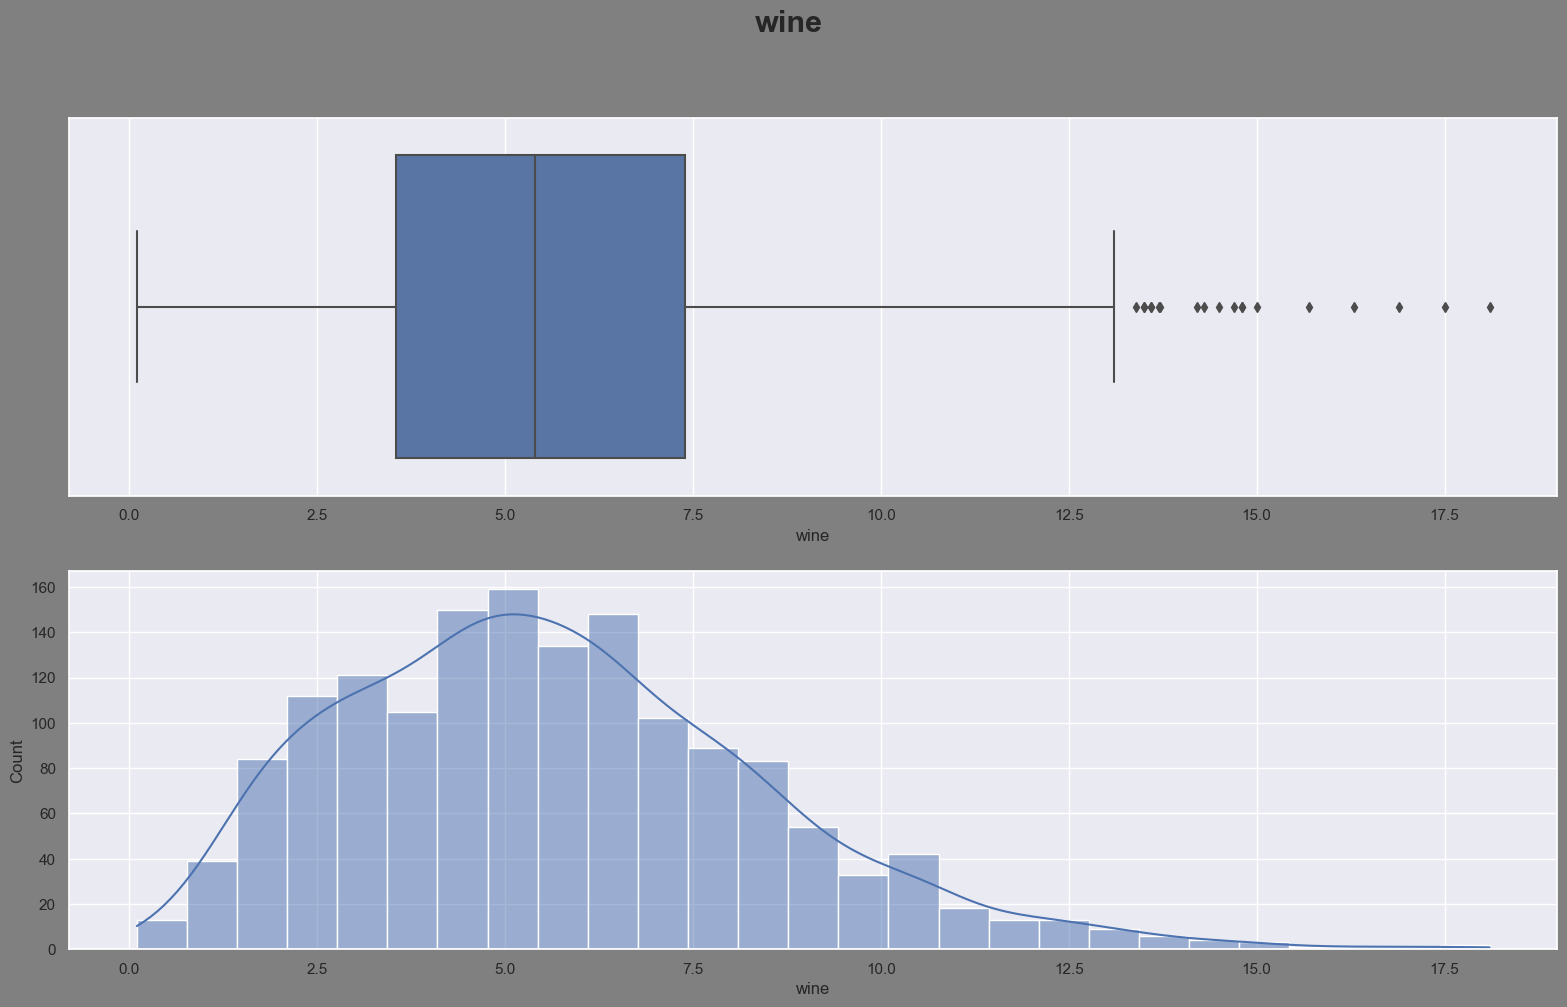

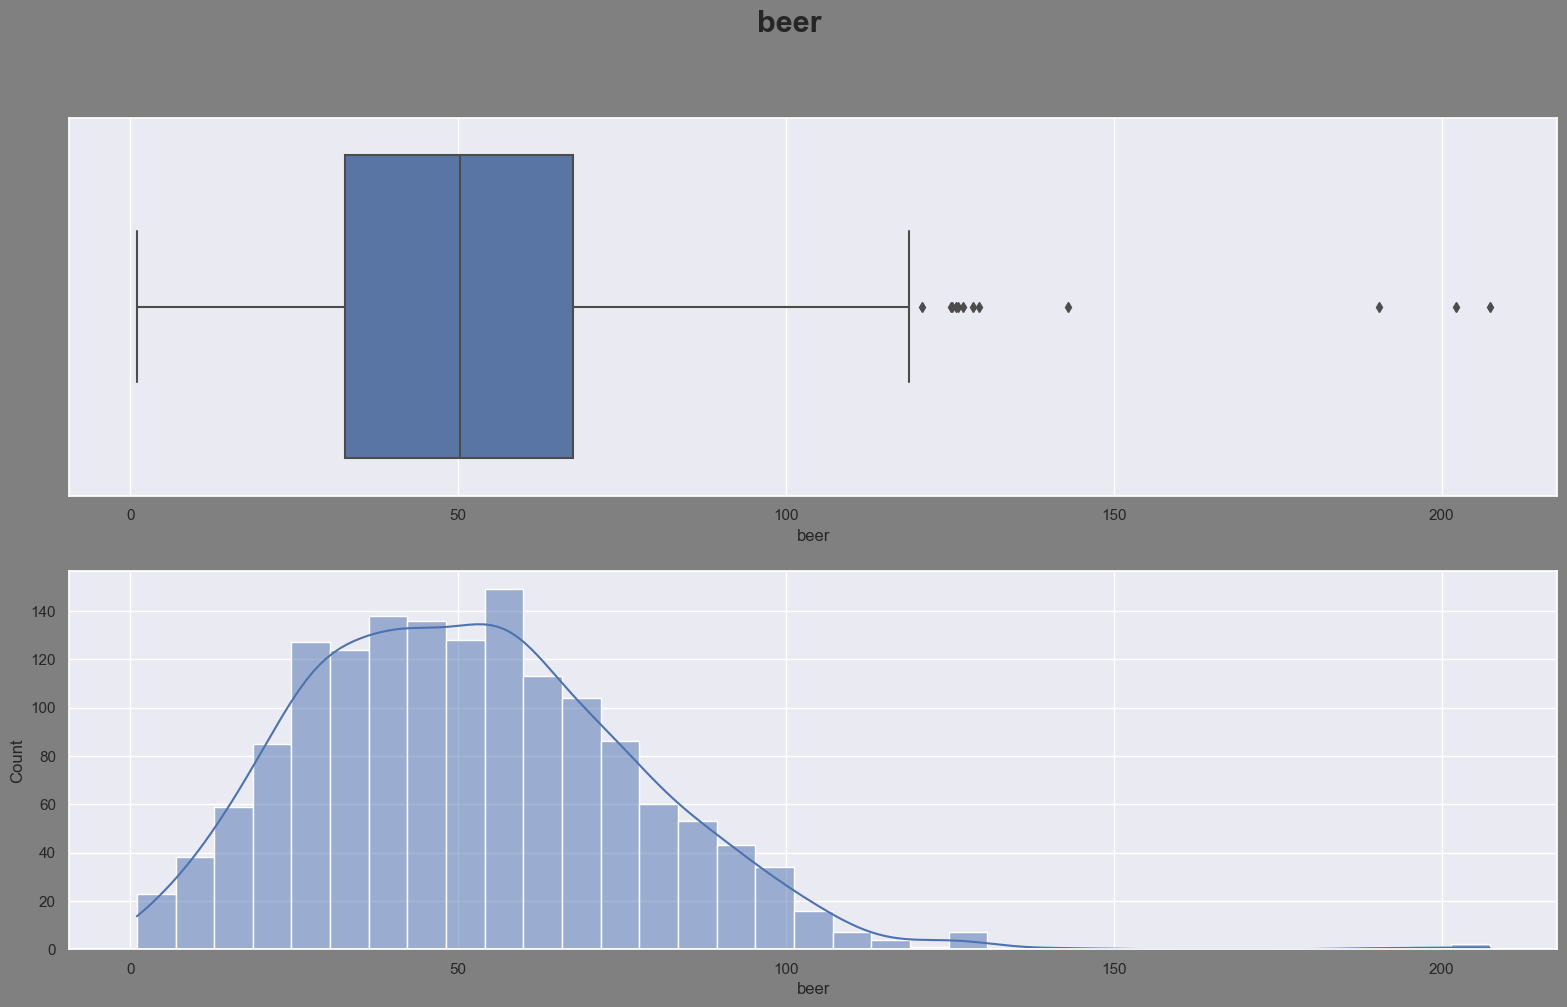

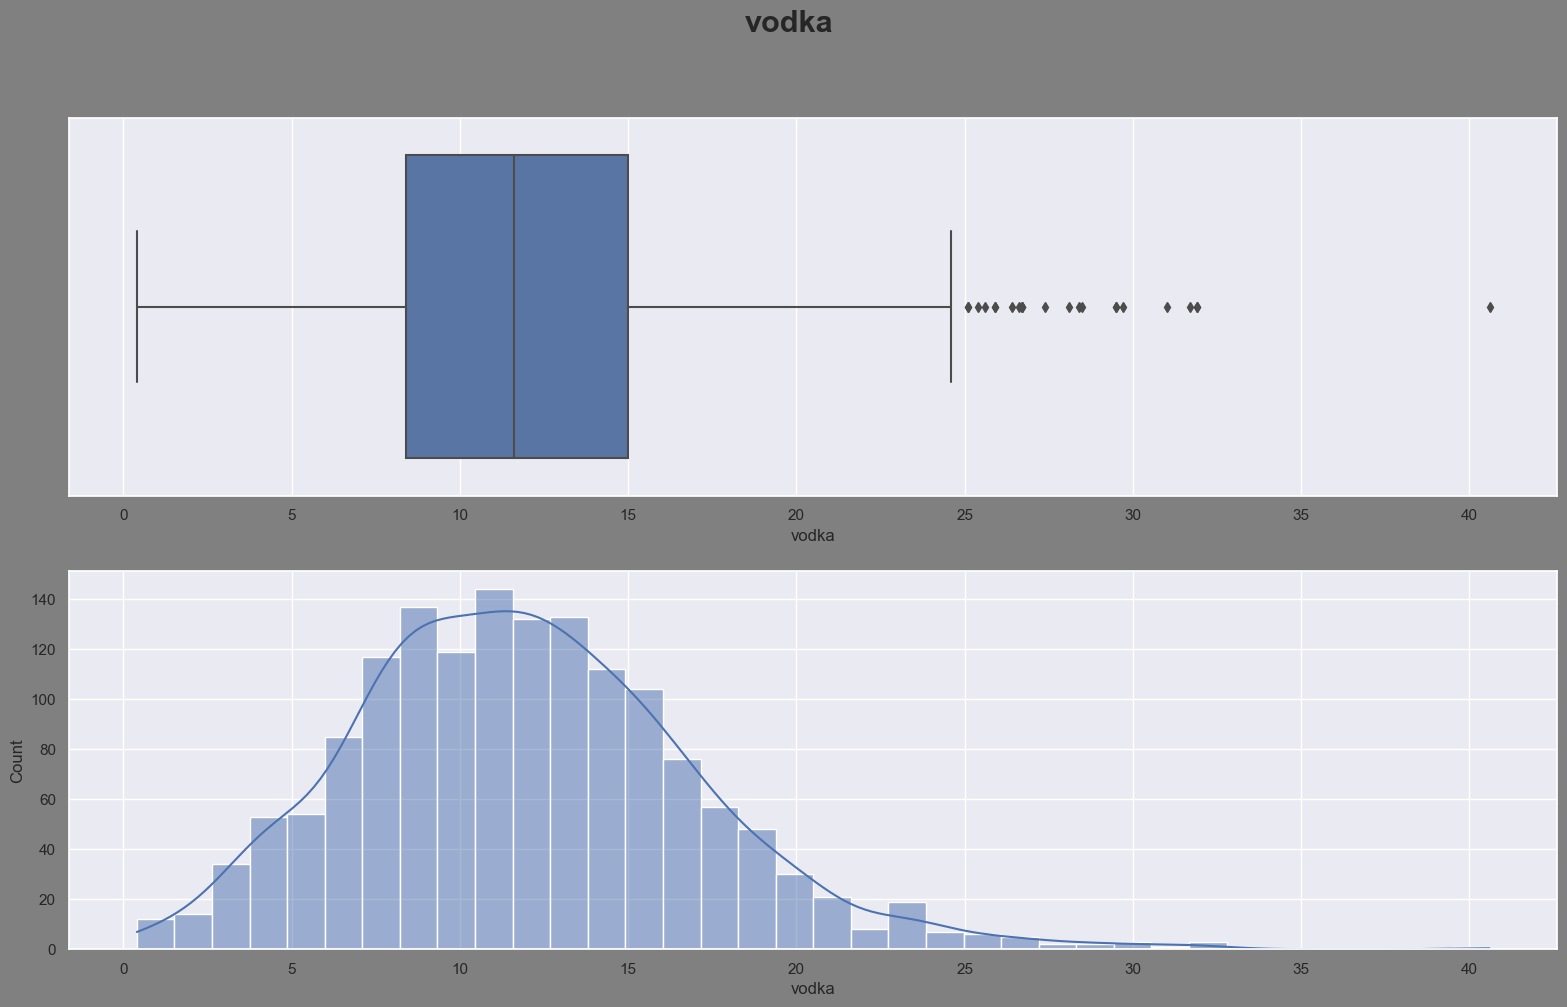

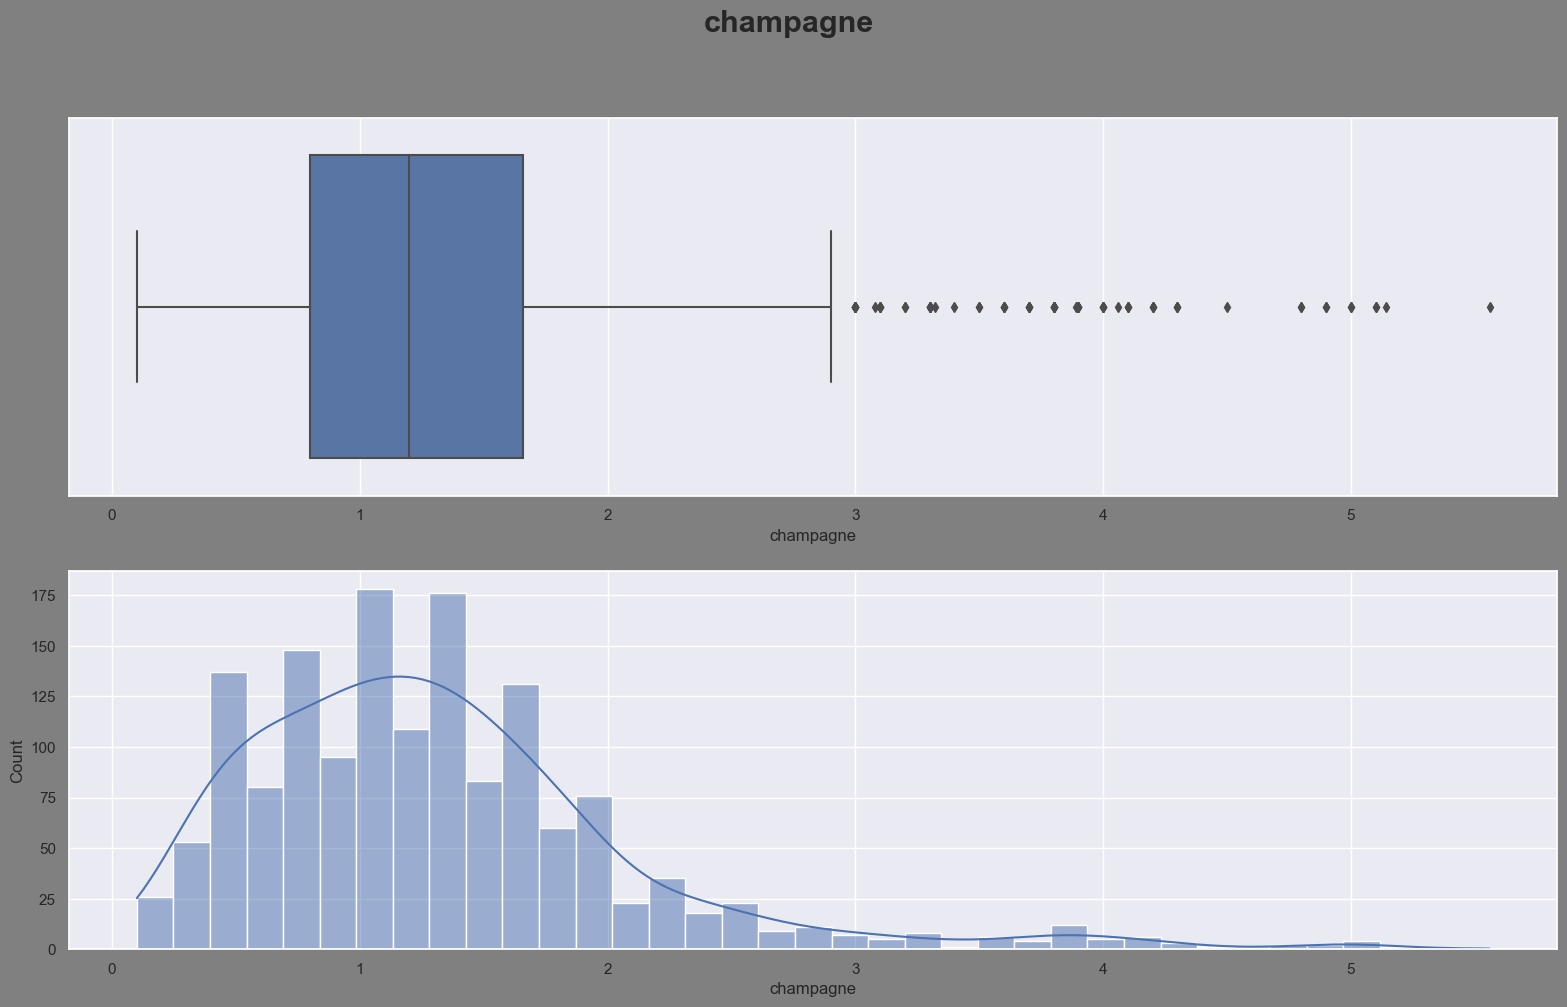

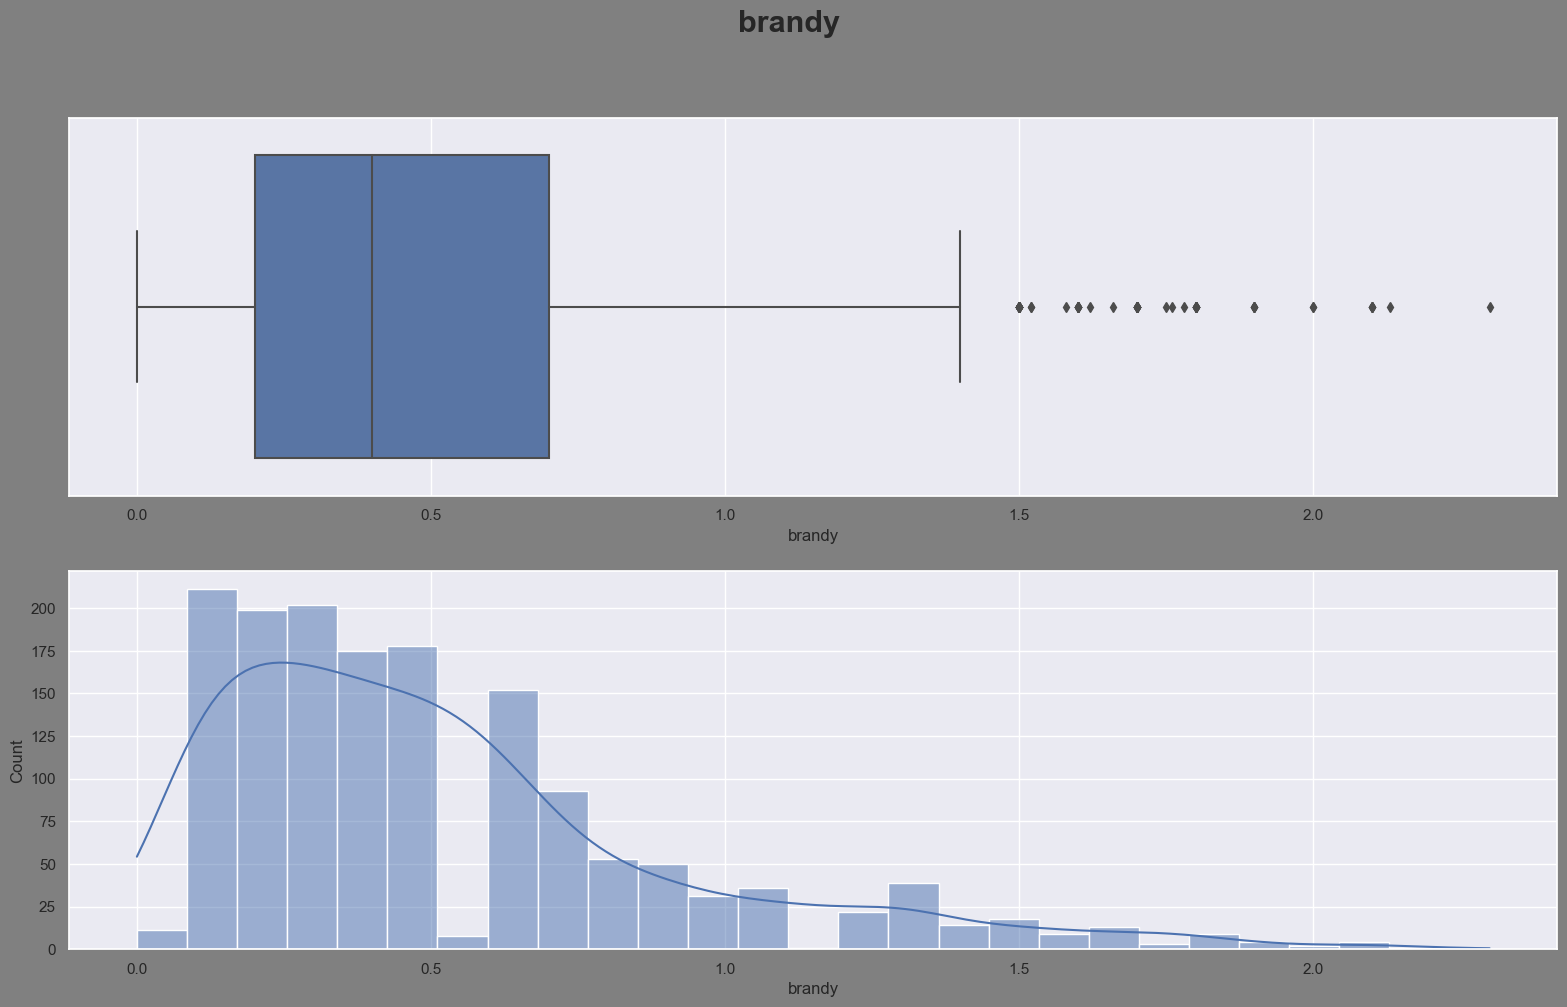

In [19]:
for a in ['wine', 'beer', 'vodka', 'champagne', 'brandy']:
    gr_raspr (df = df1, x = a, h = None, tt = a)

---

Рассмотрев распределение потребления каждого вида алкоголя по отдельности, можно сделать следующие выводы:

- В среднем, потребление вина составляло от 3,5 до 7,5 литров на человека в год.

- В среднем, потребление пива было от 30 до 70 литров на человека в год.

- В среднем, потребление водки составляло от 8 до 15 литров на человека в год.

- В среднем, потребление шампанского было от 0,8 до 1,7 литров на человека в год.

- В среднем, потребление бренди составляло от 0,2 до 0,7 литров на человека в год.

---

In [20]:
for a in ['wine', 'beer', 'vodka', 'champagne', 'brandy']:
    print(a)
    print('-----')
    print(df1[a].describe())
    print('_____________________________')


wine
-----
count    1539.000000
mean        5.637544
std         2.811555
min         0.100000
25%         3.550000
50%         5.400000
75%         7.400000
max        18.100000
Name: wine, dtype: float64
_____________________________
beer
-----
count    1539.000000
mean       51.722190
std        25.115577
min         1.000000
25%        32.700000
50%        50.300000
75%        67.500000
max       207.300000
Name: beer, dtype: float64
_____________________________
vodka
-----
count    1539.000000
mean       11.902404
std         5.078808
min         0.400000
25%         8.400000
50%        11.600000
75%        15.000000
max        40.600000
Name: vodka, dtype: float64
_____________________________
champagne
-----
count    1539.000000
mean        1.315172
std         0.798462
min         0.100000
25%         0.800000
50%         1.200000
75%         1.660000
max         5.560000
Name: champagne, dtype: float64
_____________________________
brandy
-----
count    1539.000000
mean      

In [21]:
df1.groupby(['year'])['wine'].describe().round(2)

count  mean   std   min   25%   50%   75%    max
year                                                  
1998   81.0  3.03  1.69  0.30  1.70  2.80  3.70   8.80
1999   81.0  3.12  1.58  0.40  1.80  2.80  4.10   7.50
2000   81.0  3.34  1.54  0.80  2.10  3.10  4.40   7.10
2001   81.0  3.86  1.78  1.10  2.50  3.50  5.00   9.60
2002   81.0  4.36  2.21  1.00  2.70  4.00  5.70  11.70
2003   81.0  5.17  2.86  0.20  3.50  4.40  6.40  18.10
2004   81.0  5.76  3.22  1.20  3.70  5.10  6.70  17.50
2005   81.0  6.04  2.95  1.70  4.00  5.20  7.40  16.30
2006   81.0  5.86  2.79  1.80  3.70  5.50  7.60  14.70
2007   81.0  6.70  2.63  1.90  4.80  6.60  8.40  12.30
2008   81.0  7.37  2.71  1.90  5.60  7.20  9.10  14.50
2009   81.0  7.34  2.86  1.50  5.50  7.00  8.90  14.80
2010   81.0  7.43  2.75  1.40  5.60  7.40  9.00  14.80
2011   81.0  6.94  2.48  1.36  5.46  6.69  8.43  13.71
2012   81.0  6.57  2.28  1.30  5.20  6.40  8.00  13.10
2013   81.0  5.82  2.11  0.80  4.60  5.80  7.10  11.30
2014   81.0  6.36  2.55  0.40  4.90  6.10  8.10  12.30
2015   81.0  6.09  2.38  0.40  4.80  5.80  7.70  12.80
2016   81.0  5.93  2.34  0.10  4.60  5.50  7.50  11.70

In [22]:
df1['wine'].describe()

count    1539.000000
mean        5.637544
std         2.811555
min         0.100000
25%         3.550000
50%         5.400000
75%         7.400000
max        18.100000
Name: wine, dtype: float64

---

Как мы можем видеть, разброс в среднем потреблении алкоголя очень велик. Это обусловлено тем, что мы рассматриваем очень большой временной промежуток (с 1998 по 2016 года), а также данные по всей России (81 регион приведен в таблице).

Теперь рассмотрим данные для каждого вида алкоголя, разбитые по годам, и для наглядности выделим значения для трех городов: Москвы, Санкт-Петербурга и Хабаровска.

---

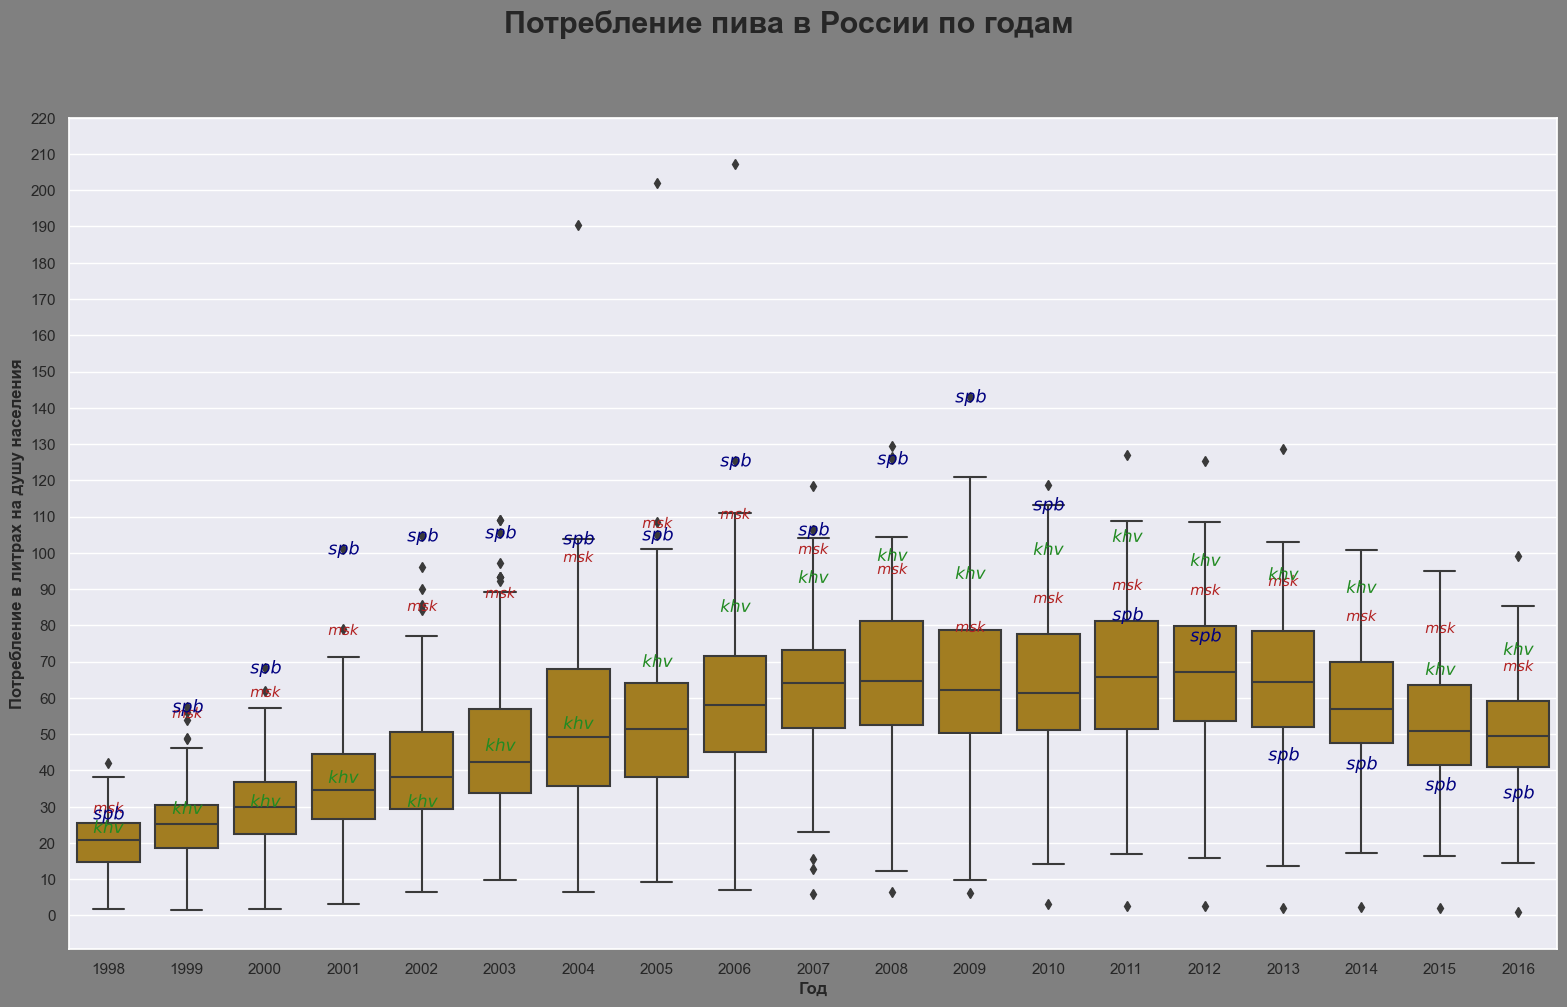

In [23]:
ttl = 'Потребление пива в России по годам'
plt.figure(figsize=[19.2, 10.8], facecolor = 'grey')
plt.suptitle(ttl, fontsize = 22, fontweight = 'bold')

xm = df1[df1['region'] == 'Moscow']['year']
ym = df1[df1['region'] == 'Moscow']['beer']
xs = df1[df1['region'] == 'Saint Petersburg']['year']
ys = df1[df1['region'] == 'Saint Petersburg']['beer']
xk = df1[df1['region'] == 'Khabarovsk Krai']['year']
yk = df1[df1['region'] == 'Khabarovsk Krai']['beer']

sns.boxplot(data = df1, x = 'year', y = 'beer', orient = 'v', color = '#B8860B')
sns.swarmplot(x= xm, y= ym, marker = '$msk$', color = '#B22222', size = 22, orient='v')
sns.swarmplot(x= xs, y= ys, marker = '$spb$', color = '#000080', size = 22, orient='v')
sns.swarmplot(x= xk, y= yk, marker = '$khv$', color = '#228B22', size = 22, orient='v')

plt.xlabel('Год', fontweight = 'bold')
plt.ylabel('Потребление в литрах на душу населения', fontweight = 'bold')
plt.yticks(range(0, 227, 10))
plt.show()

---

Как можно увидеть из графика, потребление пива в стране увеличивалось с 1998 по 2008 год, а затем до 2013 года держалось на максимальных отметках. С 2013 года наблюдается спад в потреблении пива.

Если рассмотреть потребление в отдельных городах, то можно заметить следующую картину:

Санкт-Петербург до 2010 года занимал одно из первых мест по распитию этого напитка, причем в большинстве годов показатели были настолько велики, что считались выбросами. После 2010 года потребление пива пришло к средним показателям по стране, и это не средний показатель по стране увеличился, а упало потребление в Санкт-Петербурге. А с 2013 года показатель опустился ниже среднего потребления по всей стране.

Также мы можем наблюдать, что потребление пива в Санкт-Петербурге увеличивалось каждый год до 2009 года, а с 2009 года мы видим хороший спад.

Из графика также видно, что Москва постоянно на протяжении всего срока наблюдения имеет высокие показатели в употреблении пива, которые всегда превышали среднее потребление по стране.

Город Хабаровск с 1998 по 2004 год держался в средних показателях по стране, а с 2005 года началось увеличение потребления пива, и с 2008 года Хабаровск очень близок к максимальным показателям распития этого напитка.

Ниже можно ознакомиться с аналогичными графиками по употреблению остальных видов алкоголя.

---

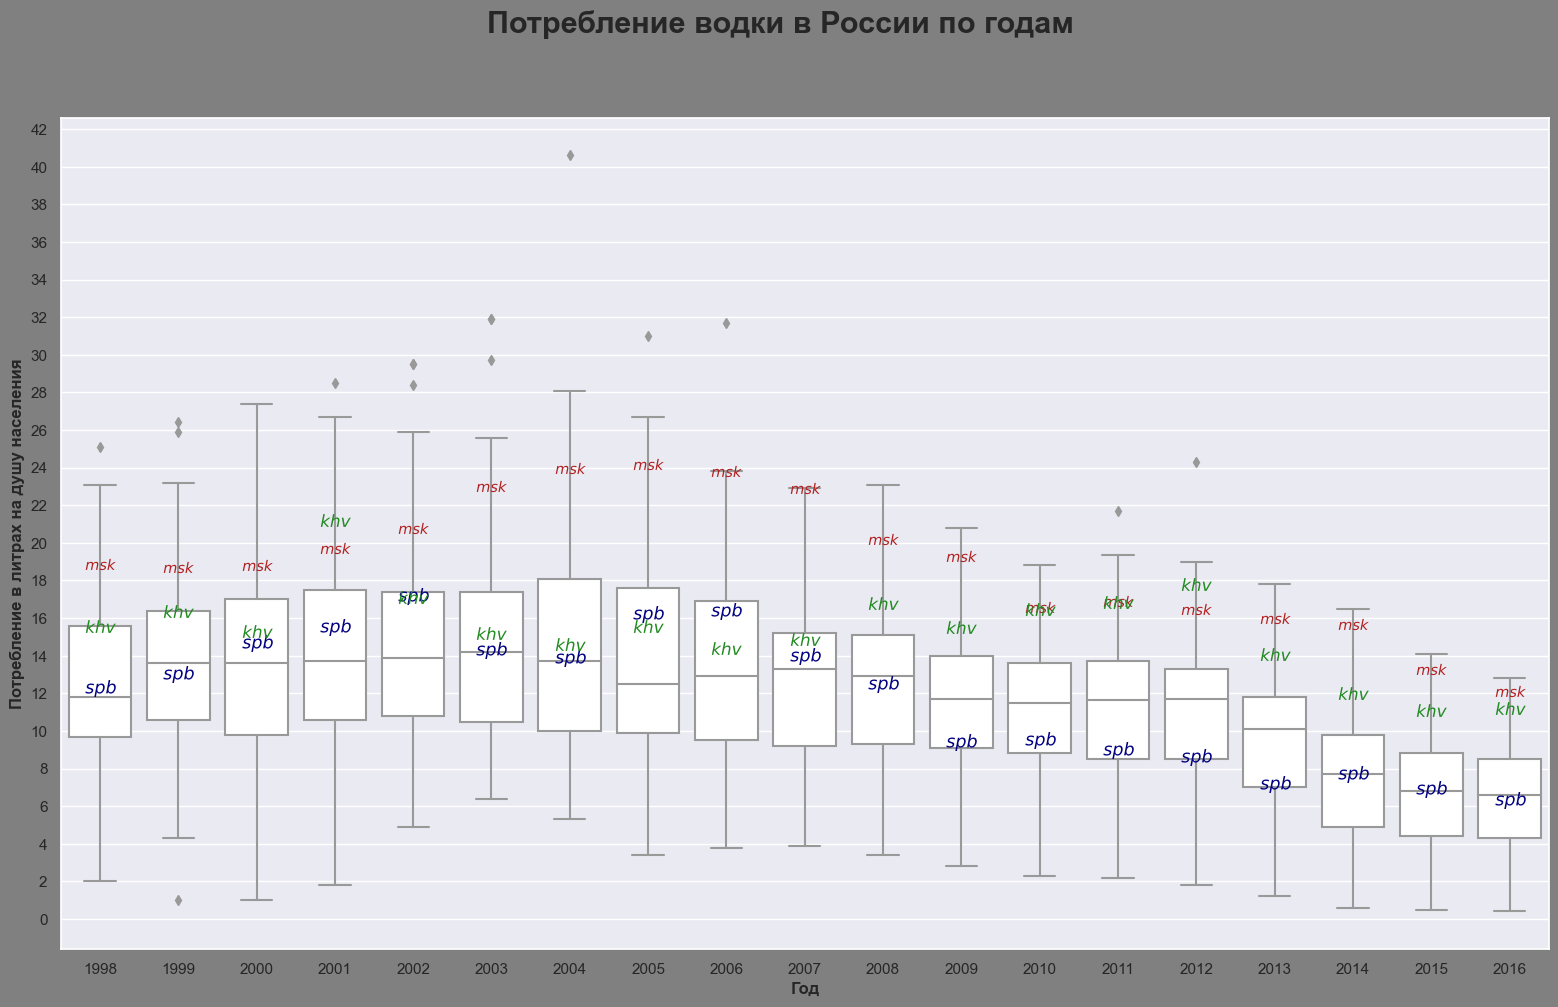

In [24]:
ttl = 'Потребление водки в России по годам'
plt.figure(figsize=[19.2, 10.8], facecolor = 'grey')
plt.suptitle(ttl, fontsize = 22, fontweight = 'bold')

xm = df1[df1['region'] == 'Moscow']['year']
ym = df1[df1['region'] == 'Moscow']['vodka']
xs = df1[df1['region'] == 'Saint Petersburg']['year']
ys = df1[df1['region'] == 'Saint Petersburg']['vodka']
xk = df1[df1['region'] == 'Khabarovsk Krai']['year']
yk = df1[df1['region'] == 'Khabarovsk Krai']['vodka']

sns.boxplot(data = df1, x = 'year', y = 'vodka', orient = 'v', color = '#FFFFFF')
sns.swarmplot(x= xm, y= ym, marker = '$msk$', color = '#B22222', size = 22, orient='v')
sns.swarmplot(x= xs, y= ys, marker = '$spb$', color = '#000080', size = 22, orient='v')
sns.swarmplot(x= xk, y= yk, marker = '$khv$', color = '#228B22', size = 22, orient='v')

plt.xlabel('Год', fontweight = 'bold')
plt.ylabel('Потребление в литрах на душу населения', fontweight = 'bold')
plt.yticks(range(0, 43, 2))
plt.show()

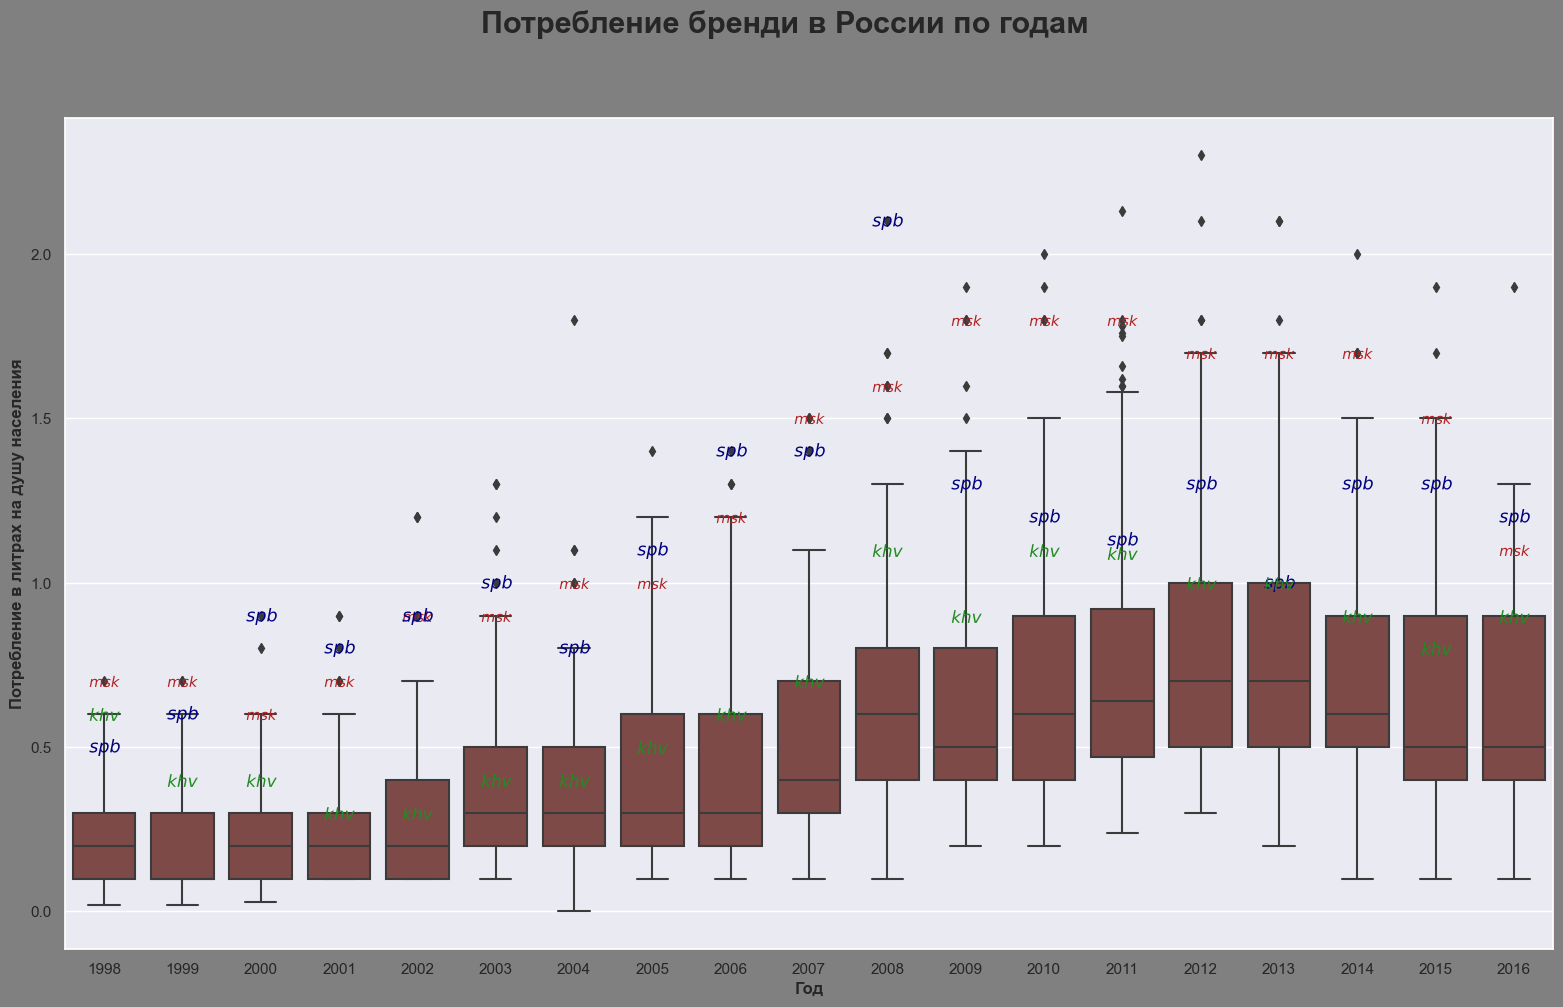

In [25]:
ttl = 'Потребление бренди в России по годам'
plt.figure(figsize=[19.2, 10.8], facecolor = 'grey')
plt.suptitle(ttl, fontsize = 22, fontweight = 'bold')

xm = df1[df1['region'] == 'Moscow']['year']
ym = df1[df1['region'] == 'Moscow']['brandy']
xs = df1[df1['region'] == 'Saint Petersburg']['year']
ys = df1[df1['region'] == 'Saint Petersburg']['brandy']
xk = df1[df1['region'] == 'Khabarovsk Krai']['year']
yk = df1[df1['region'] == 'Khabarovsk Krai']['brandy']

sns.boxplot(data = df1, x = 'year', y = 'brandy', orient = 'v', color = '#87413f')
sns.swarmplot(x= xm, y= ym, marker = '$msk$', color = '#B22222', size = 22, orient='v')
sns.swarmplot(x= xs, y= ys, marker = '$spb$', color = '#000080', size = 22, orient='v')
sns.swarmplot(x= xk, y= yk, marker = '$khv$', color = '#228B22', size = 22, orient='v')

plt.xlabel('Год', fontweight = 'bold')
plt.ylabel('Потребление в литрах на душу населения', fontweight = 'bold')
#plt.yticks(range(0, 43, 2))
plt.show()

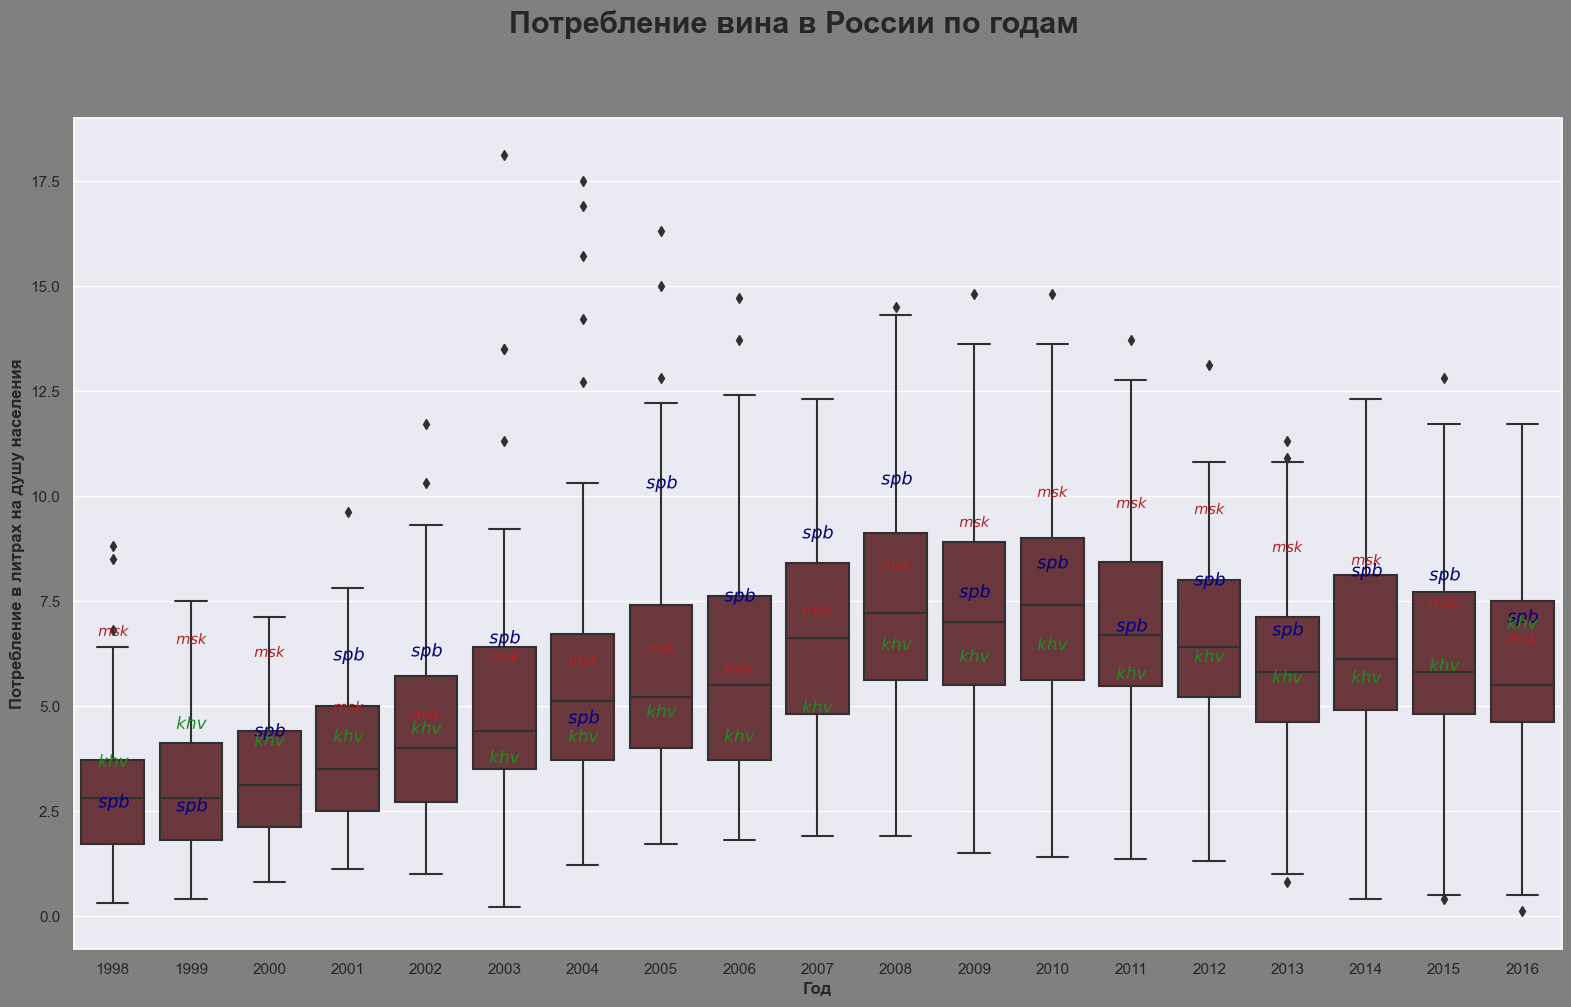

In [26]:
ttl = 'Потребление вина в России по годам'
plt.figure(figsize=[19.2, 10.8], facecolor = 'grey')
plt.suptitle(ttl, fontsize = 22, fontweight = 'bold')

xm = df1[df1['region'] == 'Moscow']['year']
ym = df1[df1['region'] == 'Moscow']['wine']
xs = df1[df1['region'] == 'Saint Petersburg']['year']
ys = df1[df1['region'] == 'Saint Petersburg']['wine']
xk = df1[df1['region'] == 'Khabarovsk Krai']['year']
yk = df1[df1['region'] == 'Khabarovsk Krai']['wine']

sns.boxplot(data = df1, x = 'year', y = 'wine', orient = 'v', color = '#722f37')
sns.swarmplot(x= xm, y= ym, marker = '$msk$', color = '#B22222', size = 22, orient='v')
sns.swarmplot(x= xs, y= ys, marker = '$spb$', color = '#000080', size = 22, orient='v')
sns.swarmplot(x= xk, y= yk, marker = '$khv$', color = '#228B22', size = 22, orient='v')

plt.xlabel('Год', fontweight = 'bold')
plt.ylabel('Потребление в литрах на душу населения', fontweight = 'bold')
#plt.yticks(range(0, 43, 2))
plt.show()

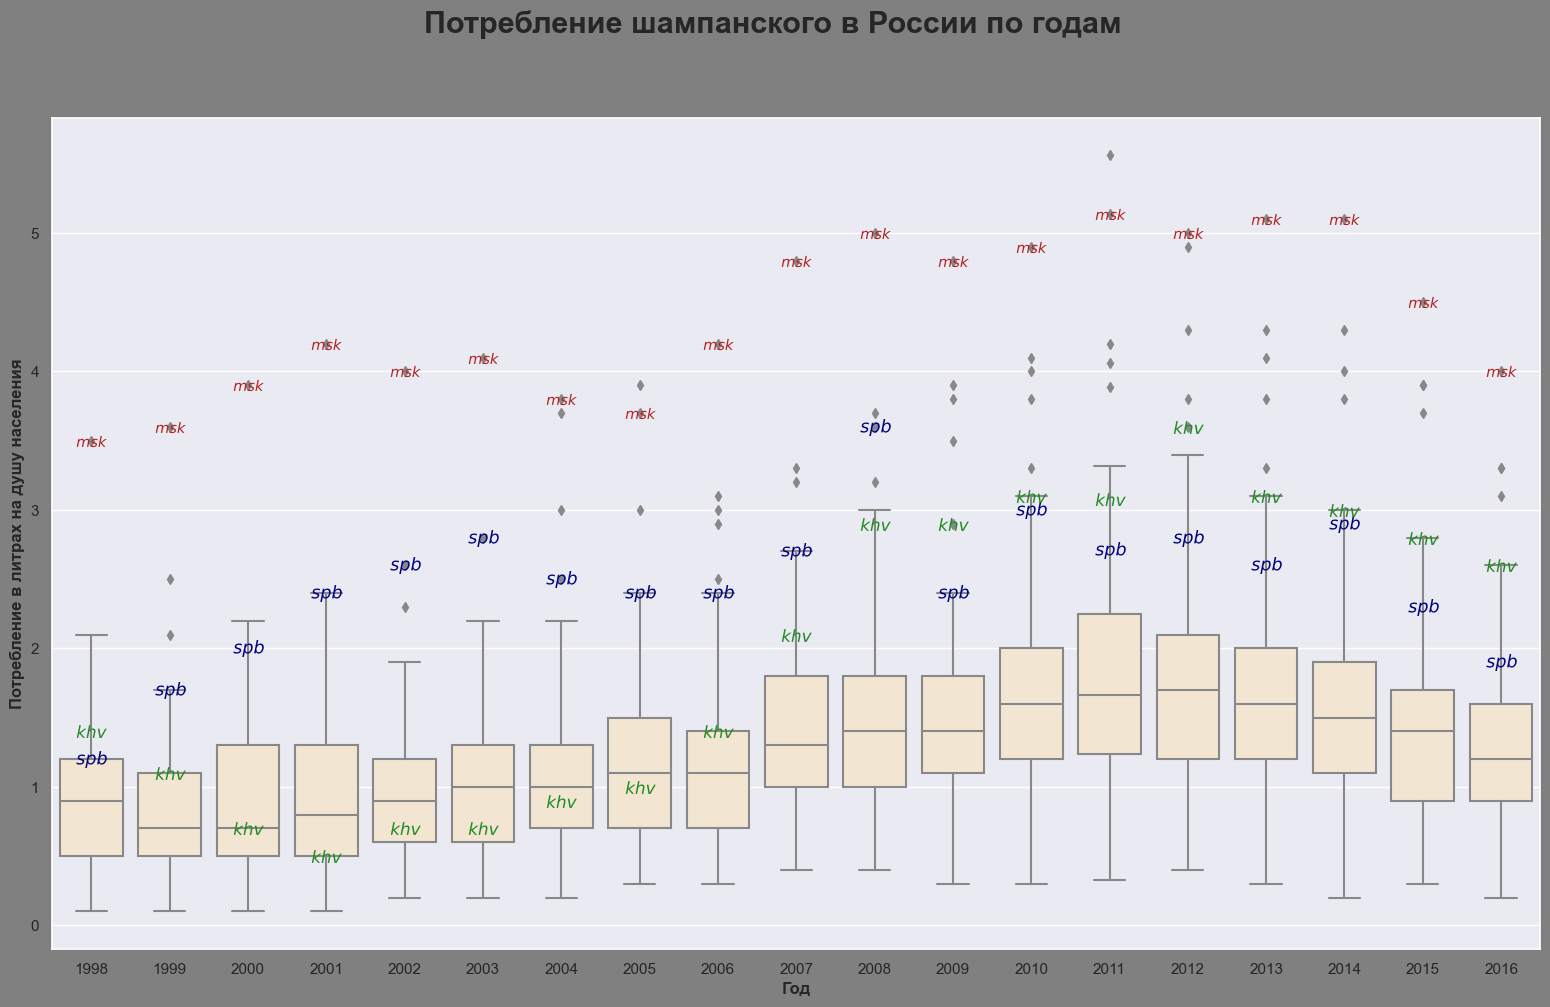

In [27]:
ttl = 'Потребление шампанского в России по годам'
plt.figure(figsize=[19.2, 10.8], facecolor = 'grey')
plt.suptitle(ttl, fontsize = 22, fontweight = 'bold')

xm = df1[df1['region'] == 'Moscow']['year']
ym = df1[df1['region'] == 'Moscow']['champagne']
xs = df1[df1['region'] == 'Saint Petersburg']['year']
ys = df1[df1['region'] == 'Saint Petersburg']['champagne']
xk = df1[df1['region'] == 'Khabarovsk Krai']['year']
yk = df1[df1['region'] == 'Khabarovsk Krai']['champagne']

sns.boxplot(data = df1, x = 'year', y = 'champagne', orient = 'v', color = '#f7e7ce')
sns.swarmplot(x= xm, y= ym, marker = '$msk$', color = '#B22222', size = 22, orient='v')
sns.swarmplot(x= xs, y= ys, marker = '$spb$', color = '#000080', size = 22, orient='v')
sns.swarmplot(x= xk, y= yk, marker = '$khv$', color = '#228B22', size = 22, orient='v')

plt.xlabel('Год', fontweight = 'bold')
plt.ylabel('Потребление в литрах на душу населения', fontweight = 'bold')
#plt.yticks(range(0, 43, 2))
plt.show()

---

Каждый вид алкоголя имеет свою крепость и цену, соответственно количество употребленного алкоголя может сильно отличаться. Возникает вопрос: какой вид алкоголя чаще всего употребляют, кто выпил больше – человек, который выпил кружку пива, или человек, который выпил 7 рюмок водки?

Чтобы это понять, преобразуем все данные через MinMaxScaler и тем самым приведем их к одним величинам.

---

In [28]:
mms = MinMaxScaler()

In [29]:
df1[['wine', 'beer', 'vodka', 'champagne', 'brandy']]

wine  beer  vodka  champagne  brandy
0      1.9   8.8    3.4        0.3     0.1
1      3.3  19.2   11.3        1.1     0.1
2      2.1  21.2   17.3        0.7     0.4
3      4.3  10.6   11.7        0.4     0.3
4      2.9  18.0    9.5        0.8     0.2
...    ...   ...    ...        ...     ...
1534   5.0  42.3    7.7        0.7     0.4
1535   3.9  34.0   11.6        1.8     1.1
1536   4.3  56.1    8.2        1.8     0.5
1537   4.5  75.8    8.2        1.7     1.3
1538  10.2  38.0    8.9        1.4     1.0

[1539 rows x 5 columns]

In [30]:
mms.fit(df1[['wine', 'beer', 'vodka', 'champagne', 'brandy']])

MinMaxScaler()

In [31]:
df_mms = pd.DataFrame(mms.transform(df1[['wine', 'beer', 'vodka', 'champagne', 'brandy']]), 
                            columns = ['wine_mms', 'beer_mms', 'vodka_mms', 'champagne_mms', 'brandy_mms'])
df_mms = df1[['year', 'region', 'wine', 'beer', 'vodka', 'champagne', 'brandy']].join(df_mms)
df_mms['all_mean_mms'] = df_mms[['wine_mms', 'beer_mms', 'vodka_mms', 'champagne_mms', 'brandy_mms']].mean(axis = 1)

df_mms = df_mms[['year', 'region', 'wine', 'wine_mms',
                 'beer', 'beer_mms', 
                 'vodka', 'vodka_mms', 'champagne', 'champagne_mms', 
                 'brandy', 'brandy_mms', 'all_mean_mms']]
# df_mms.to_csv('data/df_mms.csv')
df_mms

year                          region  wine  wine_mms  beer  beer_mms  \
0     1998              Republic of Adygea   1.9  0.100000   8.8  0.037809   
1     1998                      Altai Krai   3.3  0.177778  19.2  0.088221   
2     1998                     Amur Oblast   2.1  0.111111  21.2  0.097916   
3     1998              Arkhangelsk Oblast   4.3  0.233333  10.6  0.046534   
4     1998                Astrakhan Oblast   2.9  0.155556  18.0  0.082404   
...    ...                             ...   ...       ...   ...       ...   
1534  2016                Chuvash Republic   5.0  0.272222  42.3  0.200194   
1535  2016       Chukotka Autonomous Okrug   3.9  0.211111  34.0  0.159961   
1536  2016        Sakha (Yakutia) Republic   4.3  0.233333  56.1  0.267087   
1537  2016  Yamalo-Nenets Autonomous Okrug   4.5  0.244444  75.8  0.362579   
1538  2016                Yaroslavl Oblast  10.2  0.561111  38.0  0.179350   

      vodka  vodka_mms  champagne  champagne_mms  brandy  brandy_mms  \
0       3.4   0.074627        0.3       0.036630     0.1    0.043478   
1      11.3   0.271144        1.1       0.183150     0.1    0.043478   
2      17.3   0.420398        0.7       0.109890     0.4    0.173913   
3      11.7   0.281095        0.4       0.054945     0.3    0.130435   
4       9.5   0.226368        0.8       0.128205     0.2    0.086957   
...     ...        ...        ...            ...     ...         ...   
1534    7.7   0.181592        0.7       0.109890     0.4    0.173913   
1535   11.6   0.278607        1.8       0.311355     1.1    0.478261   
1536    8.2   0.194030        1.8       0.311355     0.5    0.217391   
1537    8.2   0.194030        1.7       0.293040     1.3    0.565217   
1538    8.9   0.211443        1.4       0.238095     1.0    0.434783   

      all_mean_mms  
0         0.058509  
1         0.152754  
2         0.182646  
3         0.149268  
4         0.135898  
...            ...  
1534      0.187562  
1535      0.287859  
1536      0.244639  
1537      0.331862  
1538      0.324956  

[1539 rows x 13 columns]

---

Теперь мы можем сравнить потребление разных видов алкоголя и выяснить, какой из них наиболее популярен среди россиян.

---

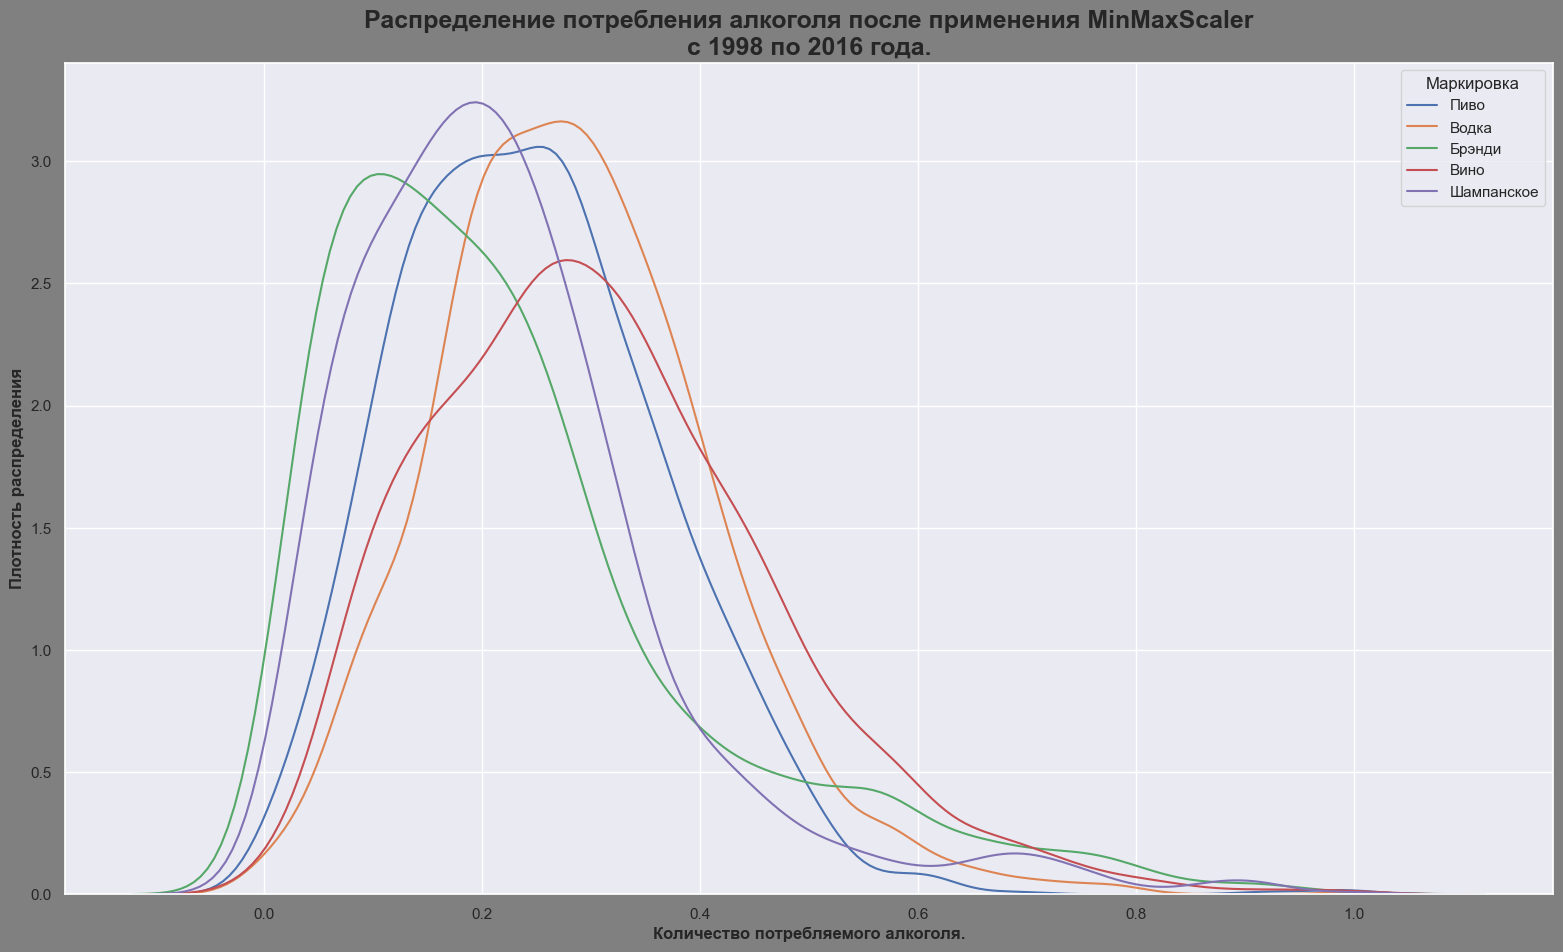

In [32]:
ttl = 'Распределение потребления алкоголя после применения MinMaxScaler\nc 1998 по 2016 года.'
plt.figure(figsize=[19.20, 10.8], facecolor = 'grey')

sns.kdeplot(data = df_mms, x = 'beer_mms') #, color = '#B8860B')
sns.kdeplot(data = df_mms, x = 'vodka_mms') #, color = '#FFFFFF')
sns.kdeplot(data = df_mms, x = 'brandy_mms') #, color = '#87413f')
sns.kdeplot(data = df_mms, x = 'wine_mms') #, color = '#722f37')
sns.kdeplot(data = df_mms, x = 'champagne_mms') #, color = '#f7e7ce')

plt.title(ttl, fontsize = 18, fontweight = 'bold')
plt.xlabel('Количество потребляемого алкоголя.', fontweight = 'bold')
plt.ylabel('Плотность распределения', fontweight = 'bold')
plt.legend (title='Маркировка',
            labels=['Пиво', 'Водка', 'Брэнди', 'Вино', 'Шампанское'])
#plt.savefig(f'savefig/{time.strftime("%Y%m%d-%H%M%S")} - {ttl}.png')
plt.show()

---

Из графика распределения нельзя точно определить, какой алкоголь наиболее популярен. 

Чтобы получить точный ответ, мы проведём A/B-тестирование.

Мы рассмотрим две гипотезы:

* H0: потребление вина больше потребления водки.
* H1: потребление вина не превышает потребление водки.

Уровень значимости — 5%.

---

In [33]:
stats.ttest_ind(df_mms['wine_mms'], df_mms['vodka_mms'], alternative='two-sided')

TtestResult(statistic=4.200750404851318, pvalue=2.7359044638186055e-05, df=3076.0)

In [34]:
stats.ttest_ind(df_mms['wine_mms'], df_mms['vodka_mms'], alternative = 'greater')

TtestResult(statistic=4.200750404851318, pvalue=1.3679522319093027e-05, df=3076.0)

---

По результатам тестов мы получили следующие p-значения (1.37e-05) – это меньше, чем альфа = 0,05. 

Соответственно среднее значение распределения в первой выборке больше, чем среднее значение распределения во второй выборке.

Отсюда можно сделать вывод, что в нашей стране больше предпочитают вино, чем водку.

Давайте добавим немного автоматизации и составим рейтинг самых популярных алкогольных напитков.

---

In [35]:
# Для дальнейшего удобства создадим несколько списков
alc_rus = ['Пиво',     'Водка',     'Брэнди',     'Вино',     'Шампанское']
alc_mms = ['beer_mms', 'vodka_mms', 'brandy_mms', 'wine_mms', 'champagne_mms']
alc_org = ['beer',     'vodka',     'brandy',     'wine',     'champagne']
years = range(1998, 2017, 1)

In [36]:
pop_alc = pd.DataFrame(columns = ['alco', 'pvalue'])
alc = []
pvl = []

for a1 in alc_mms:
    for a2 in alc_mms:
        if a1 != a2:
            alc.append(a1)
            pvl.append(stats.ttest_ind(df_mms[a1], df_mms[a2], alternative = 'greater')[1])

pop_alc['alco'] = alc
pop_alc['pvalue'] = pvl

al1 = pop_alc.groupby(['alco']).sum().sort_values(by = ['pvalue']).index[0]
al2 = pop_alc.groupby(['alco']).sum().sort_values(by = ['pvalue']).index[1]
al3 = pop_alc.groupby(['alco']).sum().sort_values(by = ['pvalue']).index[2]
al4 = pop_alc.groupby(['alco']).sum().sort_values(by = ['pvalue']).index[3]
al5 = pop_alc.groupby(['alco']).sum().sort_values(by = ['pvalue']).index[4]

print(f'''Рейтинг самых популярных алкогольных напитков в России с 1998 по 2016 год:
Первое место — {alc_rus[alc_mms.index(al1)]};
Второе место — {alc_rus[alc_mms.index(al2)]};
Третье место — {alc_rus[alc_mms.index(al3)]};
Четвертое место — {alc_rus[alc_mms.index(al4)]};
И последнее пятое место — {alc_rus[alc_mms.index(al5)]}.''')
display(pop_alc.groupby(['alco']).sum().sort_values(by = ['pvalue']))

Рейтинг самых популярных алкогольных напитков в России с 1998 по 2016 год:
Первое место — Вино;
Второе место — Водка;
Третье место — Пиво;
Четвертое место — Брэнди;
И последнее пятое место — Шампанское.


pvalue
alco                   
wine_mms       0.000014
vodka_mms      0.999986
beer_mms       2.000452
brandy_mms     3.177300
champagne_mms  3.822248

---

Теперь можно посмотреть как менялись предпочтения по алкоголю из года в год.

---

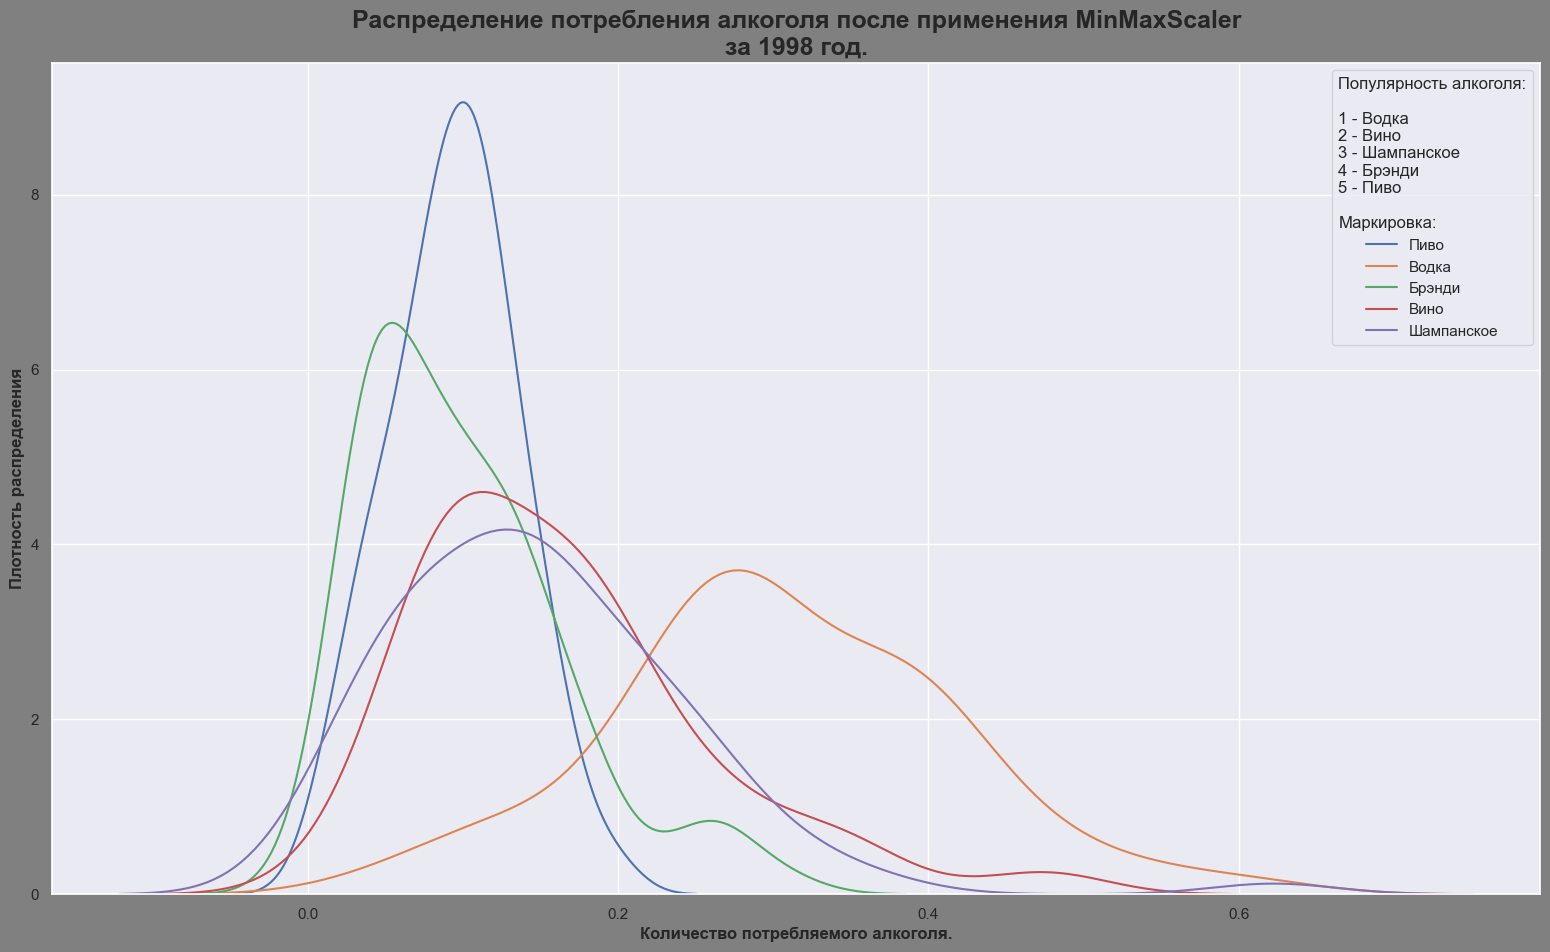

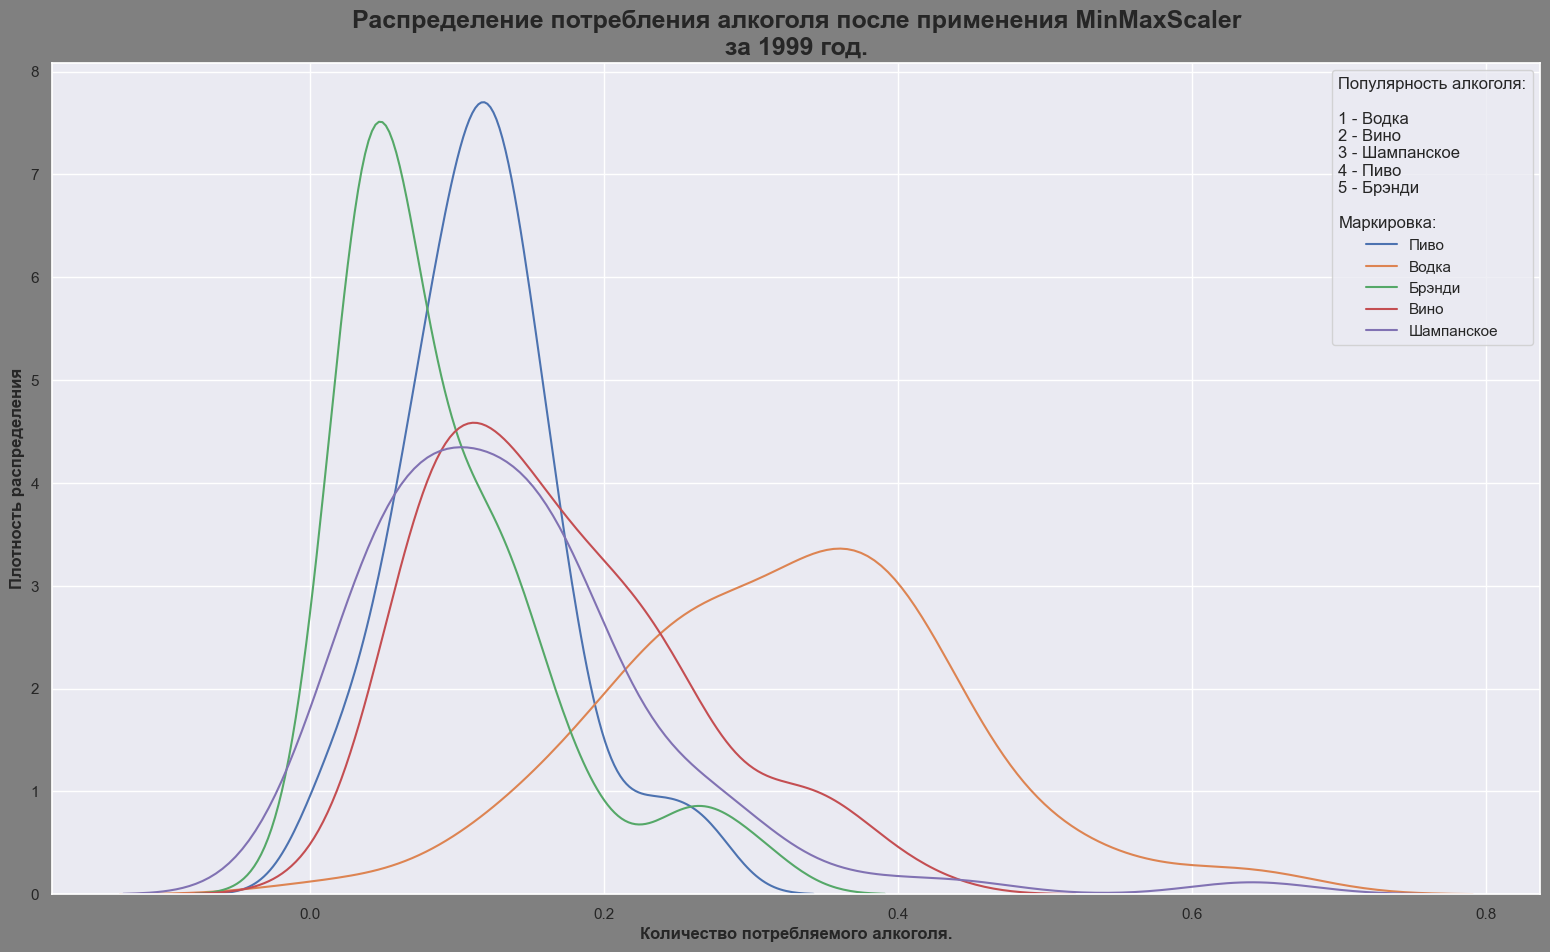

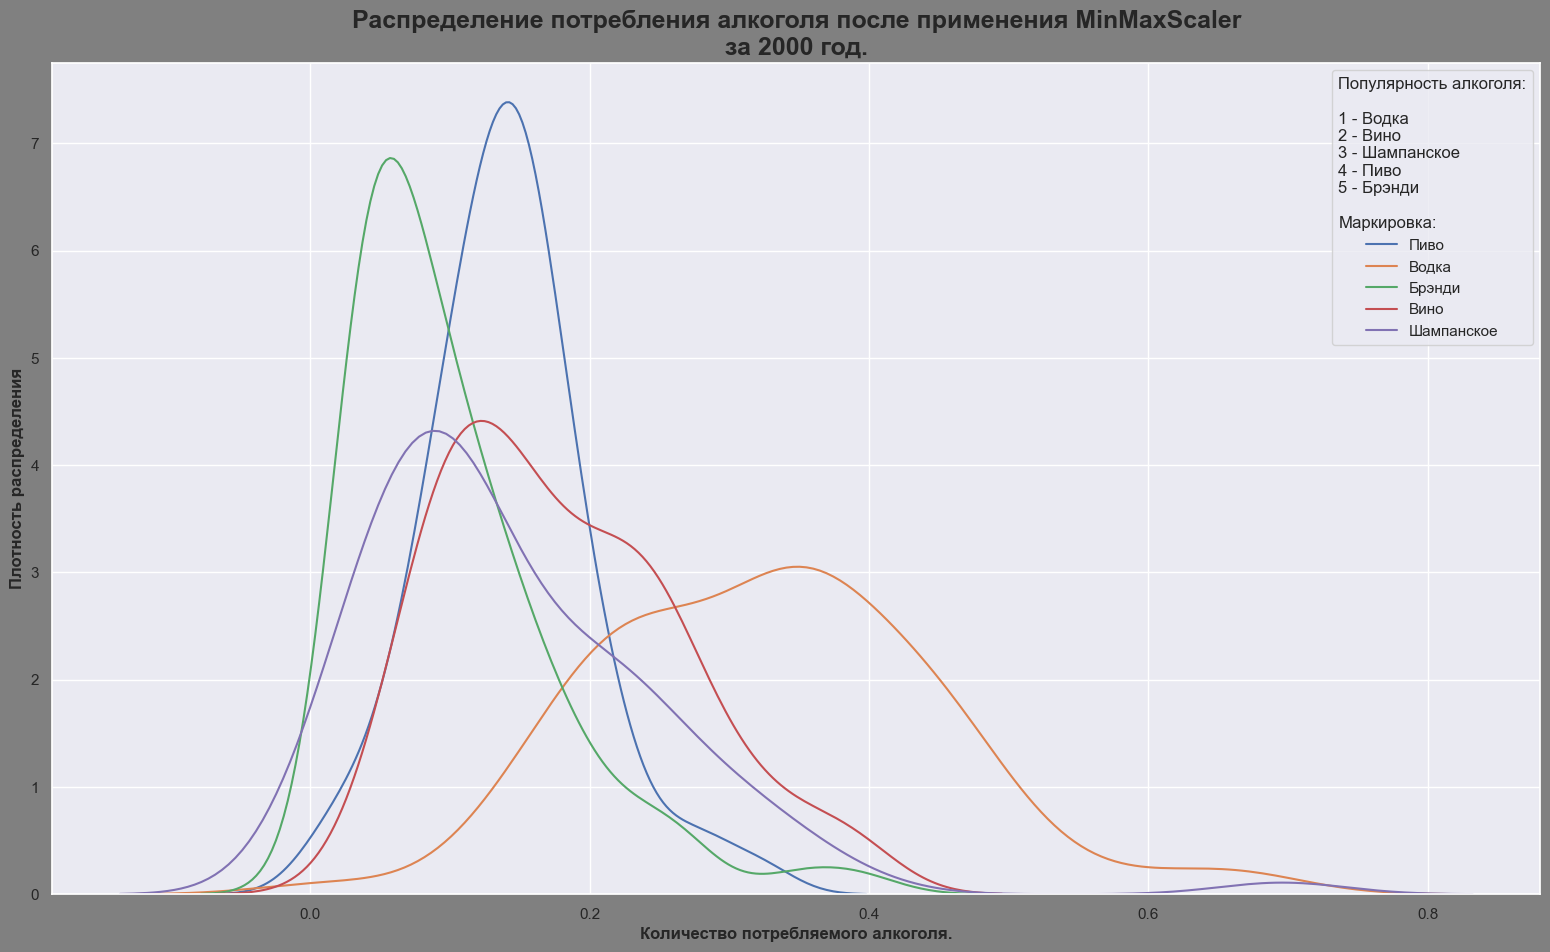

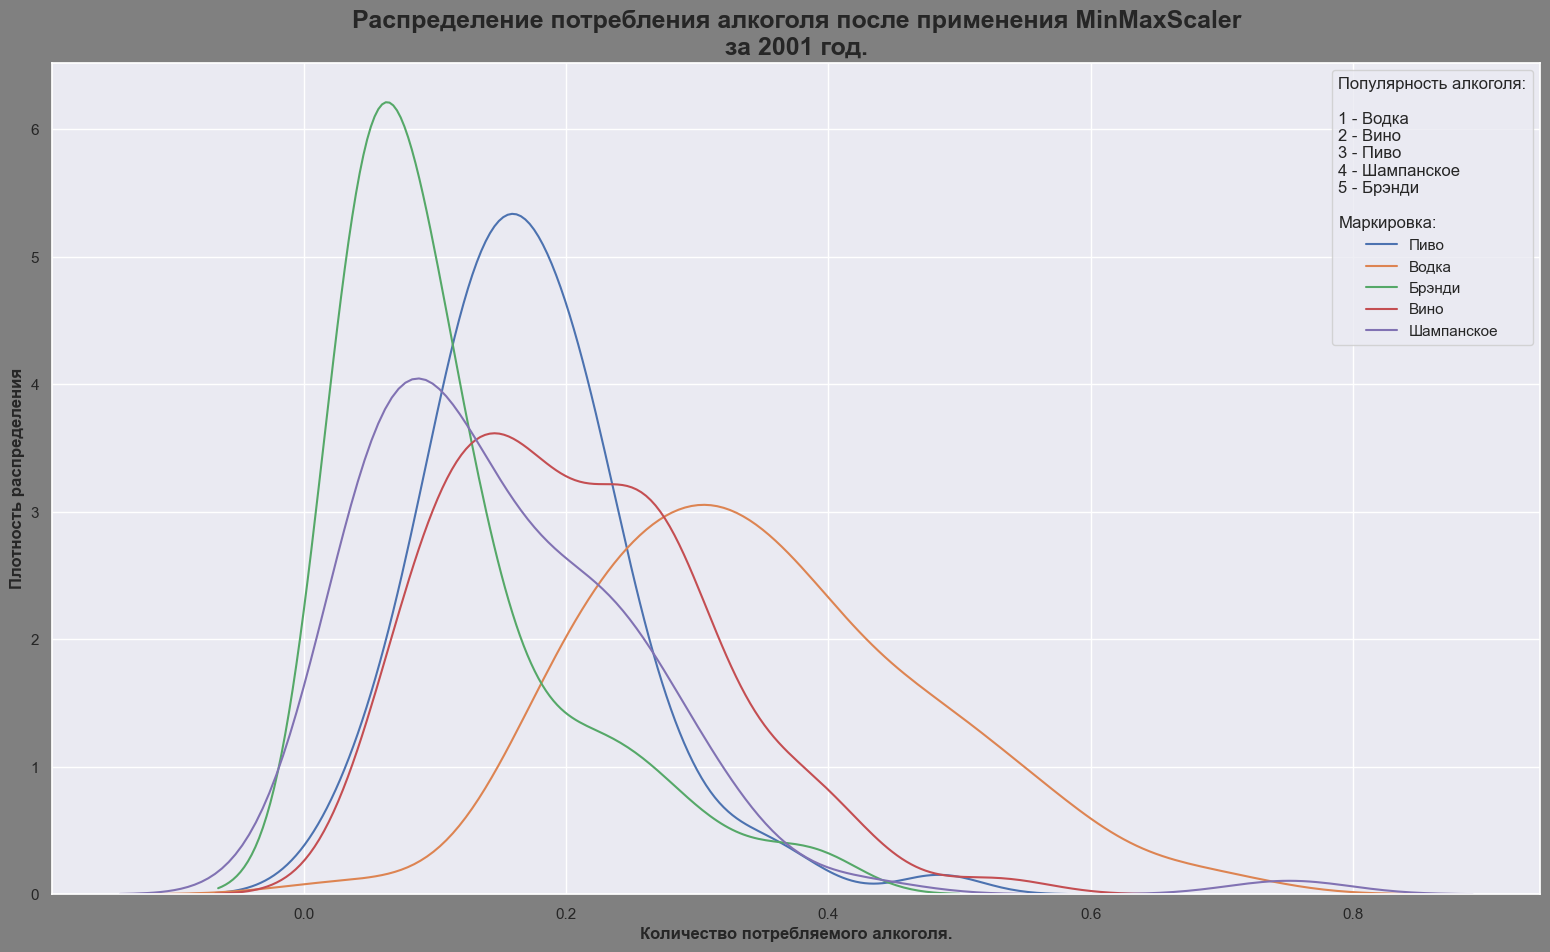

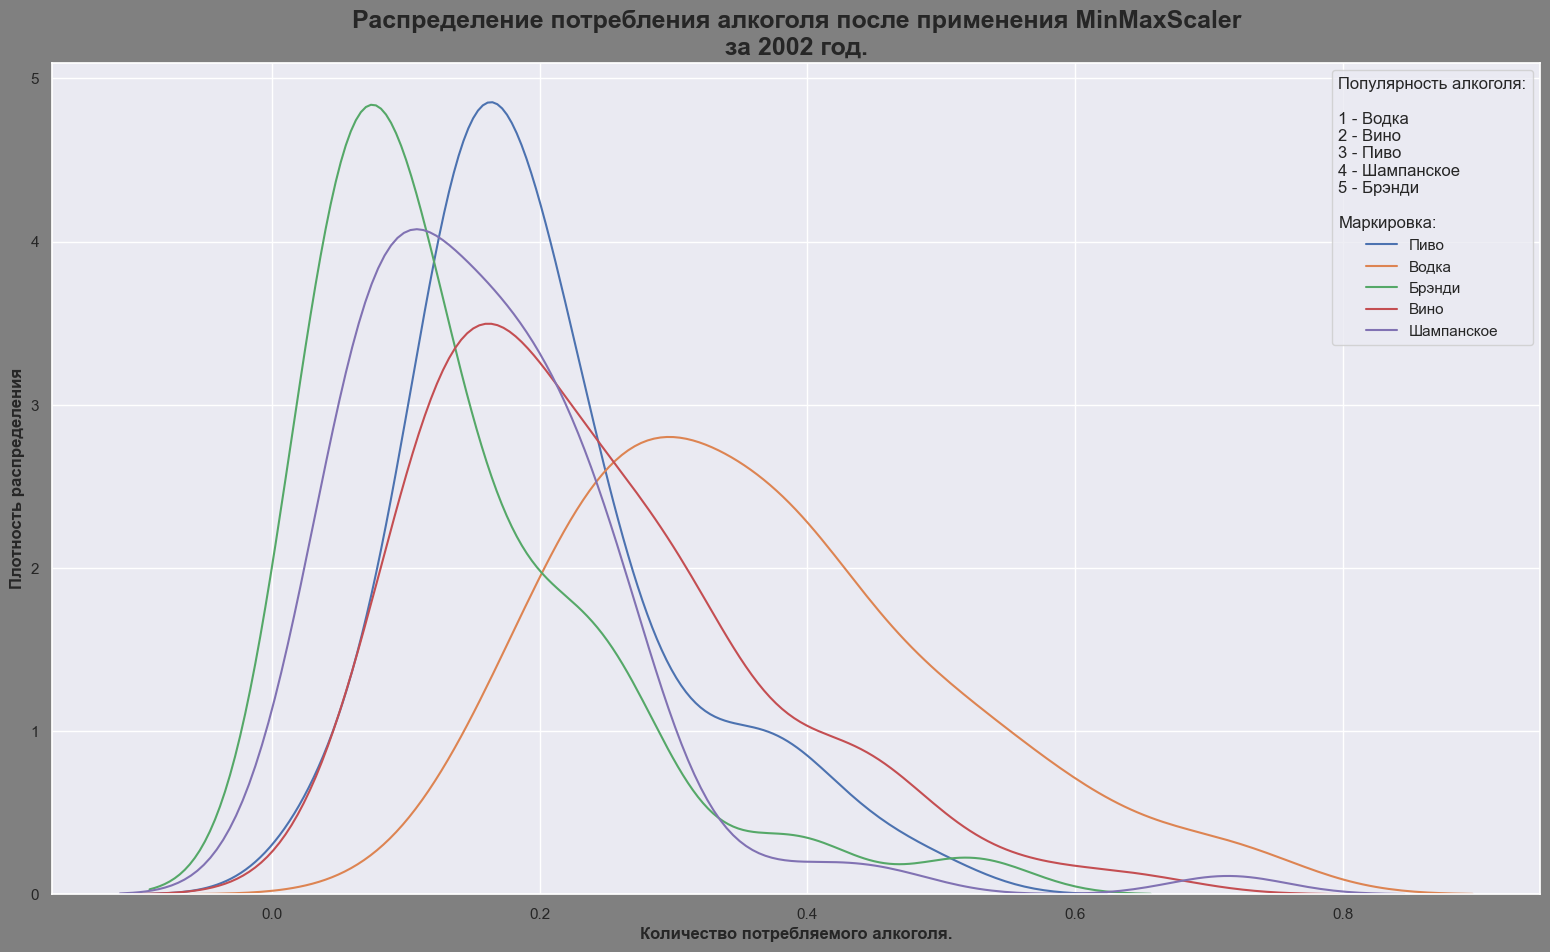

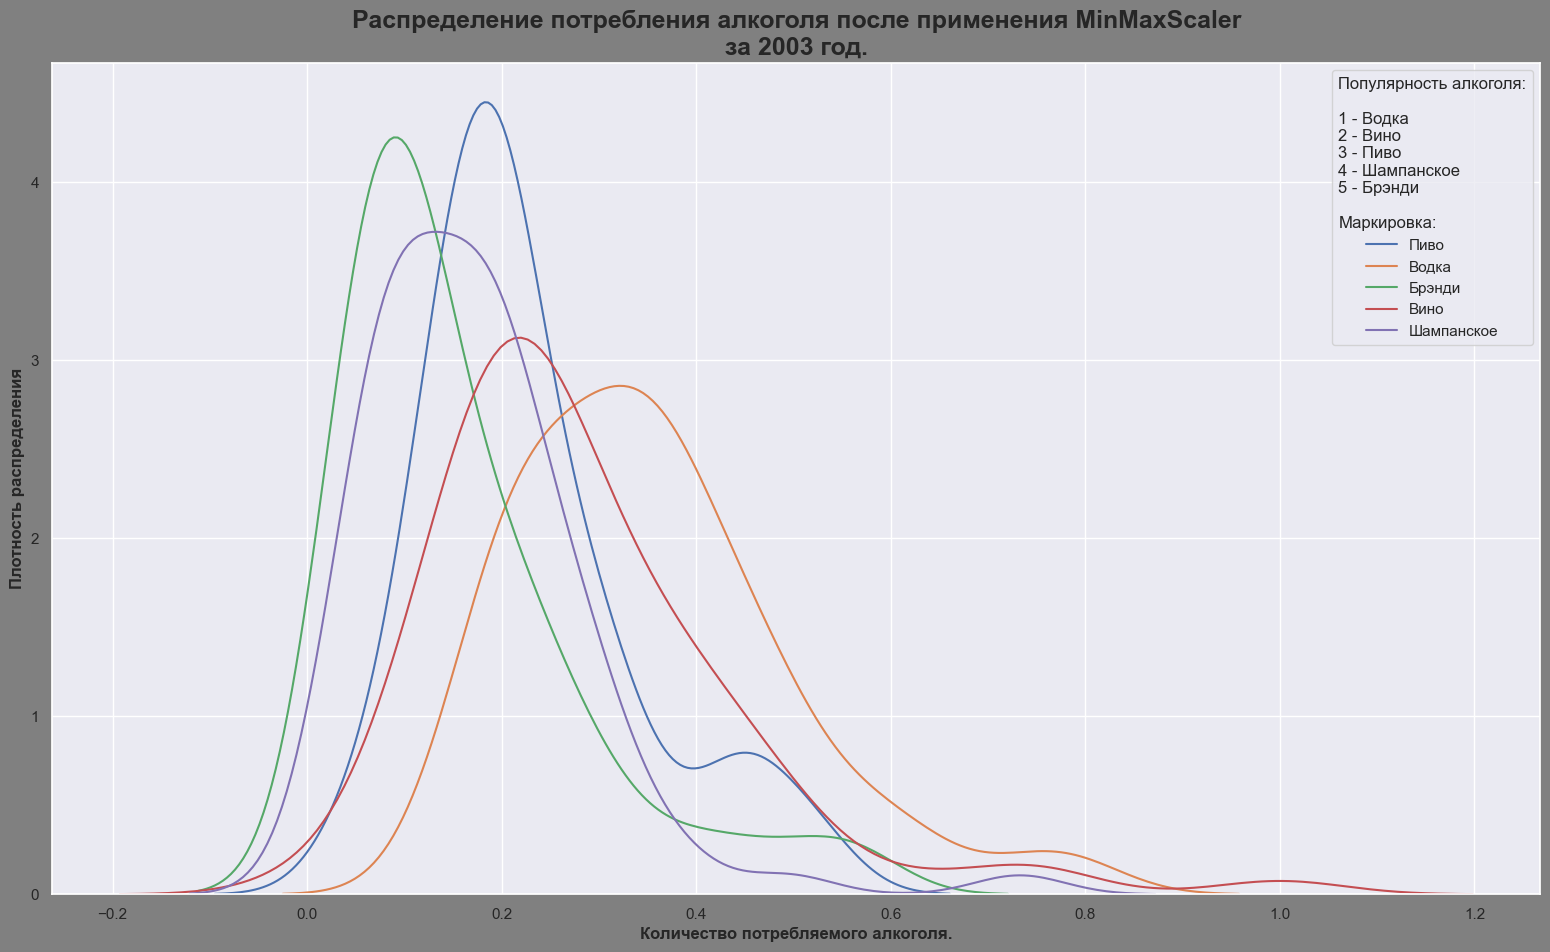

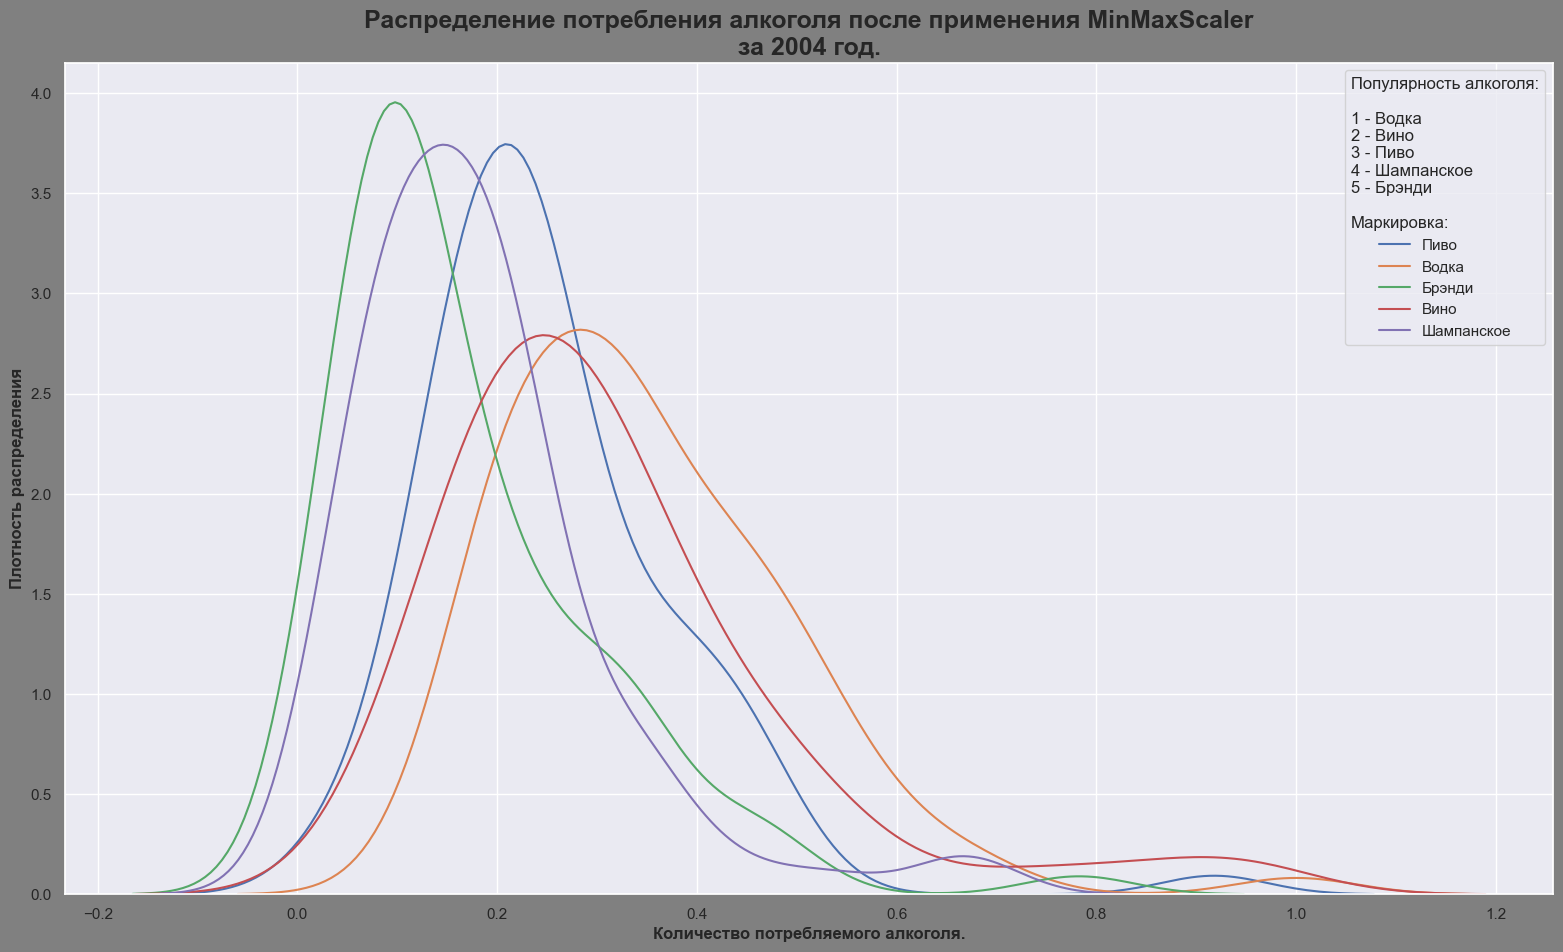

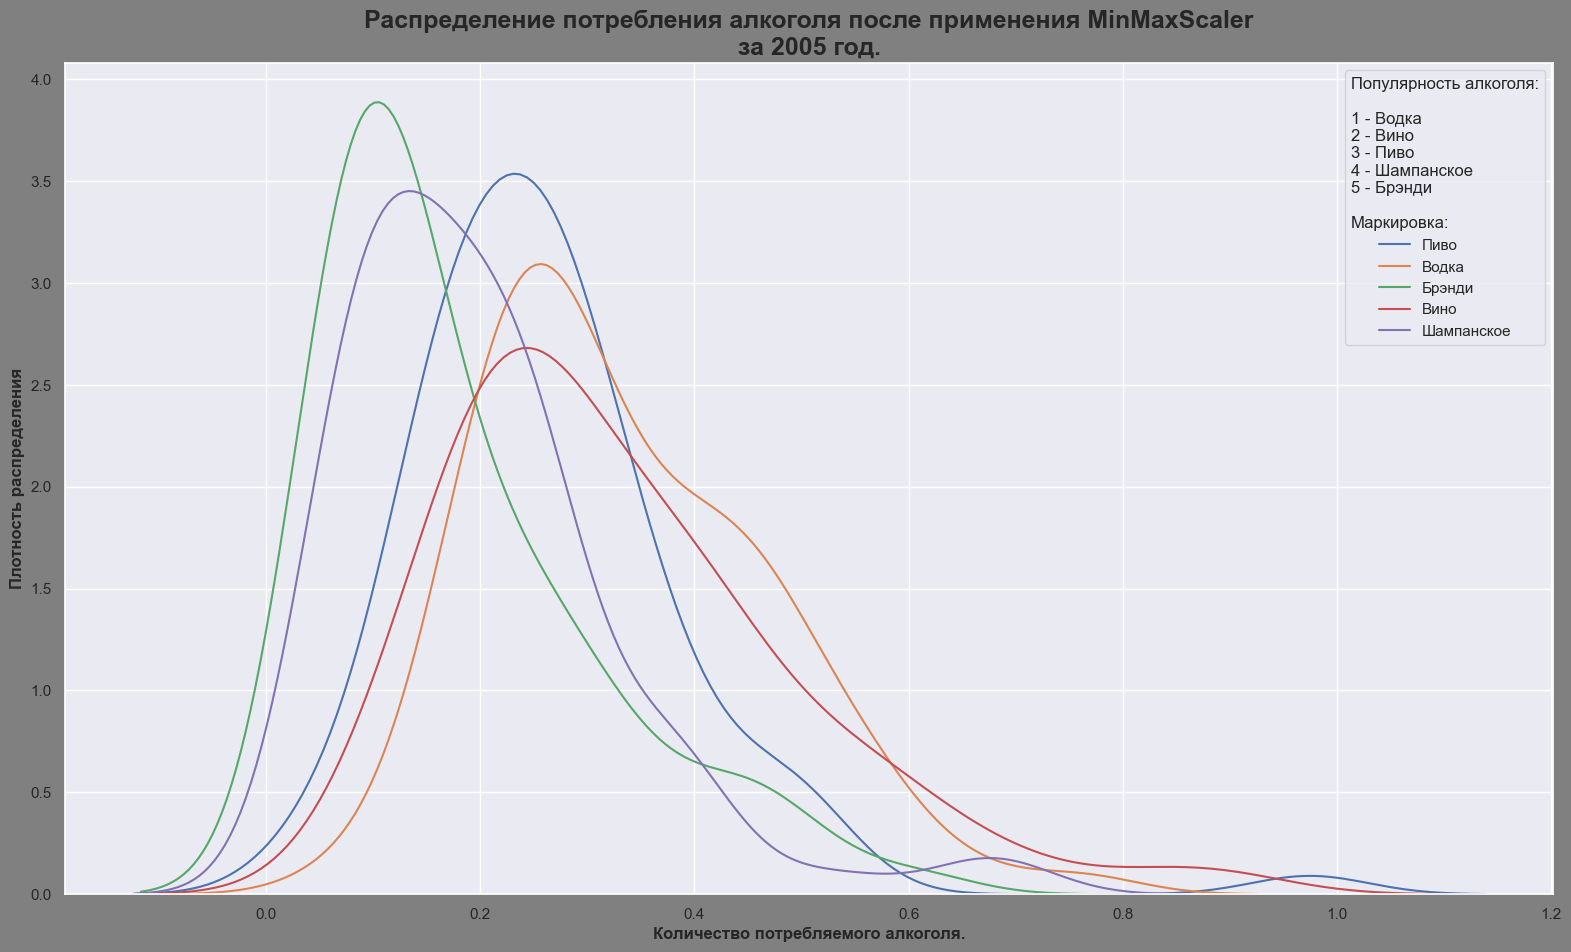

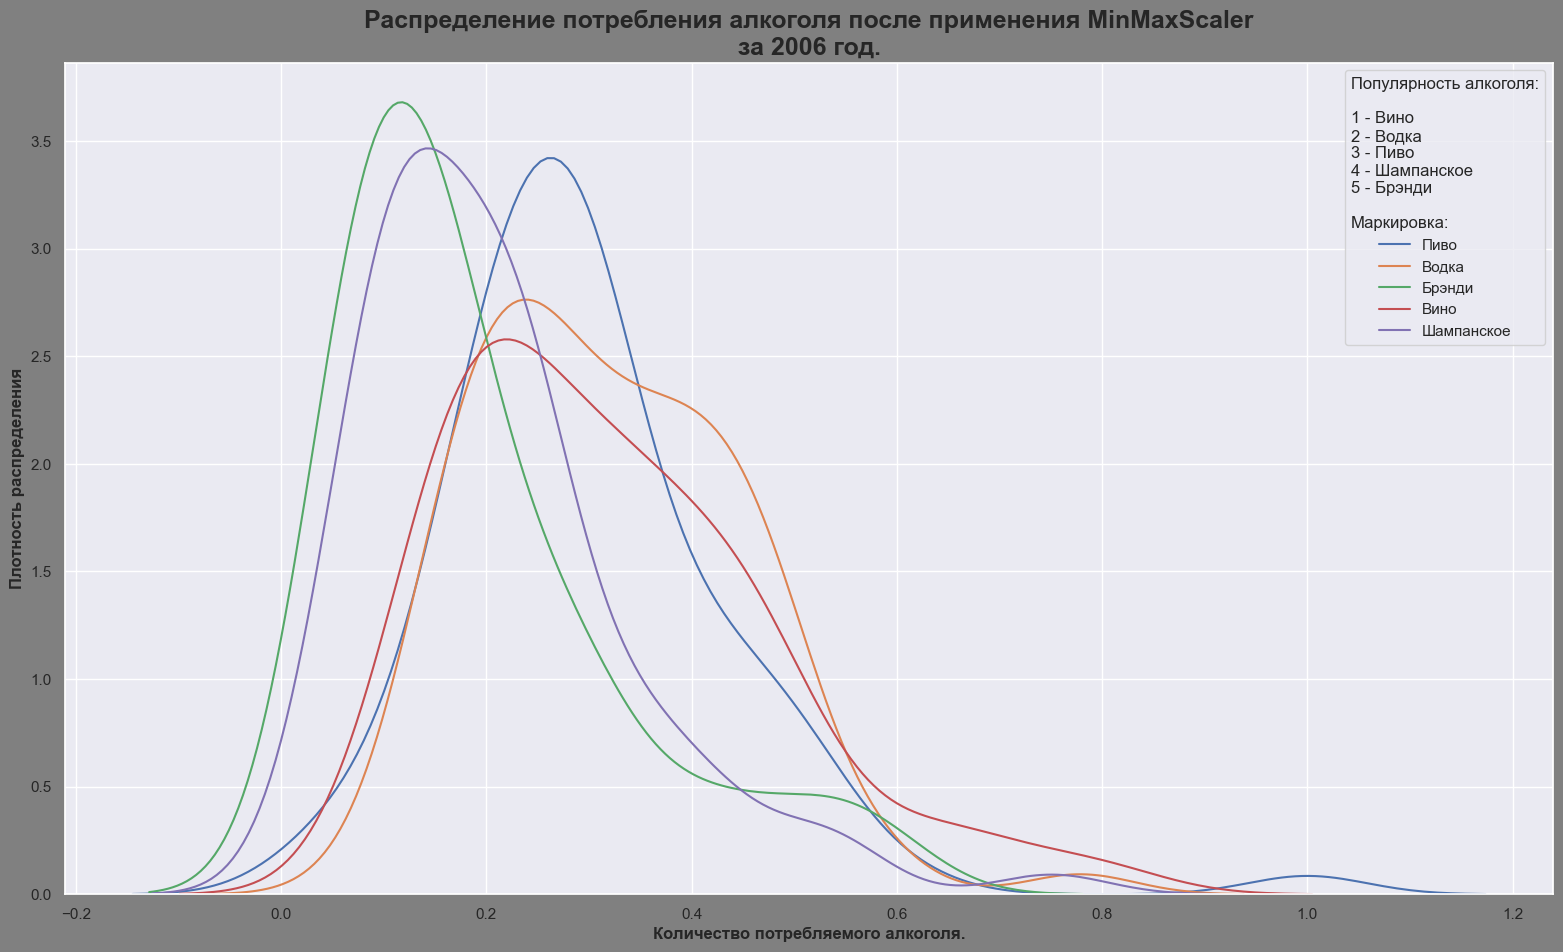

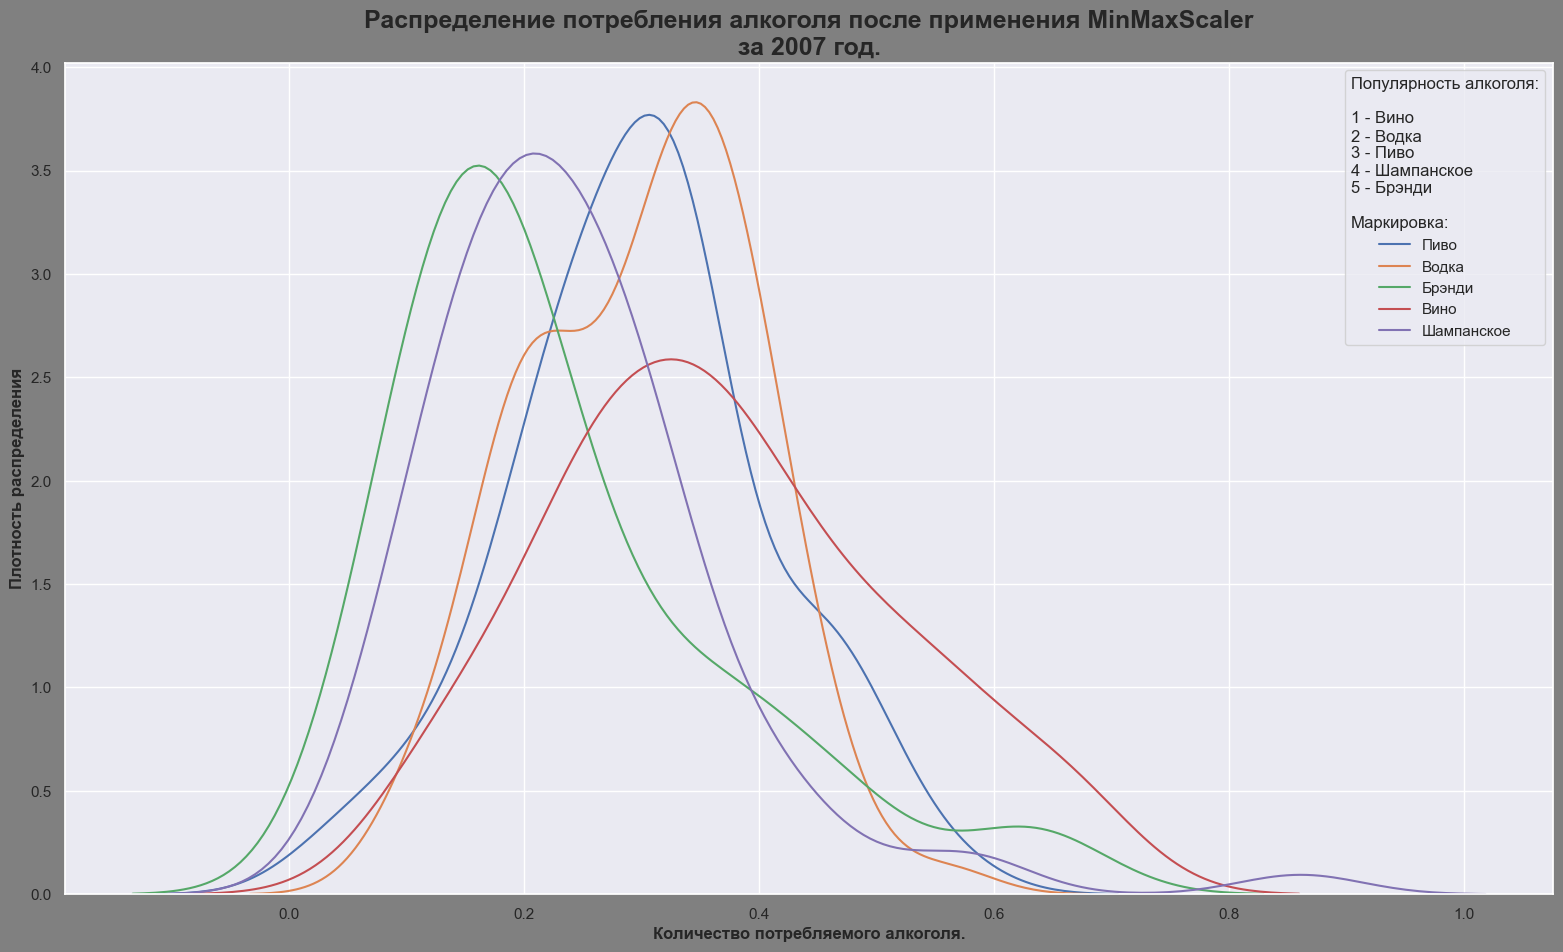

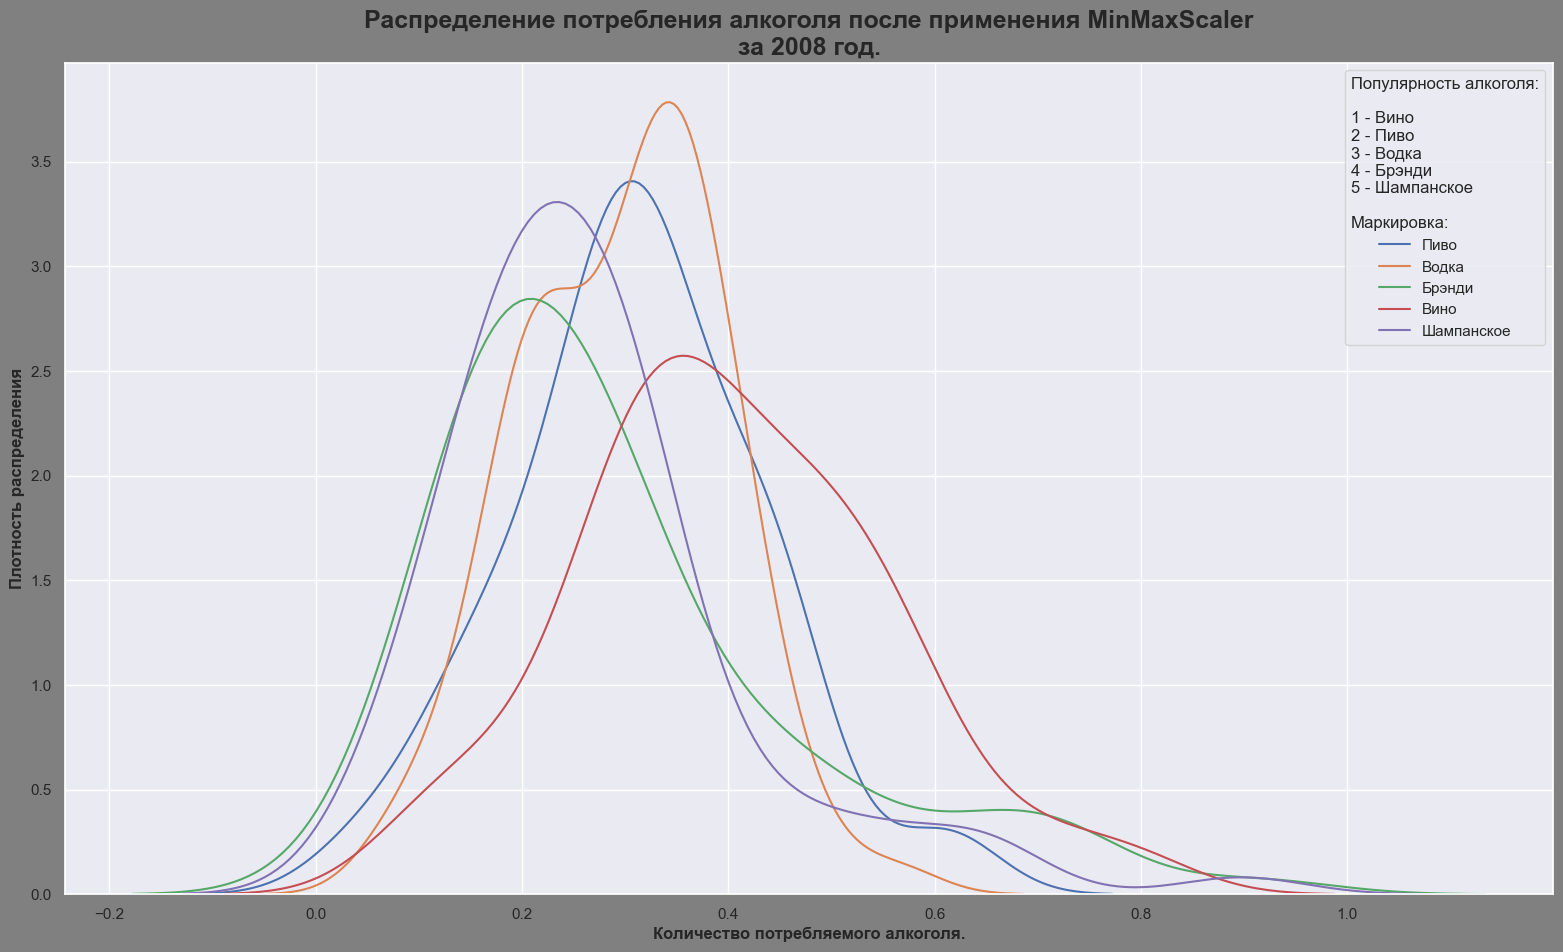

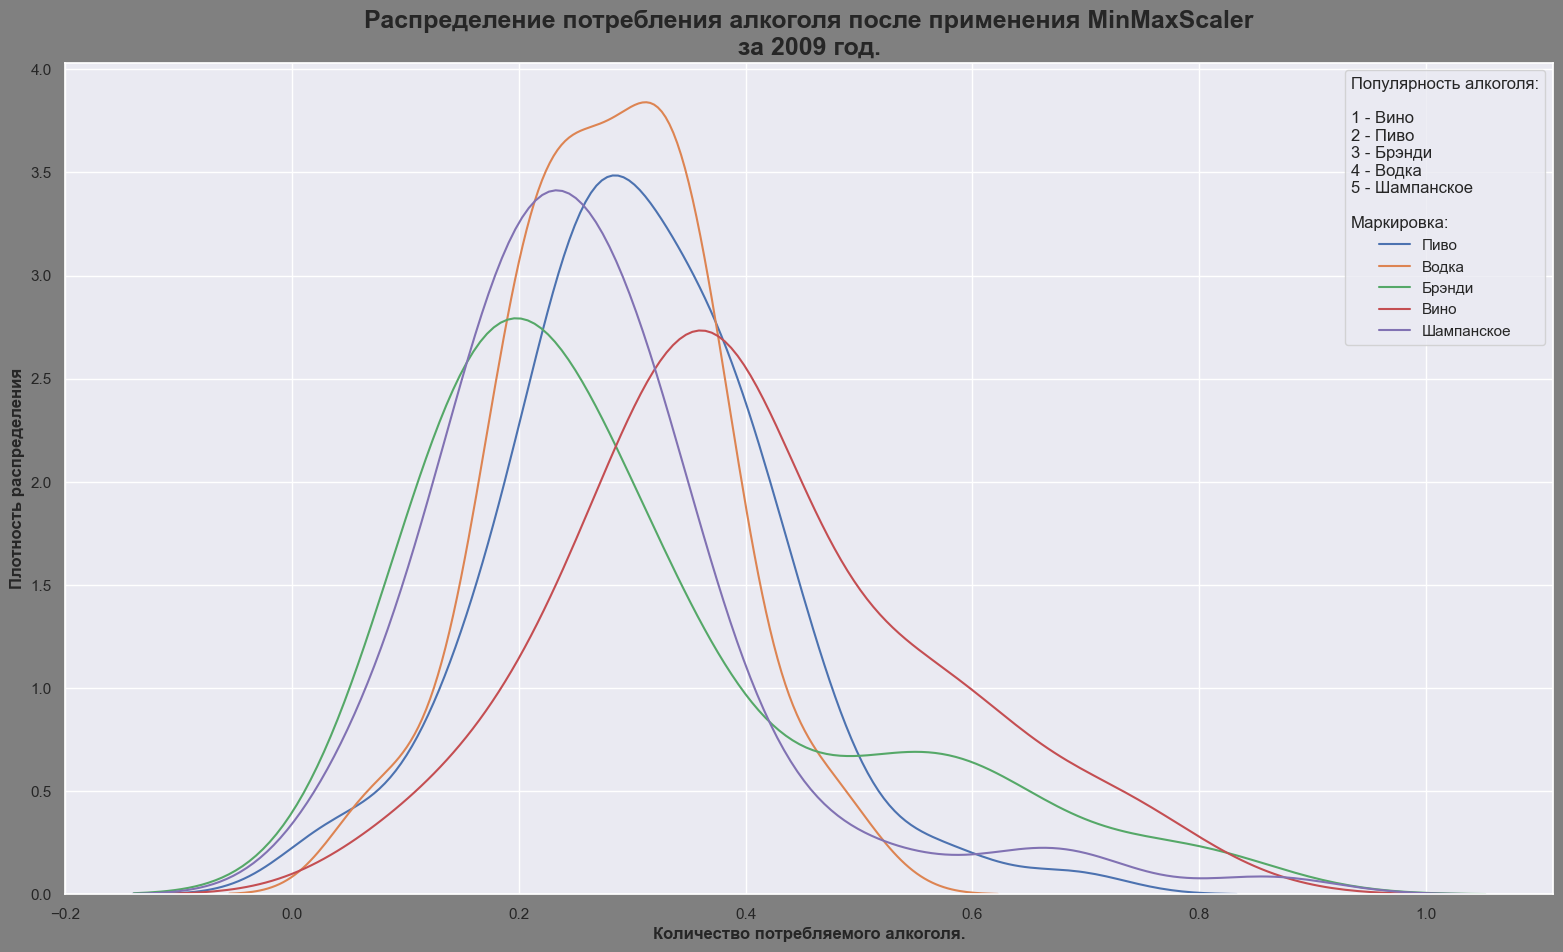

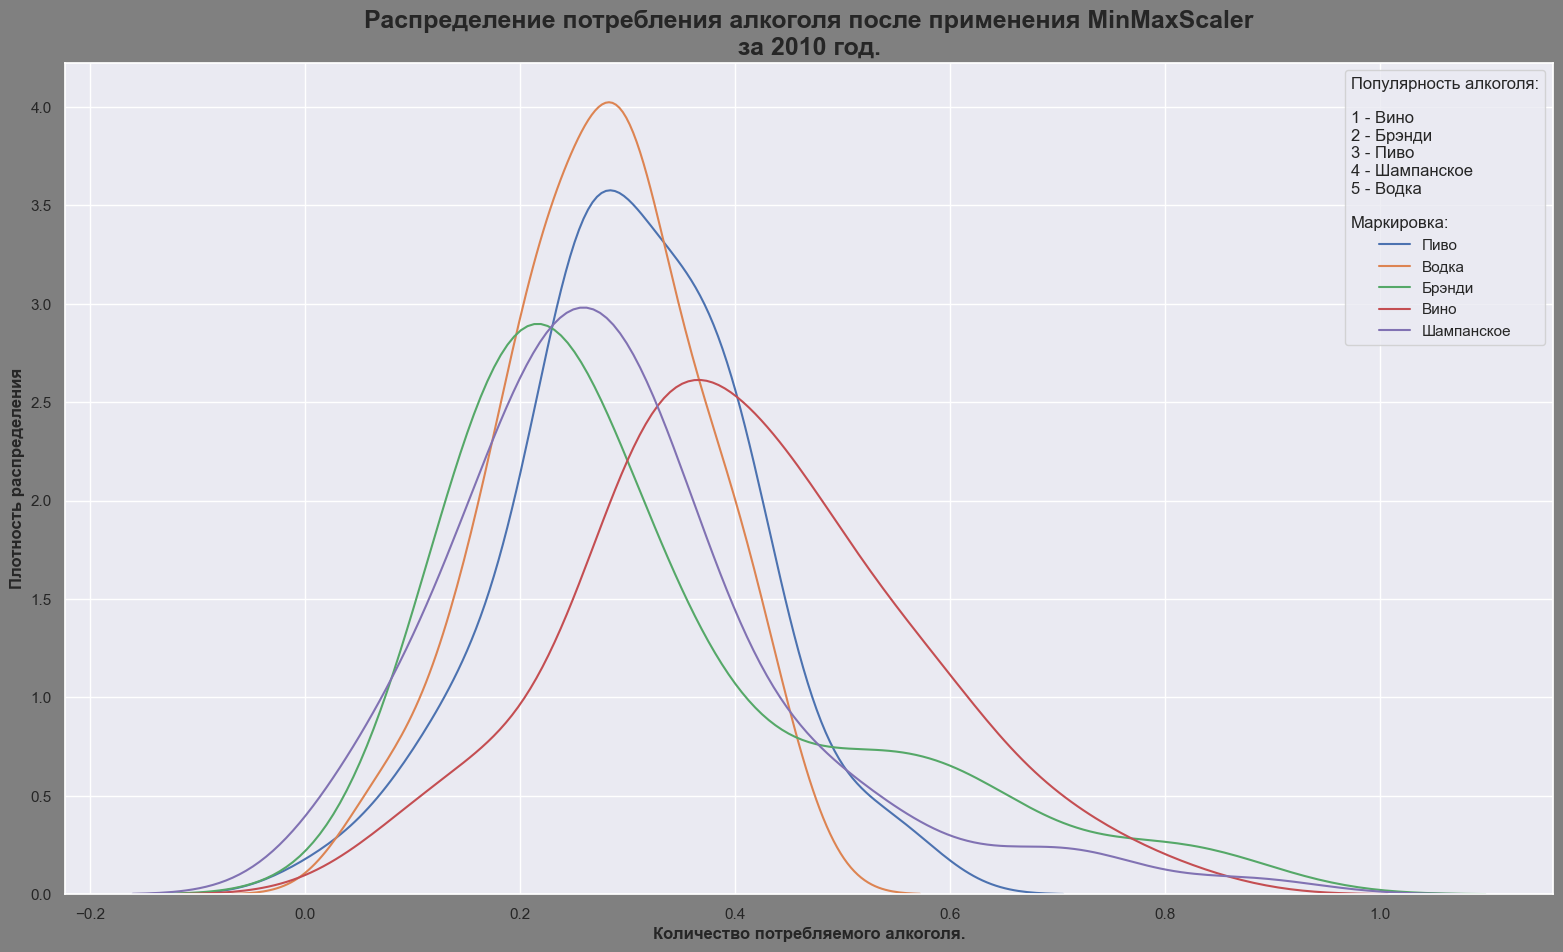

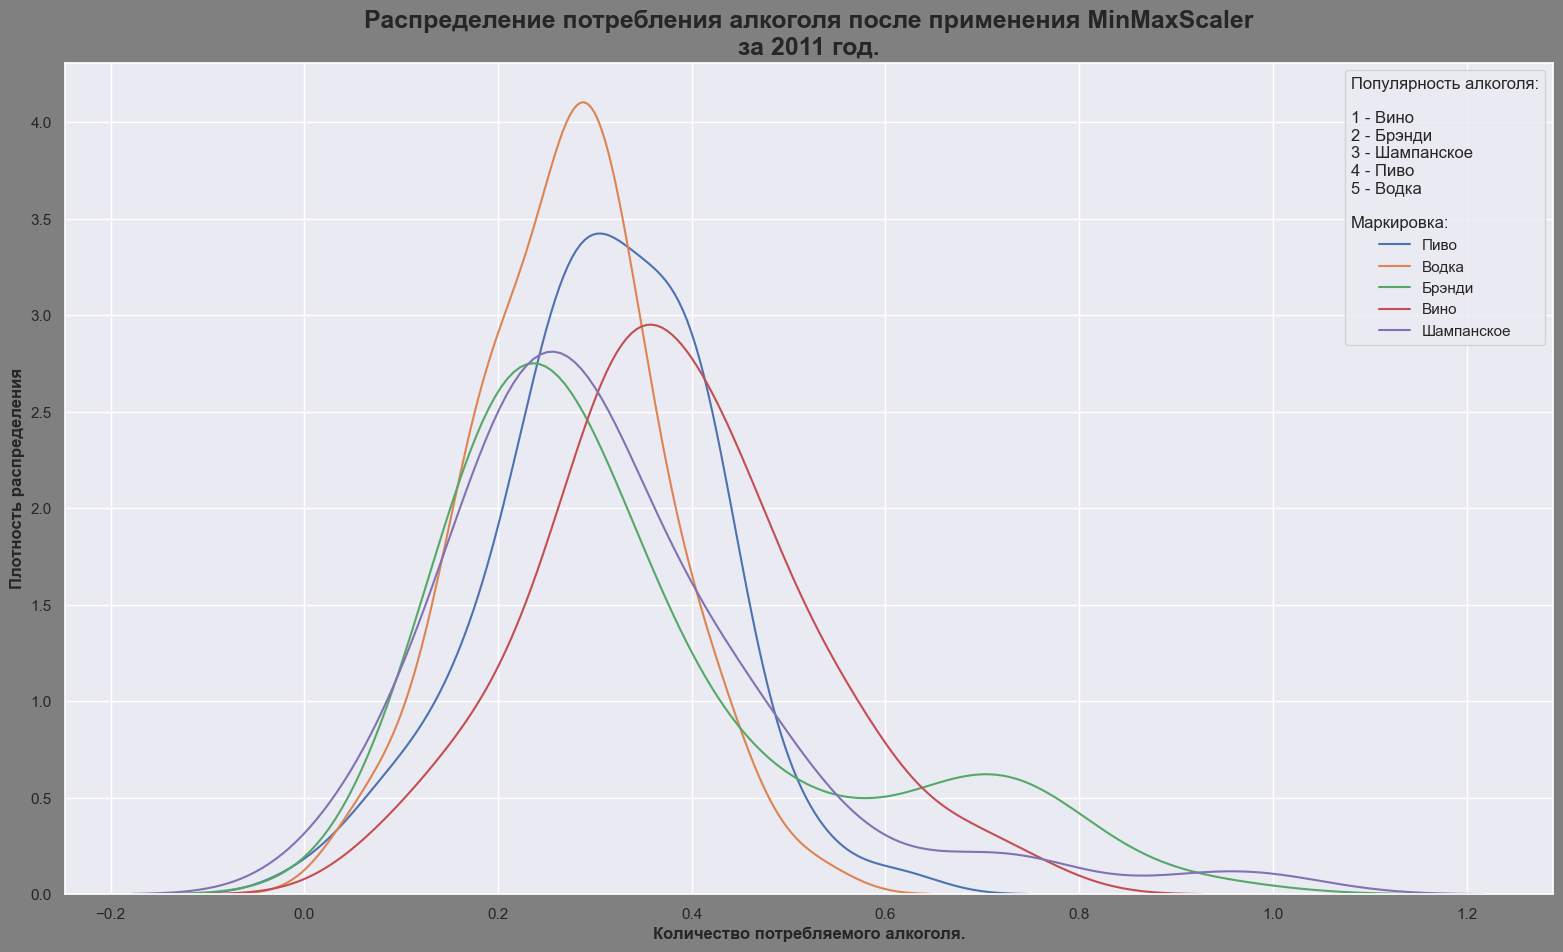

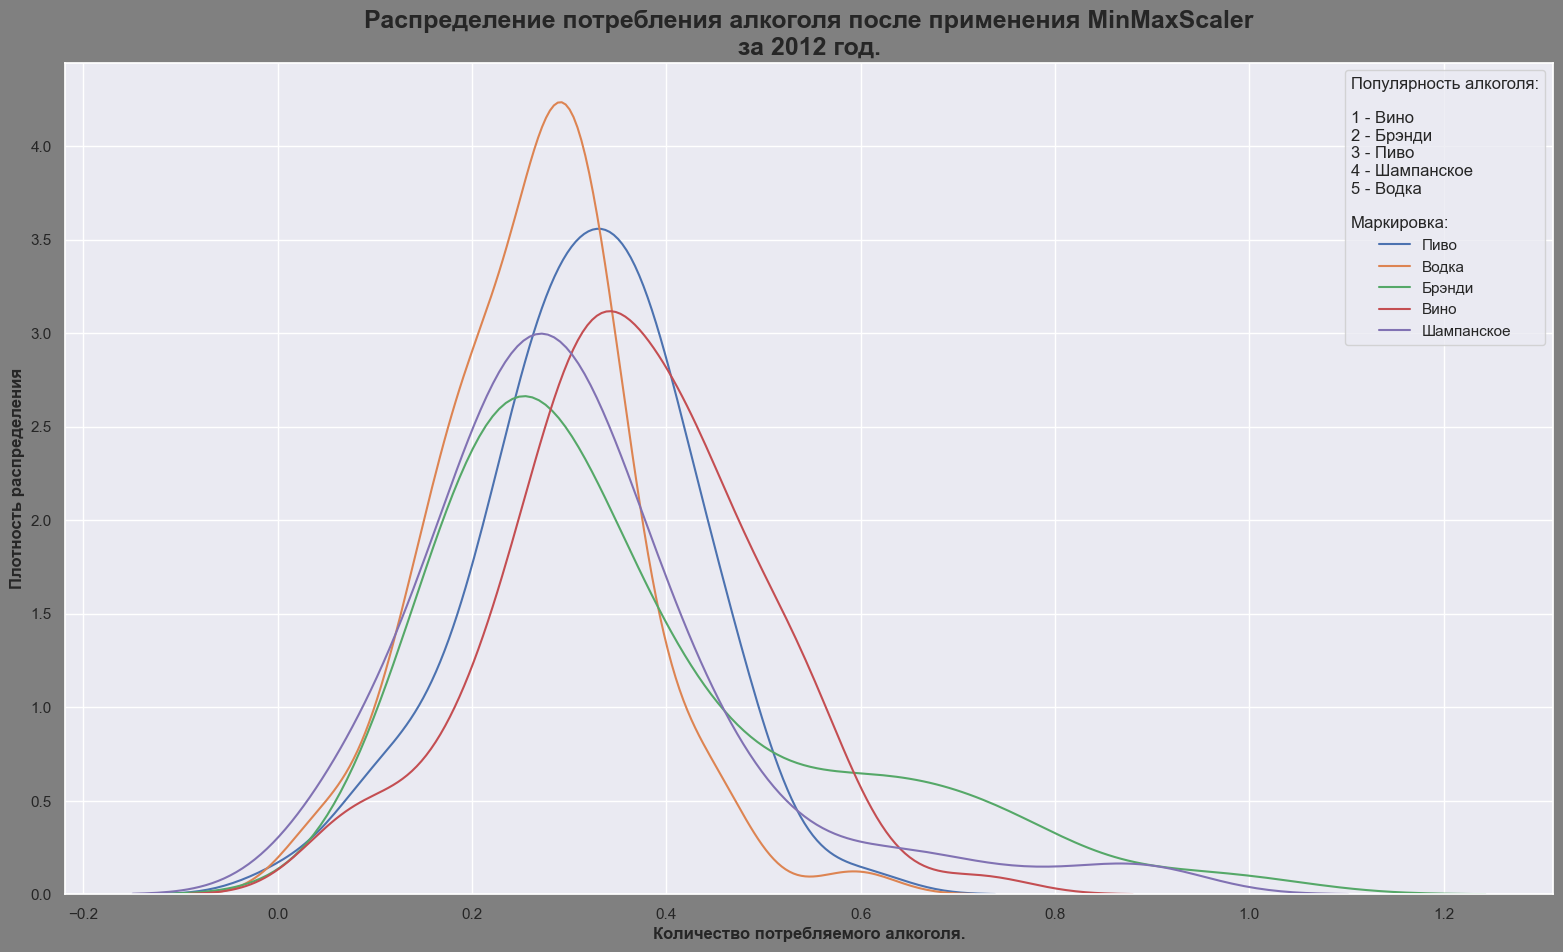

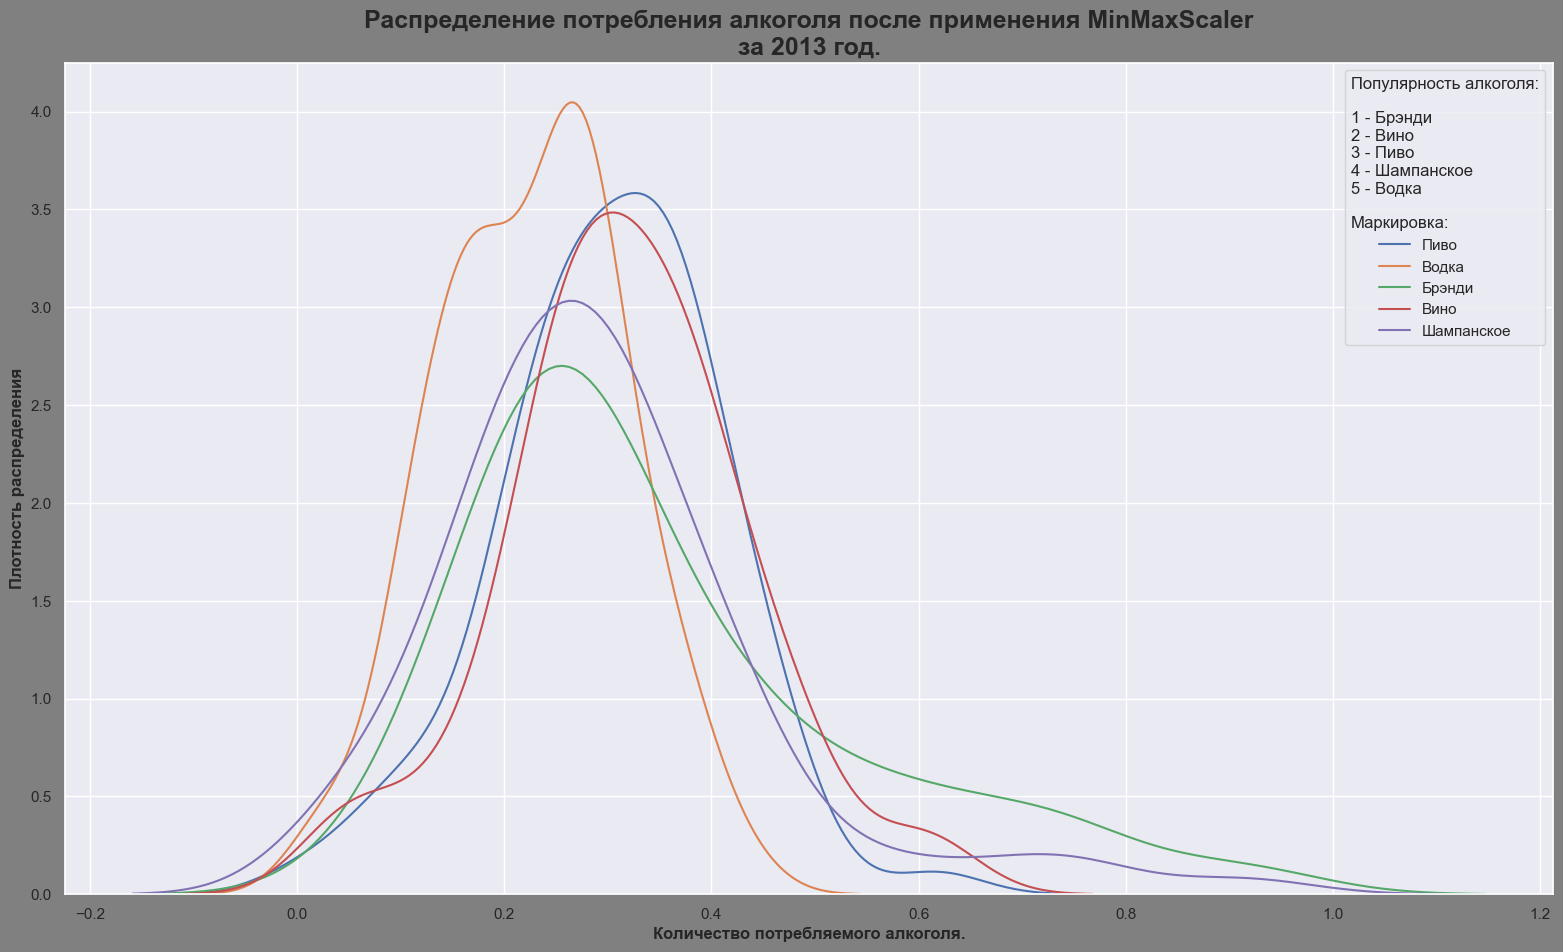

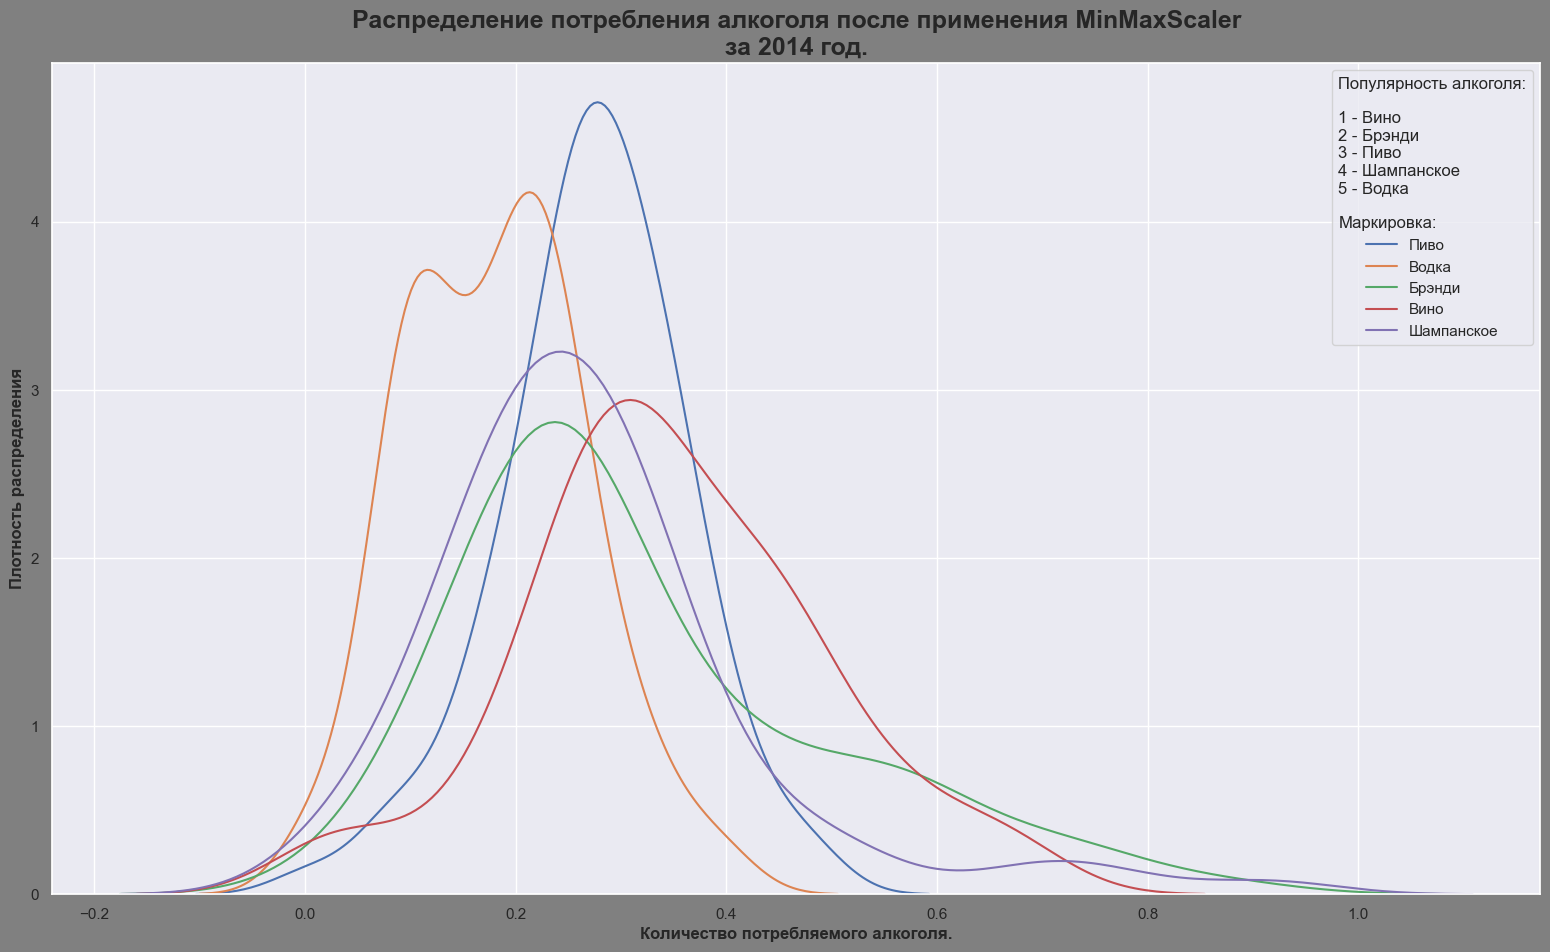

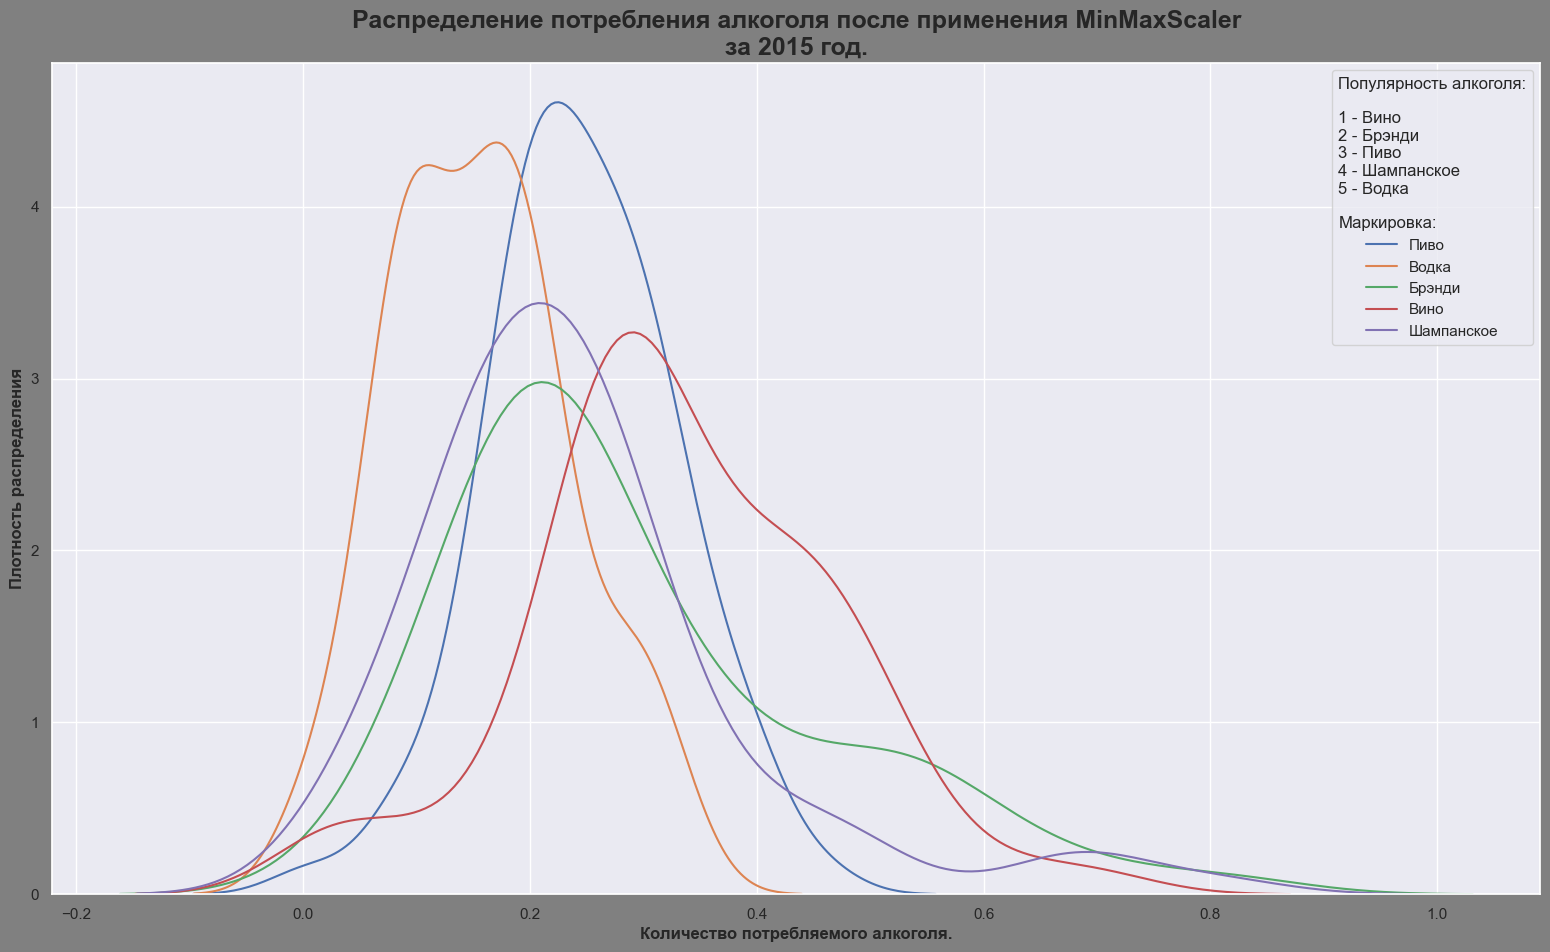

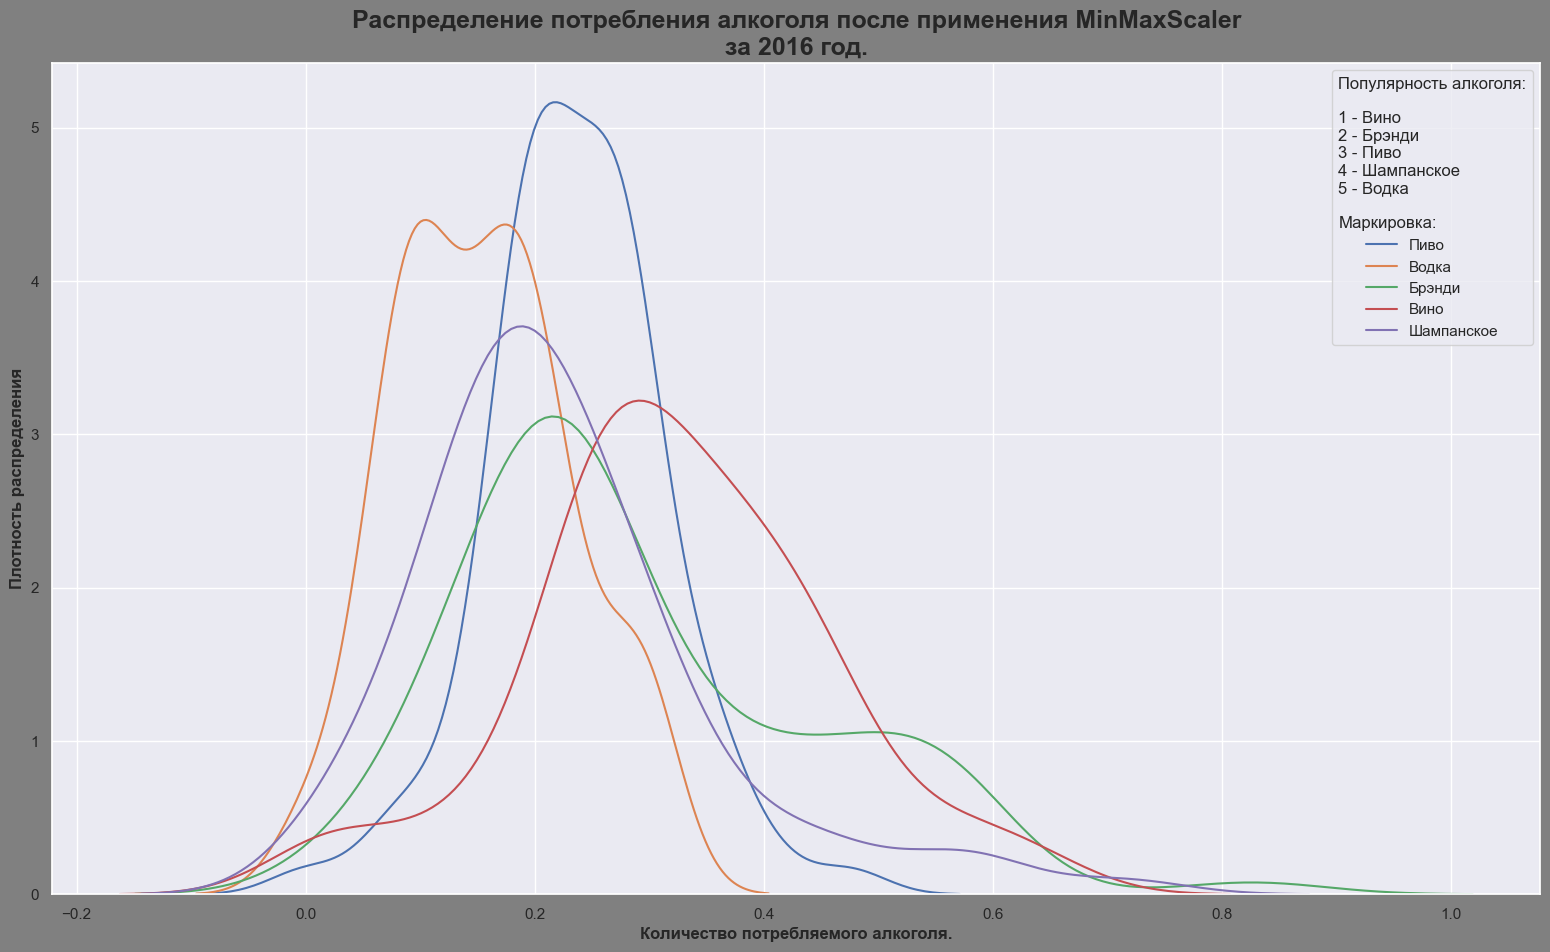

In [37]:
for y in years:
    ttl = f'Распределение потребления алкоголя после применения MinMaxScaler\nза {y} год.'
    plt.figure(figsize=[19.20, 10.8], facecolor = 'grey')

    sns.kdeplot(data = df_mms[df_mms['year'] == y], x = 'beer_mms') #, color = '#B8860B')
    sns.kdeplot(data = df_mms[df_mms['year'] == y], x = 'vodka_mms') #, color = '#FFFFFF')
    sns.kdeplot(data = df_mms[df_mms['year'] == y], x = 'brandy_mms') #, color = '#87413f')
    sns.kdeplot(data = df_mms[df_mms['year'] == y], x = 'wine_mms') #, color = '#722f37')
    sns.kdeplot(data = df_mms[df_mms['year'] == y], x = 'champagne_mms') #, color = '#f7e7ce')
    
    
    pop_alc = pd.DataFrame(columns = ['alco', 'pvalue'])
    alc = []
    pvl = []

    for a1 in alc_mms:
        for a2 in alc_mms:
            if a1 != a2:
                alc.append(a1)
                pvl.append(stats.ttest_ind(df_mms[df_mms['year'] == y][a1], df_mms[df_mms['year'] == y][a2], alternative = 'greater')[1])

    pop_alc['alco'] = alc
    pop_alc['pvalue'] = pvl

    al1 = pop_alc.groupby(['alco']).sum().sort_values(by = ['pvalue']).index[0]
    al2 = pop_alc.groupby(['alco']).sum().sort_values(by = ['pvalue']).index[1]
    al3 = pop_alc.groupby(['alco']).sum().sort_values(by = ['pvalue']).index[2]
    al4 = pop_alc.groupby(['alco']).sum().sort_values(by = ['pvalue']).index[3]
    al5 = pop_alc.groupby(['alco']).sum().sort_values(by = ['pvalue']).index[4]
    

    plt.title(ttl, fontsize = 18, fontweight = 'bold')
    plt.xlabel('Количество потребляемого алкоголя.', fontweight = 'bold')
    plt.ylabel('Плотность распределения', fontweight = 'bold')
    plt.legend (title = f'Популярность алкоголя:\n\n1 - {alc_rus[alc_mms.index(al1)]}\n2 - {alc_rus[alc_mms.index(al2)]}\n3 - {alc_rus[alc_mms.index(al3)]}\n4 - {alc_rus[alc_mms.index(al4)]}\n5 - {alc_rus[alc_mms.index(al5)]}\n\nМаркировка:',
                labels = alc_rus)
    #plt.savefig(f'savefig/{time.strftime("%Y%m%d-%H%M%S")} - {ttl}.png')
    plt.show()

---

Для большей наглядности, сделаем сводную таблицу, отражающую рейтинг алкогольных напитков.

---

In [38]:
rating_alc = pd.DataFrame(columns = ['Год', '1 место', '2 место', '3 место', '4 место', '5 место',])
yea = []
al1 =[]
al2 = []
al3 = []
al4 = []
al5 = []

for y in years:
    pop_alc = pd.DataFrame(columns = ['alco', 'pvalue'])
    alc = []
    pvl = []

    for a1 in alc_mms:
        for a2 in alc_mms:
            if a1 != a2:
                alc.append(a1)
                pvl.append(stats.ttest_ind(df_mms[df_mms['year'] == y][a1], df_mms[df_mms['year'] == y][a2], alternative = 'greater')[1])

    pop_alc['alco'] = alc
    pop_alc['pvalue'] = pvl

    yea.append(y)
    al1.append(alc_rus[alc_mms.index(pop_alc.groupby(['alco']).sum().sort_values(by = ['pvalue']).index[0])])
    al2.append(alc_rus[alc_mms.index(pop_alc.groupby(['alco']).sum().sort_values(by = ['pvalue']).index[1])])
    al3.append(alc_rus[alc_mms.index(pop_alc.groupby(['alco']).sum().sort_values(by = ['pvalue']).index[2])])
    al4.append(alc_rus[alc_mms.index(pop_alc.groupby(['alco']).sum().sort_values(by = ['pvalue']).index[3])])
    al5.append(alc_rus[alc_mms.index(pop_alc.groupby(['alco']).sum().sort_values(by = ['pvalue']).index[4])])

'''
Статистику за все года возьмем из расчетов выше.

Первое место — Вино;
Второе место — Водка;
Третье место — Пиво;
Четвертое место — Брэнди;
И последнее пятое место — Шампанское.
'''

yea.append('За все года')
al1.append('Вино')
al2.append('Водка')
al3.append('Пиво')
al4.append('Брэнди')
al5.append('Шампанское')

rating_alc['Год'] = yea
rating_alc['1 место'] = al1
rating_alc['2 место'] = al2
rating_alc['3 место'] = al3
rating_alc['4 место'] = al4
rating_alc['5 место'] = al5

rating_alc

Год 1 место 2 место     3 место     4 место     5 место
0          1998   Водка    Вино  Шампанское      Брэнди        Пиво
1          1999   Водка    Вино  Шампанское        Пиво      Брэнди
2          2000   Водка    Вино  Шампанское        Пиво      Брэнди
3          2001   Водка    Вино        Пиво  Шампанское      Брэнди
4          2002   Водка    Вино        Пиво  Шампанское      Брэнди
5          2003   Водка    Вино        Пиво  Шампанское      Брэнди
6          2004   Водка    Вино        Пиво  Шампанское      Брэнди
7          2005   Водка    Вино        Пиво  Шампанское      Брэнди
8          2006    Вино   Водка        Пиво  Шампанское      Брэнди
9          2007    Вино   Водка        Пиво  Шампанское      Брэнди
10         2008    Вино    Пиво       Водка      Брэнди  Шампанское
11         2009    Вино    Пиво      Брэнди       Водка  Шампанское
12         2010    Вино  Брэнди        Пиво  Шампанское       Водка
13         2011    Вино  Брэнди  Шампанское        Пиво       Водка
14         2012    Вино  Брэнди        Пиво  Шампанское       Водка
15         2013  Брэнди    Вино        Пиво  Шампанское       Водка
16         2014    Вино  Брэнди        Пиво  Шампанское       Водка
17         2015    Вино  Брэнди        Пиво  Шампанское       Водка
18         2016    Вино  Брэнди        Пиво  Шампанское       Водка
19  За все года    Вино   Водка        Пиво      Брэнди  Шампанское

---

Как видно из графиков и сводной таблицы, предпочтения россиян значительно изменились:

До 2005 года первое место занимала водка, но с 2010 года она стала самым непопулярным напитком.

Вино, которое до 2006 году было на втором месте по популярности, теперь уверенно занимает первое место и не собирается сдавать свои позиции.

До 2007 года напиток под названием «Брэнди» был не очень популярен. Однако с 2010 года он уверенно занял второе место в рейтинге. А в 2013 году «Брэнди» даже стал самым популярным из спиртных напитков.

Пиво и шампанское занимали третье и четвёртое места, соответственно, почти во все рассматриваемые годы.

---

---

Теперь давайте рассмотрим, в каких регионах потребляют меньше всего алкоголя, а в каких — больше. Для этого мы воспользуемся двумя методами.

Первый метод основан на следующем принципе: мы возьмём топ-100 регионов с наименьшим и наибольшим потреблением алкоголя по каждому виду напитка. Затем мы посмотрим, какие регионы чаще всего будут встречаться в этих списках.

---

In [39]:
df_min = pd.concat([df1.sort_values(by = ['wine']).iloc[:100][['year', 'region']],
                    df1.sort_values(by = ['beer']).iloc[:100][['year', 'region']],
                    df1.sort_values(by = ['vodka']).iloc[:100][['year', 'region']],
                    df1.sort_values(by = ['champagne']).iloc[:100][['year', 'region']],
                    df1.sort_values(by = ['brandy']).iloc[:100][['year', 'region']]])

display(df_min['year'].value_counts().iloc[:10])
print('--------------------------------------')
display(df_min['region'].value_counts().iloc[:10])

year
2000    70
1998    67
2001    60
1999    59
2016    38
2015    36
2014    26
2002    24
2005    20
2004    17
Name: count, dtype: int64

--------------------------------------


region
Republic of Dagestan                40
Karachay-Cherkess Republic          40
Republic of North Ossetia-Alania    39
Kabardino-Balkar Republic           23
Republic of Kalmykia                22
Chukotka Autonomous Okrug           18
Tuva Republic                       17
Republic of Mordovia                15
Republic of Buryatia                13
Republic of Bashkortostan           13
Name: count, dtype: int64

In [40]:
df_max = pd.concat([df1.sort_values(by = ['wine']).iloc[-100:][['year', 'region']],
                    df1.sort_values(by = ['beer']).iloc[-100:][['year', 'region']],
                    df1.sort_values(by = ['vodka']).iloc[-100:][['year', 'region']],
                    df1.sort_values(by = ['champagne']).iloc[-100:][['year', 'region']],
                    df1.sort_values(by = ['brandy']).iloc[-100:][['year', 'region']]])

display(df_max['year'].value_counts().iloc[:10])
print('--------------------------------------')
display(df_max['region'].value_counts().iloc[:10])

year
2010    43
2008    43
2009    41
2011    40
2012    38
2013    30
2006    30
2004    30
2005    30
2007    29
Name: count, dtype: int64

--------------------------------------


region
Moscow                            42
Kamchatka Krai                    30
Saint Petersburg                  28
Murmansk Oblast                   25
Magadan Oblast                    23
Moscow Oblast                     23
Sakhalin Oblast                   21
Nenets Autonomous Okrug           20
Yamalo-Nenets Autonomous Okrug    19
Komi Republic                     17
Name: count, dtype: int64

---

Второй метод основан на следующем принципе: для каждого вида алкоголя за каждый год выбирается топ-10 регионов, и каждому из них присваивается рейтинг. За первое место регион получает 10 баллов, за второе — 9 баллов, а за последнее, десятое место — 1 балл.

Затем для каждого региона суммируются все полученные баллы, и регион с наибольшим общим количеством баллов возглавляет чарт пьющих или трезвенников.

---

In [41]:
df_rating_min = pd.DataFrame(columns = ['year', 'alco', 'region', 'rating'])
ye = []
al = []
re = []
ra = []

for y in range(1998, 2017, 1):
    for a in ['wine', 'beer', 'vodka', 'champagne', 'brandy']:
        for (m, r) in zip(range(0, 10, 1), range(10, 0, -1)):
            ye.append(y)
            al.append(a)
            re.append(df1[df1['year'] == y].sort_values(by = [a]).iloc[m, 1])
            ra.append(r)

df_rating_min['year'] = ye
df_rating_min['alco'] = al
df_rating_min['region'] = re
df_rating_min['rating'] = ra
df_rating_min

year    alco                     region  rating
0    1998    wine  Chukotka Autonomous Okrug      10
1    1998    wine             Primorsky Krai       9
2    1998    wine           Zabaykalsky Krai       8
3    1998    wine           Ulyanovsk Oblast       7
4    1998    wine       Republic of Buryatia       6
..    ...     ...                        ...     ...
945  2016  brandy       Republic of Dagestan       5
946  2016  brandy               Penza Oblast       4
947  2016  brandy             Altai Republic       3
948  2016  brandy            Orenburg Oblast       2
949  2016  brandy            Belgorod Oblast       1

[950 rows x 4 columns]

In [42]:
df_rating_min[['region', 'rating']].groupby(['region']).sum().sort_values(by = ['rating'], ascending = False).head(10)

rating
region                                  
Republic of North Ossetia-Alania     562
Karachay-Cherkess Republic           545
Republic of Dagestan                 445
Kabardino-Balkar Republic            360
Tuva Republic                        307
Republic of Kalmykia                 299
Chukotka Autonomous Okrug            205
Republic of Bashkortostan            187
Republic of Mordovia                 173
Republic of Adygea                   170

In [43]:
df_min['region'].value_counts().iloc[:10]

region
Republic of Dagestan                40
Karachay-Cherkess Republic          40
Republic of North Ossetia-Alania    39
Kabardino-Balkar Republic           23
Republic of Kalmykia                22
Chukotka Autonomous Okrug           18
Tuva Republic                       17
Republic of Mordovia                15
Republic of Buryatia                13
Republic of Bashkortostan           13
Name: count, dtype: int64

In [44]:
for a in ['wine', 'beer', 'vodka', 'champagne', 'brandy']:
    print(a)
    display(df_rating_min[df_rating_min['alco'] == a][['region', 'rating']].groupby(['region']).sum().sort_values(by = ['rating'], ascending = False).head(10))

wine


rating
region                                  
Republic of North Ossetia-Alania     126
Republic of Bashkortostan             94
Tuva Republic                         88
Karachay-Cherkess Republic            88
Republic of Dagestan                  86
Kabardino-Balkar Republic             74
Altai Krai                            56
Republic of Kalmykia                  44
Primorsky Krai                        41
Chukotka Autonomous Okrug             40

beer


rating
region                                  
Republic of Dagestan                 187
Chukotka Autonomous Okrug            147
Republic of Kalmykia                 124
Republic of North Ossetia-Alania     122
Karachay-Cherkess Republic           121
Kabardino-Balkar Republic             71
Republic of Adygea                    49
Mari El Republic                      44
Altai Republic                        36
Republic of Buryatia                  22

vodka


rating
region                                  
Republic of North Ossetia-Alania     129
Karachay-Cherkess Republic           112
Kabardino-Balkar Republic             97
Rostov Oblast                         92
Republic of Dagestan                  73
Stavropol Krai                        72
Penza Oblast                          65
Republic of Adygea                    62
Kursk Oblast                          58
Republic of Kalmykia                  40

champagne


rating
region                                  
Karachay-Cherkess Republic           165
Tuva Republic                        113
Republic of Kalmykia                  90
Republic of Dagestan                  77
Kabardino-Balkar Republic             72
Republic of North Ossetia-Alania      68
Republic of Mordovia                  66
Republic of Bashkortostan             54
Republic of Buryatia                  49
Ivanovo Oblast                        32

brandy


rating
region                                  
Republic of North Ossetia-Alania     117
Republic of Buryatia                  85
Tuva Republic                         77
Republic of Mordovia                  77
Karachay-Cherkess Republic            59
Penza Oblast                          51
Kabardino-Balkar Republic             46
Mari El Republic                      45
Orenburg Oblast                       42
Altai Republic                        39

In [45]:
df_rating_max = pd.DataFrame(columns = ['year', 'alco', 'region', 'rating'])
ye = []
al = []
re = []
ra = []

for y in range(1998, 2017, 1):
    for a in ['wine', 'beer', 'vodka', 'champagne', 'brandy']:
        for (m, r) in zip(range(0, 10, 1), range(10, 0, -1)):
            ye.append(y)
            al.append(a)
            re.append(df1[df1['year'] == y].sort_values(by = [a], ascending = False).iloc[m, 1])
            ra.append(r)

df_rating_max['year'] = ye
df_rating_max['alco'] = al
df_rating_max['region'] = re
df_rating_max['rating'] = ra
df_rating_max

year    alco               region  rating
0    1998    wine       Stavropol Krai      10
1    1998    wine       Krasnodar Krai       9
2    1998    wine               Moscow       8
3    1998    wine       Kamchatka Krai       7
4    1998    wine       Magadan Oblast       6
..    ...     ...                  ...     ...
945  2016  brandy       Magadan Oblast       5
946  2016  brandy      Sakhalin Oblast       4
947  2016  brandy        Moscow Oblast       3
948  2016  brandy  Republic of Karelia       2
949  2016  brandy     Saint Petersburg       1

[950 rows x 4 columns]

In [46]:
df_rating_max[['region', 'rating']].groupby(['region']).sum().sort_values(by = ['rating'], ascending = False).head(10)

rating
region                                
Moscow                             546
Kamchatka Krai                     376
Saint Petersburg                   293
Magadan Oblast                     286
Komi Republic                      255
Nenets Autonomous Okrug            222
Murmansk Oblast                    219
Sakhalin Oblast                    211
Republic of Karelia                186
Yamalo-Nenets Autonomous Okrug     148

In [47]:
df_max['region'].value_counts().iloc[:10]

region
Moscow                            42
Kamchatka Krai                    30
Saint Petersburg                  28
Murmansk Oblast                   25
Magadan Oblast                    23
Moscow Oblast                     23
Sakhalin Oblast                   21
Nenets Autonomous Okrug           20
Yamalo-Nenets Autonomous Okrug    19
Komi Republic                     17
Name: count, dtype: int64

In [48]:
for a in ['wine', 'beer', 'vodka', 'champagne', 'brandy']:
    print(a)
    display(df_rating_max[df_rating_min['alco'] == a][['region', 'rating']].groupby(['region']).sum().sort_values(by = ['rating'], ascending = False).head(10))

wine


rating
region                         
Republic of Karelia         127
Pskov Oblast                112
Novgorod Oblast              94
Nenets Autonomous Okrug      73
Komi Republic                73
Vologda Oblast               62
Arkhangelsk Oblast           51
Krasnodar Krai               37
Kaliningrad Oblast           36
Kirov Oblast                 34

beer


rating
region                                
Saint Petersburg                   110
Moscow                              94
Omsk Oblast                         91
Yamalo-Nenets Autonomous Okrug      79
Moscow Oblast                       67
Khabarovsk Krai                     52
Chelyabinsk Oblast                  49
Smolensk Oblast                     44
Republic of Khakassia               43
Tyumen Oblast                       41

vodka


rating
region                         
Komi Republic               128
Kamchatka Krai              110
Magadan Oblast              109
Moscow                      104
Sakhalin Oblast              90
Nenets Autonomous Okrug      68
Republic of Karelia          54
Arkhangelsk Oblast           48
Vologda Oblast               36
Murmansk Oblast              35

champagne


rating
region                           
Moscow                        188
Magadan Oblast                116
Kamchatka Krai                102
Saint Petersburg               92
Murmansk Oblast                85
Sakhalin Oblast                71
Khabarovsk Krai                49
Chukotka Autonomous Okrug      48
Leningrad Oblast               48
Volgograd Oblast               36

brandy


rating
region                                
Moscow                             130
Kamchatka Krai                     118
Kaliningrad Oblast                 108
Saint Petersburg                    86
Murmansk Oblast                     74
Yamalo-Nenets Autonomous Okrug      57
Magadan Oblast                      49
Leningrad Oblast                    48
Chukotka Autonomous Okrug           44
Moscow Oblast                       44

---

Третий метод работает следующим образом: проводится группировка по одному из факторов, например, по региону или по году. Затем вычисляется средний показатель употребления алкоголя. Этот показатель может относиться как к конкретному виду алкоголя, так и к общей оценке по всем видам.

Соберём все данные в одну таблицу и сразу добавим третий вариант.

---

In [49]:
total_min = pd.DataFrame()
total_min['Метод 1 Регионы'] = df_min['region'].value_counts().iloc[:10].index
total_min['Метод 1 Оценки'] = df_min['region'].value_counts().iloc[:10].values
total_min['Метод 2 Регионы'] = df_rating_min[['region', 'rating']].groupby(['region']).sum().sort_values(by = ['rating'], ascending = False).head(10).index
total_min['Метод 2 Оценки'] = df_rating_min[['region', 'rating']].groupby(['region']).sum().sort_values(by = ['rating'], ascending = False).head(10).values
total_min['Метод 3 Регионы'] = df_mms[['region', 'all_mean_mms']].groupby(['region']).mean().sort_values(by = ['all_mean_mms']).head(10).index
total_min['Метод 3 Оценки'] = df_mms[['region', 'all_mean_mms']].groupby(['region']).mean().sort_values(by = ['all_mean_mms']).head(10).values
total_min

Метод 1 Регионы  Метод 1 Оценки  \
0              Republic of Dagestan              40   
1        Karachay-Cherkess Republic              40   
2  Republic of North Ossetia-Alania              39   
3         Kabardino-Balkar Republic              23   
4              Republic of Kalmykia              22   
5         Chukotka Autonomous Okrug              18   
6                     Tuva Republic              17   
7              Republic of Mordovia              15   
8              Republic of Buryatia              13   
9         Republic of Bashkortostan              13   

                    Метод 2 Регионы  Метод 2 Оценки  \
0  Republic of North Ossetia-Alania             562   
1        Karachay-Cherkess Republic             545   
2              Republic of Dagestan             445   
3         Kabardino-Balkar Republic             360   
4                     Tuva Republic             307   
5              Republic of Kalmykia             299   
6         Chukotka Autonomous Okrug             205   
7         Republic of Bashkortostan             187   
8              Republic of Mordovia             173   
9                Republic of Adygea             170   

                    Метод 3 Регионы  Метод 3 Оценки  
0  Republic of North Ossetia-Alania        0.093189  
1        Karachay-Cherkess Republic        0.103753  
2              Republic of Dagestan        0.106599  
3         Kabardino-Balkar Republic        0.129996  
4              Republic of Kalmykia        0.145483  
5                     Tuva Republic        0.162321  
6         Republic of Bashkortostan        0.168212  
7                   Orenburg Oblast        0.170546  
8              Republic of Mordovia        0.171463  
9                   Belgorod Oblast        0.171891

In [50]:
total_max = pd.DataFrame()
total_max['Метод 1 Регионы'] = df_max['region'].value_counts().iloc[:10].index
total_max['Метод 1 Оценки'] = df_max['region'].value_counts().iloc[:10].values
total_max['Метод 2 Регионы'] = df_rating_max[['region', 'rating']].groupby(['region']).sum().sort_values(by = ['rating'], ascending = False).head(10).index
total_max['Метод 2 Оценки'] = df_rating_max[['region', 'rating']].groupby(['region']).sum().sort_values(by = ['rating'], ascending = False).head(10).values
total_max['Метод 3 Регионы'] = df_mms[['region', 'all_mean_mms']].groupby(['region']).mean().sort_values(by = ['all_mean_mms'], ascending = False).head(10).index
total_max['Метод 3 Оценки'] = df_mms[['region', 'all_mean_mms']].groupby(['region']).mean().sort_values(by = ['all_mean_mms'], ascending = False).head(10).values
total_max

Метод 1 Регионы  Метод 1 Оценки  \
0                          Moscow              42   
1                  Kamchatka Krai              30   
2                Saint Petersburg              28   
3                 Murmansk Oblast              25   
4                  Magadan Oblast              23   
5                   Moscow Oblast              23   
6                 Sakhalin Oblast              21   
7         Nenets Autonomous Okrug              20   
8  Yamalo-Nenets Autonomous Okrug              19   
9                   Komi Republic              17   

                  Метод 2 Регионы  Метод 2 Оценки          Метод 3 Регионы  \
0                          Moscow             546                   Moscow   
1                  Kamchatka Krai             376           Kamchatka Krai   
2                Saint Petersburg             293         Saint Petersburg   
3                  Magadan Oblast             286           Magadan Oblast   
4                   Komi Republic             255            Komi Republic   
5         Nenets Autonomous Okrug             222          Murmansk Oblast   
6                 Murmansk Oblast             219         Leningrad Oblast   
7                 Sakhalin Oblast             211  Nenets Autonomous Okrug   
8             Republic of Karelia             186          Sakhalin Oblast   
9  Yamalo-Nenets Autonomous Okrug             148       Kaliningrad Oblast   

   Метод 3 Оценки  
0        0.520107  
1        0.437495  
2        0.397730  
3        0.395553  
4        0.393855  
5        0.392520  
6        0.382027  
7        0.378609  
8        0.370288  
9        0.365107

---

Как мы видим, каждый метод даёт немного разные результаты, но в целом выделяются одни и те же города с наибольшим или наименьшим потреблением алкоголя.

Теперь рассмотрим периоды, когда потребление алкоголя было наименьшим и наибольшим.

Давайте рассмотрим это на примере методов 1 и 3, так как во втором методе год потребления не учитывался.

---

In [51]:
year_max = pd.DataFrame()
year_max['Метод 1 Года'] = df_max['year'].value_counts().iloc[:10].index
year_max['Метод 1 Оценки'] = df_max['year'].value_counts().iloc[:10].values
year_max['Метод 3 Года'] = df_mms[['year', 'all_mean_mms']].groupby(['year']).mean().sort_values(by = ['all_mean_mms'], ascending = False).head(10).index
year_max['Метод 3 Оценки'] = df_mms[['year', 'all_mean_mms']].groupby(['year']).mean().sort_values(by = ['all_mean_mms'], ascending = False).head(10).values
year_max

Метод 1 Года  Метод 1 Оценки  Метод 3 Года  Метод 3 Оценки
0          2010              43          2011        0.323515
1          2008              43          2012        0.321956
2          2009              41          2010        0.318941
3          2011              40          2008        0.314961
4          2012              38          2009        0.309786
5          2013              30          2013        0.298388
6          2006              30          2007        0.288264
7          2004              30          2014        0.279148
8          2005              30          2006        0.266665
9          2007              29          2005        0.260860

In [52]:
year_min = pd.DataFrame()
year_min['Метод 1 Года'] = df_min['year'].value_counts().iloc[:10].index
year_min['Метод 1 Оценки'] = df_min['year'].value_counts().iloc[:10].values
year_min['Метод 3 Года'] = df_mms[['year', 'all_mean_mms']].groupby(['year']).mean().sort_values(by = ['all_mean_mms']).head(10).index
year_min['Метод 3 Оценки'] = df_mms[['year', 'all_mean_mms']].groupby(['year']).mean().sort_values(by = ['all_mean_mms']).head(10).values
year_min

Метод 1 Года  Метод 1 Оценки  Метод 3 Года  Метод 3 Оценки
0          2000              70          1998        0.162123
1          1998              67          1999        0.167933
2          2001              60          2000        0.179168
3          1999              59          2001        0.198841
4          2016              38          2002        0.219332
5          2015              36          2003        0.238470
6          2014              26          2016        0.246008
7          2002              24          2004        0.253583
8          2005              20          2015        0.254448
9          2004              17          2005        0.260860

---

Ситуация аналогична предыдущей сводной таблице: результаты различаются, но одни и те же годы попадают в топ-минимум или топ-максимум.

Если сравнить все методы, то можно утверждать, что метод 3 — самый эффективный. Он учитывает все данные за весь период, а не только топ-10 или топ-100 определённых значений. Кроме того, метод 3 позволяет оценить среднее потребление алкоголя по каждому виду в отдельности. При этом для оценки всех видов учитываются данные, прошедшие через MinMaxScaler.

---

---

Третий метод позволяет создавать множество вариантов для сравнения регионов или временных промежутков.

Один из вариантов представлен ниже, в виде сводных таблиц, которые показывают топ регионов по общему потреблению алкоголя и отдельно по каждому виду спиртных напитков.

---

In [53]:
metod3_max = pd.DataFrame()
metod3_max['Регионы весь алкоголь'] = df_mms[['region', 'all_mean_mms']].groupby(['region']).mean().sort_values(by = ['all_mean_mms'], ascending = False).head(10).index
metod3_max['Оценки весь алкоголь'] = df_mms[['region', 'all_mean_mms']].groupby(['region']).mean().sort_values(by = ['all_mean_mms'], ascending = False).head(10).values
for a, r in zip(alc_org, alc_rus):
    metod3_max[f'Регионы {r}'] = df_mms[['region', a]].groupby(['region']).mean().sort_values(by = [a], ascending = False).head(10).index
    metod3_max[f'Оценки {r}'] = df_mms[['region', a]].groupby(['region']).mean().sort_values(by = [a], ascending = False).head(10).values
metod3_max

Регионы весь алкоголь  Оценки весь алкоголь  \
0                   Moscow              0.520107   
1           Kamchatka Krai              0.437495   
2         Saint Petersburg              0.397730   
3           Magadan Oblast              0.395553   
4            Komi Republic              0.393855   
5          Murmansk Oblast              0.392520   
6         Leningrad Oblast              0.382027   
7  Nenets Autonomous Okrug              0.378609   
8          Sakhalin Oblast              0.370288   
9       Kaliningrad Oblast              0.365107   

                          Регионы Пиво  Оценки Пиво            Регионы Водка  \
0                     Saint Petersburg    84.375263            Komi Republic   
1                               Moscow    83.688421           Kamchatka Krai   
2       Yamalo-Nenets Autonomous Okrug    80.137895                   Moscow   
3                        Tyumen Oblast    76.950000           Magadan Oblast   
4                          Omsk Oblast    76.643684          Sakhalin Oblast   
5                   Chelyabinsk Oblast    74.147368  Nenets Autonomous Okrug   
6  KhantyMansi Autonomous Okrug  Yugra    73.845263       Arkhangelsk Oblast   
7                       Ivanovo Oblast    73.001053           Vologda Oblast   
8                    Sverdlovsk Oblast    71.958947          Murmansk Oblast   
9                      Khabarovsk Krai    70.191579         Leningrad Oblast   

   Оценки Водка                  Регионы Брэнди  Оценки Брэнди  \
0     20.654211                          Moscow       1.257895   
1     19.712105                  Kamchatka Krai       1.245263   
2     19.022105              Kaliningrad Oblast       1.238421   
3     18.733158                 Murmansk Oblast       1.127368   
4     18.179474                Saint Petersburg       1.117368   
5     17.846842                Leningrad Oblast       1.022105   
6     17.381053                   Moscow Oblast       1.000526   
7     17.217895                  Magadan Oblast       0.989474   
8     16.694737  Yamalo-Nenets Autonomous Okrug       0.951579   
9     15.809474                 Sakhalin Oblast       0.943158   

              Регионы Вино  Оценки Вино         Регионы Шампанское  \
0      Republic of Karelia    10.762105                     Moscow   
1             Pskov Oblast    10.307895             Magadan Oblast   
2           Vologda Oblast     9.328421             Kamchatka Krai   
3            Komi Republic     9.223684           Saint Petersburg   
4          Novgorod Oblast     9.184737            Sakhalin Oblast   
5  Nenets Autonomous Okrug     8.985789            Murmansk Oblast   
6       Arkhangelsk Oblast     8.670000           Leningrad Oblast   
7          Murmansk Oblast     7.853684  Chukotka Autonomous Okrug   
8         Leningrad Oblast     7.786316            Khabarovsk Krai   
9             Kirov Oblast     7.733158    Nenets Autonomous Okrug   

   Оценки Шампанское  
0           4.386316  
1           2.934737  
2           2.736842  
3           2.468947  
4           2.420526  
5           2.406316  
6           2.090526  
7           2.057895  
8           1.977895  
9           1.913684

In [54]:
metod3_min = pd.DataFrame()
metod3_min['Регионы весь алкоголь'] = df_mms[['region', 'all_mean_mms']].groupby(['region']).mean().sort_values(by = ['all_mean_mms']).head(10).index
metod3_min['Оценки весь алкоголь'] = df_mms[['region', 'all_mean_mms']].groupby(['region']).mean().sort_values(by = ['all_mean_mms']).head(10).values
for a, r in zip(alc_org, alc_rus):
    metod3_min[f'Регионы {r}'] = df_mms[['region', a]].groupby(['region']).mean().sort_values(by = [a]).head(10).index
    metod3_min[f'Оценки {r}'] = df_mms[['region', a]].groupby(['region']).mean().sort_values(by = [a]).head(10).values
metod3_min

Регионы весь алкоголь  Оценки весь алкоголь  \
0  Republic of North Ossetia-Alania              0.093189   
1        Karachay-Cherkess Republic              0.103753   
2              Republic of Dagestan              0.106599   
3         Kabardino-Balkar Republic              0.129996   
4              Republic of Kalmykia              0.145483   
5                     Tuva Republic              0.162321   
6         Republic of Bashkortostan              0.168212   
7                   Orenburg Oblast              0.170546   
8              Republic of Mordovia              0.171463   
9                   Belgorod Oblast              0.171891   

                       Регионы Пиво  Оценки Пиво  \
0              Republic of Dagestan     4.644211   
1         Chukotka Autonomous Okrug    15.416316   
2  Republic of North Ossetia-Alania    17.439474   
3              Republic of Kalmykia    19.531579   
4        Karachay-Cherkess Republic    20.880526   
5         Kabardino-Balkar Republic    24.551579   
6                Republic of Adygea    28.443158   
7                  Mari El Republic    28.615263   
8              Republic of Buryatia    32.560526   
9                    Altai Republic    36.724211   

                      Регионы Водка  Оценки Водка  \
0  Republic of North Ossetia-Alania      4.897368   
1                     Rostov Oblast      6.093158   
2                Republic of Adygea      6.289474   
3         Kabardino-Balkar Republic      6.298947   
4        Karachay-Cherkess Republic      6.435263   
5                      Penza Oblast      6.625789   
6                      Kursk Oblast      6.675263   
7              Republic of Dagestan      6.714737   
8                    Krasnodar Krai      6.835263   
9                    Stavropol Krai      7.370526   

                     Регионы Брэнди  Оценки Брэнди  \
0  Republic of North Ossetia-Alania       0.140000   
1              Republic of Buryatia       0.172105   
2              Republic of Mordovia       0.213158   
3                      Penza Oblast       0.231053   
4                     Tuva Republic       0.235263   
5                        Altai Krai       0.236842   
6                    Altai Republic       0.253684   
7                   Belgorod Oblast       0.255789   
8         Republic of Bashkortostan       0.256842   
9                   Orenburg Oblast       0.263158   

                       Регионы Вино  Оценки Вино          Регионы Шампанское  \
0  Republic of North Ossetia-Alania     1.743158  Karachay-Cherkess Republic   
1        Karachay-Cherkess Republic     2.118947               Tuva Republic   
2         Republic of Bashkortostan     2.396842   Kabardino-Balkar Republic   
3         Kabardino-Balkar Republic     2.424211        Republic of Dagestan   
4                     Tuva Republic     2.429474        Republic of Mordovia   
5              Republic of Dagestan     2.635263        Republic of Buryatia   
6             Republic of Tatarstan     3.058421   Republic of Bashkortostan   
7                        Altai Krai     3.174211             Udmurt Republic   
8                   Belgorod Oblast     3.336842        Republic of Kalmykia   
9                   Orenburg Oblast     3.378947            Mari El Republic   

   Оценки Шампанское  
0           0.319474  
1           0.445789  
2           0.571053  
3           0.641053  
4           0.642632  
5           0.661579  
6           0.665789  
7           0.725789  
8           0.743684  
9           0.744737